In [5]:
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline

In [6]:
from datetime import datetime 
import time 


# Note about Google Trends data: It seems like when I pass in several keywords, they all get ranked in regards to each other.
# Thus, when I have bitcoin as the first keyword, all the other keywords ranks are made smaller significantly 
# Solution: get google trends data seprately for each keyword I want
# Get the Trend data again for hourly! 


btc_df = pd.read_csv('../data/BTC/BTC_2012-2018_1min.csv')
btc_df["Date(UTC)"] = pd.to_datetime(btc_df["Timestamp"], utc=True,unit='s')

google_trends_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrends_v2.csv', encoding='latin1')
google_trends_df["date"] = pd.to_datetime(google_trends_df["date"])
google_trends_df['Date_UTC_trend'] = google_trends_df['date'].dt.tz_localize('EST').dt.tz_convert('UTC')
google_trends_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_df.Date_UTC_trend]

google_trends_bitcoin_historical_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrendsHistoricalDaily_Bitcoin.csv', encoding='latin1')
google_trends_bitcoin_historical_df["date"] = pd.to_datetime(google_trends_bitcoin_historical_df["date"])
google_trends_bitcoin_historical_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_bitcoin_historical_df.date]
        
display(google_trends_bitcoin_historical_df.head())
display(btc_df.head())
display(btc_df.tail())
display(google_trends_df.head())

date  Bitcoin  isPartial     Timestamp
0 2015-01-04        2      False  1.420348e+09
1 2015-01-11        3      False  1.420952e+09
2 2015-01-18        2      False  1.421557e+09
3 2015-01-25        2      False  1.422162e+09
4 2015-02-01        2      False  1.422767e+09

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price           Date(UTC)  
0            4.39 2011-12-31 07:52:00  
1            4.39 2011-12-31 07:53:00  
2            4.39 2011-12-31 07:54:00  
3            4.39 2011-12-31 07:55:00  
4            4.39 2011-12-31 07:56:00

Timestamp     Open     High      Low    Close  Volume_(BTC)  \
3273372  1522108560  8159.21  8159.39  8153.62  8153.68      0.663192   
3273373  1522108620  8159.38  8163.72  8152.81  8155.00      3.720024   
3273374  1522108680  8157.47  8158.60  8130.01  8130.01     27.294436   
3273375  1522108740  8145.17  8149.66  8130.01  8149.66     23.065281   
3273376  1522108800  8152.26  8164.68  8151.37  8153.04     17.758130   

         Volume_(Currency)  Weighted_Price           Date(UTC)  
3273372        5408.215377     8154.826880 2018-03-26 23:56:00  
3273373       30333.753144     8154.182788 2018-03-26 23:57:00  
3273374      222388.761970     8147.769162 2018-03-26 23:58:00  
3273375      187570.784940     8132.169837 2018-03-26 23:59:00  
3273376      144820.147410     8155.146220 2018-03-27 00:00:00

date  Bitcoin  Ethereum  Bitstamp  Buy Bitcoin  Coinbase  \
0 2015-01-06 00:00:00       79         1         7            2         2   
1 2015-01-06 01:00:00       63         1         6            2         2   
2 2015-01-06 02:00:00       67         1         5            2         2   
3 2015-01-06 03:00:00       57         0         5            1         1   
4 2015-01-06 04:00:00       56         1         6            2         2   

   isPartial            Date_UTC_trend     Timestamp  
0      False 2015-01-06 05:00:00+00:00  1.420538e+09  
1      False 2015-01-06 06:00:00+00:00  1.420542e+09  
2      False 2015-01-06 07:00:00+00:00  1.420546e+09  
3      False 2015-01-06 08:00:00+00:00  1.420549e+09  
4      False 2015-01-06 09:00:00+00:00  1.420553e+09

In [7]:
# Adjust Bitcoin Trend Using Historical Overall Values
def weigh_using_historical_data(row, historical_df):    
    #display('row: ', row)
    #display(historical_df)
    #in_range_df = historical_df[ (historical_df['Timestamp'] < row['Timestamp']) & (historical_df['Timestamp'] >= row['Timestamp'] + 604800 ) # 1 week = 604800 seconds 
    try:
        before_timestamp_df = historical_df[ historical_df['Timestamp'] <= row['Timestamp'] ] 
        after_timestamp_df = historical_df[ historical_df['Timestamp'] >= row['Timestamp'] ] 
        #display(before_timestamp_df)
        #display(after_timestamp_df)
        scaler = (before_timestamp_df['Bitcoin'].iloc[-1] + after_timestamp_df['Bitcoin'].iloc[0] ) / 2 
        #display('row: ' + str(row['date']) + ' ' + str(scaler) ) 
        return row['Bitcoin'] * scaler 
    except:
        return None 
      
google_trends_df["Bitcoin (Adj.)"] = google_trends_df.apply(lambda row: weigh_using_historical_data(row, google_trends_bitcoin_historical_df), axis=1)


In [39]:
# Adjust Bitcoin Trend Using Overlap Data
google_trends_overlap_df = pd.read_csv('C:/Users/Shoya/surf/data/CryptoGoogleTrends_with_overlap.csv', encoding='latin1')
google_trends_overlap_df["date"] = pd.to_datetime(google_trends_overlap_df["date"])
google_trends_overlap_df['Date_UTC_trend'] = google_trends_overlap_df['date'].dt.tz_localize('EST').dt.tz_convert('UTC')
google_trends_overlap_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_overlap_df.Date_UTC_trend]
google_trends_overlap_df = google_trends_overlap_df[google_trends_overlap_df['Bitcoin'] != 0 ]

def weigh_using_overlap(row, overlap_df, duplicate_df):
    if ( (row['Timestamp'] < duplicate_df['Timestamp'].iloc[0])): #or (row['Timestamp'] > duplicate_df['Timestamp'].iloc[-1])): 
        # edge case for first week and last week!? 
        return row['Bitcoin']
    else:
        try: 
            row_index = int(row.name) 
            if (row['Timestamp'] == overlap_df['Timestamp'].loc[row_index+24] ):
                # first occurence of the duplicate     
                duplicate_truncated_df = duplicate_df[duplicate_df['Timestamp'] <= row['Timestamp'] - 1 ] # PROB CHANGE THE -1
                if (len(duplicate_truncated_df) == 0 ): 
                    # very first duplicate, return as is 
                    return row['Bitcoin']
            else:
                duplicate_truncated_df = duplicate_df[duplicate_df['Timestamp'] <= row['Timestamp']]
            #display(overlap_truncated_df)
            ratio = float(duplicate_truncated_df.iloc[-2]['Bitcoin']) / float(duplicate_truncated_df.iloc[-1]['Bitcoin'])

            print(duplicate_truncated_df.iloc[-2]['Bitcoin'], float(duplicate_truncated_df.iloc[-1]['Bitcoin']))
            print(row_index, ratio)
            print('--------------------')
            return row['Bitcoin'] * ratio
        except Exception as e:
            display(e)
            return None
                

occurence_duplicates = google_trends_overlap_df[google_trends_overlap_df.duplicated(['Timestamp'], keep=False)]
occurence_duplicates = occurence_duplicates[occurence_duplicates['date'].dt.hour == 0 ]

google_trends_overlap_df["Bitcoin (Adj.Overlap)"] = google_trends_overlap_df.apply(lambda row: weigh_using_overlap(row, google_trends_overlap_df, occurence_duplicates), axis=1)


display(occurence_duplicates)
display(google_trends_overlap_df.head(100))
display(google_trends_overlap_df.iloc[100:200])
display(google_trends_overlap_df.iloc[200:300])
display(google_trends_overlap_df.iloc[300:400])
display(google_trends_overlap_df.iloc[400:500])

62 58.0
169 1.0689655172413792
--------------------
62 58.0
170 1.0689655172413792
--------------------
62 58.0
171 1.0689655172413792
--------------------
62 58.0
172 1.0689655172413792
--------------------
62 58.0
173 1.0689655172413792
--------------------
62 58.0
174 1.0689655172413792
--------------------
62 58.0
175 1.0689655172413792
--------------------
62 58.0
176 1.0689655172413792
--------------------
62 58.0
177 1.0689655172413792
--------------------
62 58.0
178 1.0689655172413792
--------------------
62 58.0
179 1.0689655172413792
--------------------
62 58.0
180 1.0689655172413792
--------------------
62 58.0
181 1.0689655172413792
--------------------
62 58.0
182 1.0689655172413792
--------------------
62 58.0
183 1.0689655172413792
--------------------
62 58.0
184 1.0689655172413792
--------------------
62 58.0
185 1.0689655172413792
--------------------
62 58.0
186 1.0689655172413792
--------------------
62 58.0
187 1.0689655172413792
--------------------
62 58.0
188 

357 1.0689655172413792
--------------------
62 58.0
358 1.0689655172413792
--------------------
62 58.0
359 1.0689655172413792
--------------------
62 58.0
360 1.0689655172413792
--------------------
50 47.0
361 1.0638297872340425
--------------------
50 47.0
362 1.0638297872340425
--------------------
50 47.0
363 1.0638297872340425
--------------------
50 47.0
364 1.0638297872340425
--------------------
50 47.0
365 1.0638297872340425
--------------------
50 47.0
366 1.0638297872340425
--------------------
50 47.0
367 1.0638297872340425
--------------------
50 47.0
368 1.0638297872340425
--------------------
50 47.0
369 1.0638297872340425
--------------------
50 47.0
370 1.0638297872340425
--------------------
50 47.0
371 1.0638297872340425
--------------------
50 47.0
372 1.0638297872340425
--------------------
50 47.0
373 1.0638297872340425
--------------------
50 47.0
374 1.0638297872340425
--------------------
50 47.0
375 1.0638297872340425
--------------------
50 47.0
376 1.063829

--------------------
55 80.0
559 0.6875
--------------------
55 80.0
560 0.6875
--------------------
55 80.0
561 0.6875
--------------------
55 80.0
562 0.6875
--------------------
55 80.0
563 0.6875
--------------------
55 80.0
564 0.6875
--------------------
55 80.0
565 0.6875
--------------------
55 80.0
566 0.6875
--------------------
55 80.0
567 0.6875
--------------------
55 80.0
568 0.6875
--------------------
55 80.0
569 0.6875
--------------------
55 80.0
570 0.6875
--------------------
55 80.0
571 0.6875
--------------------
55 80.0
572 0.6875
--------------------
55 80.0
573 0.6875
--------------------
55 80.0
574 0.6875
--------------------
55 80.0
575 0.6875
--------------------
55 80.0
576 0.6875
--------------------
55 80.0
577 0.6875
--------------------
55 80.0
578 0.6875
--------------------
55 80.0
579 0.6875
--------------------
55 80.0
580 0.6875
--------------------
55 80.0
581 0.6875
--------------------
55 80.0
582 0.6875
--------------------
55 80.0
583 0.6875


KeyError('the label [929] is not in the [index]')

KeyError('the label [930] is not in the [index]')

KeyError('the label [931] is not in the [index]')

KeyError('the label [932] is not in the [index]')

KeyError('the label [933] is not in the [index]')

KeyError('the label [934] is not in the [index]')

KeyError('the label [935] is not in the [index]')

KeyError('the label [936] is not in the [index]')

KeyError('the label [937] is not in the [index]')

KeyError('the label [938] is not in the [index]')

KeyError('the label [939] is not in the [index]')

KeyError('the label [940] is not in the [index]')

KeyError('the label [941] is not in the [index]')

KeyError('the label [942] is not in the [index]')

KeyError('the label [943] is not in the [index]')

68 45.0
920 1.511111111111111
--------------------
68 45.0
921 1.511111111111111
--------------------
68 45.0
922 1.511111111111111
--------------------
68 45.0
923 1.511111111111111
--------------------
68 45.0
924 1.511111111111111
--------------------
68 45.0
925 1.511111111111111
--------------------
68 45.0
926 1.511111111111111
--------------------
68 45.0
927 1.511111111111111
--------------------
68 45.0
928 1.511111111111111
--------------------
68 45.0
944 1.511111111111111
--------------------
68 45.0
945 1.511111111111111
--------------------
68 45.0
946 1.511111111111111
--------------------
68 45.0
947 1.511111111111111
--------------------
68 45.0
948 1.511111111111111
--------------------
68 45.0
949 1.511111111111111
--------------------
68 45.0
950 1.511111111111111
--------------------
68 45.0
951 1.511111111111111
--------------------
68 45.0
952 1.511111111111111
--------------------
68 45.0
953 1.511111111111111
--------------------
68 45.0
954 1.511111111111111
-

14 18.0
1188 0.7777777777777778
--------------------
14 18.0
1189 0.7777777777777778
--------------------
14 18.0
1190 0.7777777777777778
--------------------
14 18.0
1191 0.7777777777777778
--------------------
14 18.0
1192 0.7777777777777778
--------------------
14 18.0
1193 0.7777777777777778
--------------------
14 18.0
1194 0.7777777777777778
--------------------
14 18.0
1195 0.7777777777777778
--------------------
14 18.0
1196 0.7777777777777778
--------------------
14 18.0
1197 0.7777777777777778
--------------------
14 18.0
1198 0.7777777777777778
--------------------
14 18.0
1199 0.7777777777777778
--------------------
14 18.0
1200 0.7777777777777778
--------------------
14 18.0
1201 0.7777777777777778
--------------------
14 18.0
1202 0.7777777777777778
--------------------
14 18.0
1203 0.7777777777777778
--------------------
14 18.0
1204 0.7777777777777778
--------------------
14 18.0
1205 0.7777777777777778
--------------------
14 18.0
1206 0.7777777777777778
--------------

1389 0.18181818181818182
--------------------
14 77.0
1390 0.18181818181818182
--------------------
14 77.0
1391 0.18181818181818182
--------------------
14 77.0
1392 0.18181818181818182
--------------------
14 77.0
1393 0.18181818181818182
--------------------
14 77.0
1394 0.18181818181818182
--------------------
14 77.0
1395 0.18181818181818182
--------------------
14 77.0
1396 0.18181818181818182
--------------------
14 77.0
1397 0.18181818181818182
--------------------
14 77.0
1398 0.18181818181818182
--------------------
14 77.0
1399 0.18181818181818182
--------------------
14 77.0
1400 0.18181818181818182
--------------------
14 77.0
1401 0.18181818181818182
--------------------
14 77.0
1402 0.18181818181818182
--------------------
14 77.0
1403 0.18181818181818182
--------------------
14 77.0
1404 0.18181818181818182
--------------------
14 77.0
1405 0.18181818181818182
--------------------
14 77.0
1406 0.18181818181818182
--------------------
14 77.0
1407 0.18181818181818182
---

93 77.0
1589 1.2077922077922079
--------------------
93 77.0
1590 1.2077922077922079
--------------------
93 77.0
1591 1.2077922077922079
--------------------
93 77.0
1592 1.2077922077922079
--------------------
93 77.0
1593 1.2077922077922079
--------------------
93 77.0
1594 1.2077922077922079
--------------------
93 77.0
1595 1.2077922077922079
--------------------
93 77.0
1596 1.2077922077922079
--------------------
93 77.0
1597 1.2077922077922079
--------------------
93 77.0
1598 1.2077922077922079
--------------------
93 77.0
1599 1.2077922077922079
--------------------
93 77.0
1600 1.2077922077922079
--------------------
93 77.0
1601 1.2077922077922079
--------------------
93 77.0
1602 1.2077922077922079
--------------------
93 77.0
1603 1.2077922077922079
--------------------
93 77.0
1604 1.2077922077922079
--------------------
93 77.0
1605 1.2077922077922079
--------------------
93 77.0
1606 1.2077922077922079
--------------------
93 77.0
1607 1.2077922077922079
--------------

KeyError('the label [1786] is not in the [index]')

KeyError('the label [1787] is not in the [index]')

KeyError('the label [1788] is not in the [index]')

71 79.0
1765 0.8987341772151899
--------------------
71 79.0
1766 0.8987341772151899
--------------------
71 79.0
1767 0.8987341772151899
--------------------
71 79.0
1768 0.8987341772151899
--------------------
71 79.0
1769 0.8987341772151899
--------------------
71 79.0
1770 0.8987341772151899
--------------------
71 79.0
1771 0.8987341772151899
--------------------
71 79.0
1772 0.8987341772151899
--------------------
71 79.0
1773 0.8987341772151899
--------------------
71 79.0
1774 0.8987341772151899
--------------------
71 79.0
1775 0.8987341772151899
--------------------
71 79.0
1776 0.8987341772151899
--------------------
71 79.0
1777 0.8987341772151899
--------------------
71 79.0
1778 0.8987341772151899
--------------------
71 79.0
1779 0.8987341772151899
--------------------
71 79.0
1780 0.8987341772151899
--------------------
71 79.0
1781 0.8987341772151899
--------------------
71 79.0
1782 0.8987341772151899
--------------------
71 79.0
1783 0.8987341772151899
--------------

1990 0.9565217391304348
--------------------
66 69.0
1991 0.9565217391304348
--------------------
66 69.0
1992 0.9565217391304348
--------------------
66 69.0
1993 0.9565217391304348
--------------------
66 69.0
1994 0.9565217391304348
--------------------
66 69.0
1995 0.9565217391304348
--------------------
66 69.0
1996 0.9565217391304348
--------------------
66 69.0
1997 0.9565217391304348
--------------------
66 69.0
1998 0.9565217391304348
--------------------
66 69.0
1999 0.9565217391304348
--------------------
66 69.0
2000 0.9565217391304348
--------------------
66 69.0
2001 0.9565217391304348
--------------------
66 69.0
2002 0.9565217391304348
--------------------
66 69.0
2003 0.9565217391304348
--------------------
66 69.0
2004 0.9565217391304348
--------------------
66 69.0
2005 0.9565217391304348
--------------------
66 69.0
2006 0.9565217391304348
--------------------
66 69.0
2007 0.9565217391304348
--------------------
66 69.0
2008 0.9565217391304348
--------------------
6

2191 0.9850746268656716
--------------------
66 67.0
2192 0.9850746268656716
--------------------
66 67.0
2193 0.9850746268656716
--------------------
66 67.0
2194 0.9850746268656716
--------------------
66 67.0
2195 0.9850746268656716
--------------------
66 67.0
2196 0.9850746268656716
--------------------
66 67.0
2197 0.9850746268656716
--------------------
66 67.0
2198 0.9850746268656716
--------------------
66 67.0
2199 0.9850746268656716
--------------------
66 67.0
2200 0.9850746268656716
--------------------
66 67.0
2201 0.9850746268656716
--------------------
66 67.0
2202 0.9850746268656716
--------------------
66 67.0
2203 0.9850746268656716
--------------------
66 67.0
2204 0.9850746268656716
--------------------
66 67.0
2205 0.9850746268656716
--------------------
66 67.0
2206 0.9850746268656716
--------------------
66 67.0
2207 0.9850746268656716
--------------------
66 67.0
2208 0.9850746268656716
--------------------
66 67.0
2209 0.9850746268656716
--------------------
6

87 87.0
2391 1.0
--------------------
87 87.0
2392 1.0
--------------------
87 87.0
2393 1.0
--------------------
87 87.0
2394 1.0
--------------------
87 87.0
2395 1.0
--------------------
87 87.0
2396 1.0
--------------------
87 87.0
2397 1.0
--------------------
87 87.0
2398 1.0
--------------------
87 87.0
2399 1.0
--------------------
87 87.0
2400 1.0
--------------------
87 87.0
2401 1.0
--------------------
87 87.0
2402 1.0
--------------------
87 87.0
2403 1.0
--------------------
87 87.0
2404 1.0
--------------------
87 87.0
2405 1.0
--------------------
87 87.0
2406 1.0
--------------------
87 87.0
2407 1.0
--------------------
87 87.0
2408 1.0
--------------------
87 87.0
2409 1.0
--------------------
87 87.0
2410 1.0
--------------------
87 87.0
2411 1.0
--------------------
87 87.0
2412 1.0
--------------------
87 87.0
2413 1.0
--------------------
87 87.0
2414 1.0
--------------------
87 87.0
2415 1.0
--------------------
87 87.0
2416 1.0
--------------------
87 87.0
2417

2589 0.9836065573770492
--------------------
60 61.0
2590 0.9836065573770492
--------------------
60 61.0
2591 0.9836065573770492
--------------------
60 61.0
2592 0.9836065573770492
--------------------
60 61.0
2593 0.9836065573770492
--------------------
60 61.0
2594 0.9836065573770492
--------------------
60 61.0
2595 0.9836065573770492
--------------------
60 61.0
2596 0.9836065573770492
--------------------
60 61.0
2597 0.9836065573770492
--------------------
60 61.0
2598 0.9836065573770492
--------------------
60 61.0
2599 0.9836065573770492
--------------------
60 61.0
2600 0.9836065573770492
--------------------
60 61.0
2601 0.9836065573770492
--------------------
60 61.0
2602 0.9836065573770492
--------------------
60 61.0
2603 0.9836065573770492
--------------------
60 61.0
2604 0.9836065573770492
--------------------
60 61.0
2605 0.9836065573770492
--------------------
60 61.0
2606 0.9836065573770492
--------------------
60 61.0
2607 0.9836065573770492
--------------------
6

75 75.0
2791 1.0
--------------------
75 75.0
2792 1.0
--------------------
75 75.0
2793 1.0
--------------------
75 75.0
2794 1.0
--------------------
75 75.0
2795 1.0
--------------------
75 75.0
2796 1.0
--------------------
75 75.0
2797 1.0
--------------------
75 75.0
2798 1.0
--------------------
75 75.0
2799 1.0
--------------------
75 75.0
2800 1.0
--------------------
75 75.0
2801 1.0
--------------------
75 75.0
2802 1.0
--------------------
75 75.0
2803 1.0
--------------------
75 75.0
2804 1.0
--------------------
75 75.0
2805 1.0
--------------------
75 75.0
2806 1.0
--------------------
75 75.0
2807 1.0
--------------------
75 75.0
2808 1.0
--------------------
75 75.0
2809 1.0
--------------------
75 75.0
2810 1.0
--------------------
75 75.0
2811 1.0
--------------------
75 75.0
2812 1.0
--------------------
75 75.0
2813 1.0
--------------------
75 75.0
2814 1.0
--------------------
75 75.0
2815 1.0
--------------------
75 75.0
2816 1.0
--------------------
75 75.0
2817

2988 0.8181818181818182
--------------------
54 66.0
2989 0.8181818181818182
--------------------
54 66.0
2990 0.8181818181818182
--------------------
54 66.0
2991 0.8181818181818182
--------------------
54 66.0
2992 0.8181818181818182
--------------------
54 66.0
2993 0.8181818181818182
--------------------
54 66.0
2994 0.8181818181818182
--------------------
54 66.0
2995 0.8181818181818182
--------------------
54 66.0
2996 0.8181818181818182
--------------------
54 66.0
2997 0.8181818181818182
--------------------
54 66.0
2998 0.8181818181818182
--------------------
54 66.0
2999 0.8181818181818182
--------------------
54 66.0
3000 0.8181818181818182
--------------------
54 66.0
3001 0.8181818181818182
--------------------
54 66.0
3002 0.8181818181818182
--------------------
54 66.0
3003 0.8181818181818182
--------------------
54 66.0
3004 0.8181818181818182
--------------------
54 66.0
3005 0.8181818181818182
--------------------
54 66.0
3006 0.8181818181818182
--------------------
5

3189 1.0724637681159421
--------------------
74 69.0
3190 1.0724637681159421
--------------------
74 69.0
3191 1.0724637681159421
--------------------
74 69.0
3192 1.0724637681159421
--------------------
74 69.0
3193 1.0724637681159421
--------------------
74 69.0
3194 1.0724637681159421
--------------------
74 69.0
3195 1.0724637681159421
--------------------
74 69.0
3196 1.0724637681159421
--------------------
74 69.0
3197 1.0724637681159421
--------------------
74 69.0
3198 1.0724637681159421
--------------------
74 69.0
3199 1.0724637681159421
--------------------
74 69.0
3200 1.0724637681159421
--------------------
74 69.0
3201 1.0724637681159421
--------------------
74 69.0
3202 1.0724637681159421
--------------------
74 69.0
3203 1.0724637681159421
--------------------
74 69.0
3204 1.0724637681159421
--------------------
74 69.0
3205 1.0724637681159421
--------------------
74 69.0
3206 1.0724637681159421
--------------------
74 69.0
3207 1.0724637681159421
--------------------
7

3389 0.9333333333333333
--------------------
70 75.0
3390 0.9333333333333333
--------------------
70 75.0
3391 0.9333333333333333
--------------------
70 75.0
3392 0.9333333333333333
--------------------
70 75.0
3393 0.9333333333333333
--------------------
70 75.0
3394 0.9333333333333333
--------------------
70 75.0
3395 0.9333333333333333
--------------------
70 75.0
3396 0.9333333333333333
--------------------
70 75.0
3397 0.9333333333333333
--------------------
70 75.0
3398 0.9333333333333333
--------------------
70 75.0
3399 0.9333333333333333
--------------------
70 75.0
3400 0.9333333333333333
--------------------
70 75.0
3401 0.9333333333333333
--------------------
70 75.0
3402 0.9333333333333333
--------------------
70 75.0
3403 0.9333333333333333
--------------------
70 75.0
3404 0.9333333333333333
--------------------
70 75.0
3405 0.9333333333333333
--------------------
70 75.0
3406 0.9333333333333333
--------------------
70 75.0
3407 0.9333333333333333
--------------------
7

3588 2.8666666666666667
--------------------
86 30.0
3589 2.8666666666666667
--------------------
86 30.0
3590 2.8666666666666667
--------------------
86 30.0
3591 2.8666666666666667
--------------------
86 30.0
3592 2.8666666666666667
--------------------
86 30.0
3593 2.8666666666666667
--------------------
86 30.0
3594 2.8666666666666667
--------------------
86 30.0
3595 2.8666666666666667
--------------------
86 30.0
3596 2.8666666666666667
--------------------
86 30.0
3597 2.8666666666666667
--------------------
86 30.0
3598 2.8666666666666667
--------------------
86 30.0
3599 2.8666666666666667
--------------------
86 30.0
3600 2.8666666666666667
--------------------
86 30.0
3601 2.8666666666666667
--------------------
86 30.0
3602 2.8666666666666667
--------------------
86 30.0
3603 2.8666666666666667
--------------------
86 30.0
3604 2.8666666666666667
--------------------
86 30.0
3605 2.8666666666666667
--------------------
86 30.0
3606 2.8666666666666667
--------------------
8

3790 0.5918367346938775
--------------------
29 49.0
3791 0.5918367346938775
--------------------
29 49.0
3792 0.5918367346938775
--------------------
29 49.0
3793 0.5918367346938775
--------------------
29 49.0
3794 0.5918367346938775
--------------------
29 49.0
3795 0.5918367346938775
--------------------
29 49.0
3796 0.5918367346938775
--------------------
29 49.0
3797 0.5918367346938775
--------------------
29 49.0
3798 0.5918367346938775
--------------------
29 49.0
3799 0.5918367346938775
--------------------
29 49.0
3800 0.5918367346938775
--------------------
29 49.0
3801 0.5918367346938775
--------------------
29 49.0
3802 0.5918367346938775
--------------------
29 49.0
3803 0.5918367346938775
--------------------
29 49.0
3804 0.5918367346938775
--------------------
29 49.0
3805 0.5918367346938775
--------------------
29 49.0
3806 0.5918367346938775
--------------------
29 49.0
3807 0.5918367346938775
--------------------
29 49.0
3808 0.5918367346938775
--------------------
2

--------------------
51 70.0
3993 0.7285714285714285
--------------------
51 70.0
3994 0.7285714285714285
--------------------
51 70.0
3995 0.7285714285714285
--------------------
51 70.0
3996 0.7285714285714285
--------------------
51 70.0
3997 0.7285714285714285
--------------------
51 70.0
3998 0.7285714285714285
--------------------
51 70.0
3999 0.7285714285714285
--------------------
51 70.0
4000 0.7285714285714285
--------------------
51 70.0
4001 0.7285714285714285
--------------------
51 70.0
4002 0.7285714285714285
--------------------
51 70.0
4003 0.7285714285714285
--------------------
51 70.0
4004 0.7285714285714285
--------------------
51 70.0
4005 0.7285714285714285
--------------------
51 70.0
4006 0.7285714285714285
--------------------
51 70.0
4007 0.7285714285714285
--------------------
51 70.0
4008 0.7285714285714285
--------------------
67 85.0
4009 0.788235294117647
--------------------
67 85.0
4010 0.788235294117647
--------------------
67 85.0
4011 0.788235294117

67 85.0
4189 0.788235294117647
--------------------
67 85.0
4190 0.788235294117647
--------------------
67 85.0
4191 0.788235294117647
--------------------
67 85.0
4192 0.788235294117647
--------------------
67 85.0
4193 0.788235294117647
--------------------
67 85.0
4194 0.788235294117647
--------------------
67 85.0
4195 0.788235294117647
--------------------
67 85.0
4196 0.788235294117647
--------------------
67 85.0
4197 0.788235294117647
--------------------
67 85.0
4198 0.788235294117647
--------------------
67 85.0
4199 0.788235294117647
--------------------
67 85.0
4200 0.788235294117647
--------------------
77 59.0
4201 1.305084745762712
--------------------
77 59.0
4202 1.305084745762712
--------------------
77 59.0
4203 1.305084745762712
--------------------
77 59.0
4204 1.305084745762712
--------------------
77 59.0
4205 1.305084745762712
--------------------
77 59.0
4206 1.305084745762712
--------------------
77 59.0
4207 1.305084745762712
--------------------
77 59.0
4208

4388 1.305084745762712
--------------------
77 59.0
4389 1.305084745762712
--------------------
77 59.0
4390 1.305084745762712
--------------------
77 59.0
4391 1.305084745762712
--------------------
77 59.0
4392 1.305084745762712
--------------------
64 10.0
4393 6.4
--------------------
64 10.0
4394 6.4
--------------------
64 10.0
4395 6.4
--------------------
64 10.0
4396 6.4
--------------------
64 10.0
4397 6.4
--------------------
64 10.0
4398 6.4
--------------------
64 10.0
4399 6.4
--------------------
64 10.0
4400 6.4
--------------------
64 10.0
4401 6.4
--------------------
64 10.0
4402 6.4
--------------------
64 10.0
4403 6.4
--------------------
64 10.0
4404 6.4
--------------------
64 10.0
4405 6.4
--------------------
64 10.0
4406 6.4
--------------------
64 10.0
4407 6.4
--------------------
64 10.0
4408 6.4
--------------------
64 10.0
4409 6.4
--------------------
64 10.0
4410 6.4
--------------------
64 10.0
4411 6.4
--------------------
64 10.0
4412 6.4
---------

4687 0.37037037037037035
--------------------
10 27.0
4688 0.37037037037037035
--------------------
10 27.0
4689 0.37037037037037035
--------------------
10 27.0
4690 0.37037037037037035
--------------------
10 27.0
4691 0.37037037037037035
--------------------
10 27.0
4692 0.37037037037037035
--------------------
10 27.0
4693 0.37037037037037035
--------------------
10 27.0
4694 0.37037037037037035
--------------------
10 27.0
4695 0.37037037037037035
--------------------
10 27.0
4696 0.37037037037037035
--------------------
10 27.0
4697 0.37037037037037035
--------------------
10 27.0
4698 0.37037037037037035
--------------------
10 27.0
4699 0.37037037037037035
--------------------
10 27.0
4700 0.37037037037037035
--------------------
10 27.0
4701 0.37037037037037035
--------------------
10 27.0
4702 0.37037037037037035
--------------------
10 27.0
4703 0.37037037037037035
--------------------
10 27.0
4704 0.37037037037037035
--------------------
10 27.0
4705 0.37037037037037035
---

--------------------
33 43.0
4891 0.7674418604651163
--------------------
33 43.0
4892 0.7674418604651163
--------------------
33 43.0
4893 0.7674418604651163
--------------------
33 43.0
4894 0.7674418604651163
--------------------
33 43.0
4895 0.7674418604651163
--------------------
33 43.0
4896 0.7674418604651163
--------------------
33 43.0
4897 0.7674418604651163
--------------------
33 43.0
4898 0.7674418604651163
--------------------
33 43.0
4899 0.7674418604651163
--------------------
33 43.0
4900 0.7674418604651163
--------------------
33 43.0
4901 0.7674418604651163
--------------------
33 43.0
4902 0.7674418604651163
--------------------
33 43.0
4903 0.7674418604651163
--------------------
33 43.0
4904 0.7674418604651163
--------------------
33 43.0
4905 0.7674418604651163
--------------------
33 43.0
4906 0.7674418604651163
--------------------
33 43.0
4907 0.7674418604651163
--------------------
33 43.0
4908 0.7674418604651163
--------------------
33 43.0
4909 0.7674418604

--------------------
45 85.0
5091 0.5294117647058824
--------------------
45 85.0
5092 0.5294117647058824
--------------------
45 85.0
5093 0.5294117647058824
--------------------
45 85.0
5094 0.5294117647058824
--------------------
45 85.0
5095 0.5294117647058824
--------------------
45 85.0
5096 0.5294117647058824
--------------------
45 85.0
5097 0.5294117647058824
--------------------
45 85.0
5098 0.5294117647058824
--------------------
45 85.0
5099 0.5294117647058824
--------------------
45 85.0
5100 0.5294117647058824
--------------------
45 85.0
5101 0.5294117647058824
--------------------
45 85.0
5102 0.5294117647058824
--------------------
45 85.0
5103 0.5294117647058824
--------------------
45 85.0
5104 0.5294117647058824
--------------------
45 85.0
5105 0.5294117647058824
--------------------
45 85.0
5106 0.5294117647058824
--------------------
45 85.0
5107 0.5294117647058824
--------------------
45 85.0
5108 0.5294117647058824
--------------------
45 85.0
5109 0.5294117647

5287 0.9325842696629213
--------------------
83 89.0
5288 0.9325842696629213
--------------------
83 89.0
5289 0.9325842696629213
--------------------
83 89.0
5290 0.9325842696629213
--------------------
83 89.0
5291 0.9325842696629213
--------------------
83 89.0
5292 0.9325842696629213
--------------------
83 89.0
5293 0.9325842696629213
--------------------
83 89.0
5294 0.9325842696629213
--------------------
83 89.0
5295 0.9325842696629213
--------------------
83 89.0
5296 0.9325842696629213
--------------------
83 89.0
5297 0.9325842696629213
--------------------
83 89.0
5298 0.9325842696629213
--------------------
83 89.0
5299 0.9325842696629213
--------------------
83 89.0
5300 0.9325842696629213
--------------------
83 89.0
5301 0.9325842696629213
--------------------
83 89.0
5302 0.9325842696629213
--------------------
83 89.0
5303 0.9325842696629213
--------------------
83 89.0
5304 0.9325842696629213
--------------------
83 89.0
5305 0.9325842696629213
--------------------
8

5544 1.0597014925373134
--------------------
86 66.0
5545 1.303030303030303
--------------------
86 66.0
5546 1.303030303030303
--------------------
86 66.0
5547 1.303030303030303
--------------------
86 66.0
5548 1.303030303030303
--------------------
86 66.0
5549 1.303030303030303
--------------------
86 66.0
5550 1.303030303030303
--------------------
86 66.0
5551 1.303030303030303
--------------------
86 66.0
5552 1.303030303030303
--------------------
86 66.0
5553 1.303030303030303
--------------------
86 66.0
5554 1.303030303030303
--------------------
86 66.0
5555 1.303030303030303
--------------------
86 66.0
5556 1.303030303030303
--------------------
86 66.0
5557 1.303030303030303
--------------------
86 66.0
5558 1.303030303030303
--------------------
86 66.0
5559 1.303030303030303
--------------------
86 66.0
5560 1.303030303030303
--------------------
86 66.0
5561 1.303030303030303
--------------------
86 66.0
5562 1.303030303030303
--------------------
86 66.0
5563 1.3030

5787 0.8082191780821918
--------------------
59 73.0
5788 0.8082191780821918
--------------------
59 73.0
5789 0.8082191780821918
--------------------
59 73.0
5790 0.8082191780821918
--------------------
59 73.0
5791 0.8082191780821918
--------------------
59 73.0
5792 0.8082191780821918
--------------------
59 73.0
5793 0.8082191780821918
--------------------
59 73.0
5794 0.8082191780821918
--------------------
59 73.0
5795 0.8082191780821918
--------------------
59 73.0
5796 0.8082191780821918
--------------------
59 73.0
5797 0.8082191780821918
--------------------
59 73.0
5798 0.8082191780821918
--------------------
59 73.0
5799 0.8082191780821918
--------------------
59 73.0
5800 0.8082191780821918
--------------------
59 73.0
5801 0.8082191780821918
--------------------
59 73.0
5802 0.8082191780821918
--------------------
59 73.0
5803 0.8082191780821918
--------------------
59 73.0
5804 0.8082191780821918
--------------------
59 73.0
5805 0.8082191780821918
--------------------
5

68 59.0
5987 1.152542372881356
--------------------
68 59.0
5988 1.152542372881356
--------------------
68 59.0
5989 1.152542372881356
--------------------
68 59.0
5990 1.152542372881356
--------------------
68 59.0
5991 1.152542372881356
--------------------
68 59.0
5992 1.152542372881356
--------------------
68 59.0
5993 1.152542372881356
--------------------
68 59.0
5994 1.152542372881356
--------------------
68 59.0
5995 1.152542372881356
--------------------
68 59.0
5996 1.152542372881356
--------------------
68 59.0
5997 1.152542372881356
--------------------
68 59.0
5998 1.152542372881356
--------------------
68 59.0
5999 1.152542372881356
--------------------
68 59.0
6000 1.152542372881356
--------------------
68 59.0
6001 1.152542372881356
--------------------
68 59.0
6002 1.152542372881356
--------------------
68 59.0
6003 1.152542372881356
--------------------
68 59.0
6004 1.152542372881356
--------------------
68 59.0
6005 1.152542372881356
--------------------
68 59.0
6006

54 50.0
6186 1.08
--------------------
54 50.0
6187 1.08
--------------------
54 50.0
6188 1.08
--------------------
54 50.0
6189 1.08
--------------------
54 50.0
6190 1.08
--------------------
54 50.0
6191 1.08
--------------------
54 50.0
6192 1.08
--------------------
54 50.0
6193 1.08
--------------------
54 50.0
6194 1.08
--------------------
54 50.0
6195 1.08
--------------------
54 50.0
6196 1.08
--------------------
54 50.0
6197 1.08
--------------------
54 50.0
6198 1.08
--------------------
54 50.0
6199 1.08
--------------------
54 50.0
6200 1.08
--------------------
54 50.0
6201 1.08
--------------------
54 50.0
6202 1.08
--------------------
54 50.0
6203 1.08
--------------------
54 50.0
6204 1.08
--------------------
54 50.0
6205 1.08
--------------------
54 50.0
6206 1.08
--------------------
54 50.0
6207 1.08
--------------------
54 50.0
6208 1.08
--------------------
54 50.0
6209 1.08
--------------------
54 50.0
6210 1.08
--------------------
54 50.0
6211 1.08
-------

6485 0.83
--------------------
83 100.0
6486 0.83
--------------------
83 100.0
6487 0.83
--------------------
83 100.0
6488 0.83
--------------------
83 100.0
6489 0.83
--------------------
83 100.0
6490 0.83
--------------------
83 100.0
6491 0.83
--------------------
83 100.0
6492 0.83
--------------------
83 100.0
6493 0.83
--------------------
83 100.0
6494 0.83
--------------------
83 100.0
6495 0.83
--------------------
83 100.0
6496 0.83
--------------------
83 100.0
6497 0.83
--------------------
83 100.0
6498 0.83
--------------------
83 100.0
6499 0.83
--------------------
83 100.0
6500 0.83
--------------------
83 100.0
6501 0.83
--------------------
83 100.0
6502 0.83
--------------------
83 100.0
6503 0.83
--------------------
83 100.0
6504 0.83
--------------------
62 75.0
6505 0.8266666666666667
--------------------
62 75.0
6506 0.8266666666666667
--------------------
62 75.0
6507 0.8266666666666667
--------------------
62 75.0
6508 0.8266666666666667
------------------

--------------------
62 75.0
6691 0.8266666666666667
--------------------
62 75.0
6692 0.8266666666666667
--------------------
62 75.0
6693 0.8266666666666667
--------------------
62 75.0
6694 0.8266666666666667
--------------------
62 75.0
6695 0.8266666666666667
--------------------
62 75.0
6696 0.8266666666666667
--------------------
80 75.0
6697 1.0666666666666667
--------------------
80 75.0
6698 1.0666666666666667
--------------------
80 75.0
6699 1.0666666666666667
--------------------
80 75.0
6700 1.0666666666666667
--------------------
80 75.0
6701 1.0666666666666667
--------------------
80 75.0
6702 1.0666666666666667
--------------------
80 75.0
6703 1.0666666666666667
--------------------
80 75.0
6704 1.0666666666666667
--------------------
80 75.0
6705 1.0666666666666667
--------------------
80 75.0
6706 1.0666666666666667
--------------------
80 75.0
6707 1.0666666666666667
--------------------
80 75.0
6708 1.0666666666666667
--------------------
80 75.0
6709 1.0666666666

6908 0.8850574712643678
--------------------
77 87.0
6909 0.8850574712643678
--------------------
77 87.0
6910 0.8850574712643678
--------------------
77 87.0
6911 0.8850574712643678
--------------------
77 87.0
6912 0.8850574712643678
--------------------
77 87.0
6913 0.8850574712643678
--------------------
77 87.0
6914 0.8850574712643678
--------------------
77 87.0
6915 0.8850574712643678
--------------------
77 87.0
6916 0.8850574712643678
--------------------
77 87.0
6917 0.8850574712643678
--------------------
77 87.0
6918 0.8850574712643678
--------------------
77 87.0
6919 0.8850574712643678
--------------------
77 87.0
6920 0.8850574712643678
--------------------
77 87.0
6921 0.8850574712643678
--------------------
77 87.0
6922 0.8850574712643678
--------------------
77 87.0
6923 0.8850574712643678
--------------------
77 87.0
6924 0.8850574712643678
--------------------
77 87.0
6925 0.8850574712643678
--------------------
77 87.0
6926 0.8850574712643678
--------------------
7

--------------------
97 97.0
7111 1.0
--------------------
97 97.0
7112 1.0
--------------------
97 97.0
7113 1.0
--------------------
97 97.0
7114 1.0
--------------------
97 97.0
7115 1.0
--------------------
97 97.0
7116 1.0
--------------------
97 97.0
7117 1.0
--------------------
97 97.0
7118 1.0
--------------------
97 97.0
7119 1.0
--------------------
97 97.0
7120 1.0
--------------------
97 97.0
7121 1.0
--------------------
97 97.0
7122 1.0
--------------------
97 97.0
7123 1.0
--------------------
97 97.0
7124 1.0
--------------------
97 97.0
7125 1.0
--------------------
97 97.0
7126 1.0
--------------------
97 97.0
7127 1.0
--------------------
97 97.0
7128 1.0
--------------------
97 97.0
7129 1.0
--------------------
97 97.0
7130 1.0
--------------------
97 97.0
7131 1.0
--------------------
97 97.0
7132 1.0
--------------------
97 97.0
7133 1.0
--------------------
97 97.0
7134 1.0
--------------------
97 97.0
7135 1.0
--------------------
97 97.0
7136 1.0
------------

7385 1.108433734939759
--------------------
92 83.0
7386 1.108433734939759
--------------------
92 83.0
7387 1.108433734939759
--------------------
92 83.0
7388 1.108433734939759
--------------------
92 83.0
7389 1.108433734939759
--------------------
92 83.0
7390 1.108433734939759
--------------------
92 83.0
7391 1.108433734939759
--------------------
92 83.0
7392 1.108433734939759
--------------------
92 83.0
7393 1.108433734939759
--------------------
92 83.0
7394 1.108433734939759
--------------------
92 83.0
7395 1.108433734939759
--------------------
92 83.0
7396 1.108433734939759
--------------------
92 83.0
7397 1.108433734939759
--------------------
92 83.0
7398 1.108433734939759
--------------------
92 83.0
7399 1.108433734939759
--------------------
92 83.0
7400 1.108433734939759
--------------------
92 83.0
7401 1.108433734939759
--------------------
92 83.0
7402 1.108433734939759
--------------------
92 83.0
7403 1.108433734939759
--------------------
92 83.0
7404 1.10843

7584 1.1290322580645162
--------------------
70 62.0
7585 1.1290322580645162
--------------------
70 62.0
7586 1.1290322580645162
--------------------
70 62.0
7587 1.1290322580645162
--------------------
70 62.0
7588 1.1290322580645162
--------------------
70 62.0
7589 1.1290322580645162
--------------------
70 62.0
7590 1.1290322580645162
--------------------
70 62.0
7591 1.1290322580645162
--------------------
70 62.0
7592 1.1290322580645162
--------------------
70 62.0
7593 1.1290322580645162
--------------------
70 62.0
7594 1.1290322580645162
--------------------
70 62.0
7595 1.1290322580645162
--------------------
70 62.0
7596 1.1290322580645162
--------------------
70 62.0
7597 1.1290322580645162
--------------------
70 62.0
7598 1.1290322580645162
--------------------
70 62.0
7599 1.1290322580645162
--------------------
70 62.0
7600 1.1290322580645162
--------------------
70 62.0
7601 1.1290322580645162
--------------------
70 62.0
7602 1.1290322580645162
--------------------
7

58 54.0
7815 1.0740740740740742
--------------------
58 54.0
7816 1.0740740740740742
--------------------
58 54.0
7817 1.0740740740740742
--------------------
58 54.0
7818 1.0740740740740742
--------------------
58 54.0
7819 1.0740740740740742
--------------------
58 54.0
7820 1.0740740740740742
--------------------
58 54.0
7821 1.0740740740740742
--------------------
58 54.0
7822 1.0740740740740742
--------------------
58 54.0
7823 1.0740740740740742
--------------------
58 54.0
7824 1.0740740740740742
--------------------
58 54.0
7825 1.0740740740740742
--------------------
58 54.0
7826 1.0740740740740742
--------------------
58 54.0
7827 1.0740740740740742
--------------------
58 54.0
7828 1.0740740740740742
--------------------
58 54.0
7829 1.0740740740740742
--------------------
58 54.0
7830 1.0740740740740742
--------------------
58 54.0
7831 1.0740740740740742
--------------------
58 54.0
7832 1.0740740740740742
--------------------
58 54.0
7833 1.0740740740740742
--------------

KeyError('the label [7955] is not in the [index]')

KeyError('the label [7956] is not in the [index]')

KeyError('the label [7957] is not in the [index]')

KeyError('the label [7958] is not in the [index]')

KeyError('the label [7959] is not in the [index]')

KeyError('the label [7960] is not in the [index]')

KeyError('the label [7961] is not in the [index]')

KeyError('the label [7962] is not in the [index]')

KeyError('the label [7963] is not in the [index]')

KeyError('the label [7964] is not in the [index]')

KeyError('the label [7965] is not in the [index]')

KeyError('the label [7966] is not in the [index]')

KeyError('the label [7967] is not in the [index]')

KeyError('the label [7968] is not in the [index]')

KeyError('the label [7969] is not in the [index]')

KeyError('the label [7970] is not in the [index]')

KeyError('the label [7971] is not in the [index]')

KeyError('the label [7972] is not in the [index]')

KeyError('the label [7973] is not in the [index]')

KeyError('the label [7974] is not in the [index]')

KeyError('the label [7975] is not in the [index]')

KeyError('the label [7976] is not in the [index]')

KeyError('the label [7977] is not in the [index]')

KeyError('the label [7978] is not in the [index]')

59 59.0
7985 1.0
--------------------
59 59.0
7986 1.0
--------------------
59 59.0
7987 1.0
--------------------
59 59.0
7988 1.0
--------------------
59 59.0
7989 1.0
--------------------
59 59.0
7990 1.0
--------------------
59 59.0
7991 1.0
--------------------
59 59.0
7992 1.0
--------------------
59 59.0
7993 1.0
--------------------
59 59.0
7994 1.0
--------------------
59 59.0
7995 1.0
--------------------
59 59.0
7996 1.0
--------------------
59 59.0
7997 1.0
--------------------
59 59.0
7998 1.0
--------------------
59 59.0
7999 1.0
--------------------
59 59.0
8000 1.0
--------------------
59 59.0
8001 1.0
--------------------
59 59.0
8002 1.0
--------------------
59 59.0
8003 1.0
--------------------
59 59.0
8004 1.0
--------------------
59 59.0
8005 1.0
--------------------
59 59.0
8006 1.0
--------------------
59 59.0
8007 1.0
--------------------
59 59.0
8008 1.0
--------------------
59 59.0
8009 1.0
--------------------
59 59.0
8010 1.0
--------------------
59 59.0
8011

8226 2.2333333333333334
--------------------
67 30.0
8227 2.2333333333333334
--------------------
67 30.0
8228 2.2333333333333334
--------------------
67 30.0
8229 2.2333333333333334
--------------------
67 30.0
8230 2.2333333333333334
--------------------
67 30.0
8231 2.2333333333333334
--------------------
67 30.0
8232 2.2333333333333334
--------------------
52 55.0
8233 0.9454545454545454
--------------------
52 55.0
8234 0.9454545454545454
--------------------
52 55.0
8235 0.9454545454545454
--------------------
52 55.0
8236 0.9454545454545454
--------------------
52 55.0
8237 0.9454545454545454
--------------------
52 55.0
8238 0.9454545454545454
--------------------
52 55.0
8239 0.9454545454545454
--------------------
52 55.0
8240 0.9454545454545454
--------------------
52 55.0
8241 0.9454545454545454
--------------------
52 55.0
8242 0.9454545454545454
--------------------
52 55.0
8243 0.9454545454545454
--------------------
52 55.0
8244 0.9454545454545454
--------------------
5

--------------------
42 71.0
8427 0.5915492957746479
--------------------
42 71.0
8428 0.5915492957746479
--------------------
42 71.0
8429 0.5915492957746479
--------------------
42 71.0
8430 0.5915492957746479
--------------------
42 71.0
8431 0.5915492957746479
--------------------
42 71.0
8432 0.5915492957746479
--------------------
42 71.0
8433 0.5915492957746479
--------------------
42 71.0
8434 0.5915492957746479
--------------------
42 71.0
8435 0.5915492957746479
--------------------
42 71.0
8436 0.5915492957746479
--------------------
42 71.0
8437 0.5915492957746479
--------------------
42 71.0
8438 0.5915492957746479
--------------------
42 71.0
8439 0.5915492957746479
--------------------
42 71.0
8440 0.5915492957746479
--------------------
42 71.0
8441 0.5915492957746479
--------------------
42 71.0
8442 0.5915492957746479
--------------------
42 71.0
8443 0.5915492957746479
--------------------
42 71.0
8444 0.5915492957746479
--------------------
42 71.0
8445 0.5915492957

8625 1.087719298245614
--------------------
62 57.0
8626 1.087719298245614
--------------------
62 57.0
8627 1.087719298245614
--------------------
62 57.0
8628 1.087719298245614
--------------------
62 57.0
8629 1.087719298245614
--------------------
62 57.0
8630 1.087719298245614
--------------------
62 57.0
8631 1.087719298245614
--------------------
62 57.0
8632 1.087719298245614
--------------------
62 57.0
8633 1.087719298245614
--------------------
62 57.0
8634 1.087719298245614
--------------------
62 57.0
8635 1.087719298245614
--------------------
62 57.0
8636 1.087719298245614
--------------------
62 57.0
8637 1.087719298245614
--------------------
62 57.0
8638 1.087719298245614
--------------------
62 57.0
8639 1.087719298245614
--------------------
62 57.0
8640 1.087719298245614
--------------------
62 57.0
8641 1.087719298245614
--------------------
62 57.0
8642 1.087719298245614
--------------------
62 57.0
8643 1.087719298245614
--------------------
62 57.0
8644 1.08771

54 59.0
8827 0.9152542372881356
--------------------
54 59.0
8828 0.9152542372881356
--------------------
54 59.0
8829 0.9152542372881356
--------------------
54 59.0
8830 0.9152542372881356
--------------------
54 59.0
8831 0.9152542372881356
--------------------
54 59.0
8832 0.9152542372881356
--------------------
54 59.0
8833 0.9152542372881356
--------------------
54 59.0
8834 0.9152542372881356
--------------------
54 59.0
8835 0.9152542372881356
--------------------
54 59.0
8836 0.9152542372881356
--------------------
54 59.0
8837 0.9152542372881356
--------------------
54 59.0
8838 0.9152542372881356
--------------------
54 59.0
8839 0.9152542372881356
--------------------
54 59.0
8840 0.9152542372881356
--------------------
54 59.0
8841 0.9152542372881356
--------------------
54 59.0
8842 0.9152542372881356
--------------------
54 59.0
8843 0.9152542372881356
--------------------
54 59.0
8844 0.9152542372881356
--------------------
54 59.0
8845 0.9152542372881356
--------------

--------------------
67 49.0
9026 1.3673469387755102
--------------------
67 49.0
9027 1.3673469387755102
--------------------
67 49.0
9028 1.3673469387755102
--------------------
67 49.0
9029 1.3673469387755102
--------------------
67 49.0
9030 1.3673469387755102
--------------------
67 49.0
9031 1.3673469387755102
--------------------
67 49.0
9032 1.3673469387755102
--------------------
67 49.0
9033 1.3673469387755102
--------------------
67 49.0
9034 1.3673469387755102
--------------------
67 49.0
9035 1.3673469387755102
--------------------
67 49.0
9036 1.3673469387755102
--------------------
67 49.0
9037 1.3673469387755102
--------------------
67 49.0
9038 1.3673469387755102
--------------------
67 49.0
9039 1.3673469387755102
--------------------
67 49.0
9040 1.3673469387755102
--------------------
67 49.0
9041 1.3673469387755102
--------------------
67 49.0
9042 1.3673469387755102
--------------------
67 49.0
9043 1.3673469387755102
--------------------
67 49.0
9044 1.3673469387

45 34.0
9226 1.3235294117647058
--------------------
45 34.0
9227 1.3235294117647058
--------------------
45 34.0
9228 1.3235294117647058
--------------------
45 34.0
9229 1.3235294117647058
--------------------
45 34.0
9230 1.3235294117647058
--------------------
45 34.0
9231 1.3235294117647058
--------------------
45 34.0
9232 1.3235294117647058
--------------------
45 34.0
9233 1.3235294117647058
--------------------
45 34.0
9234 1.3235294117647058
--------------------
45 34.0
9235 1.3235294117647058
--------------------
45 34.0
9236 1.3235294117647058
--------------------
45 34.0
9237 1.3235294117647058
--------------------
45 34.0
9238 1.3235294117647058
--------------------
45 34.0
9239 1.3235294117647058
--------------------
45 34.0
9240 1.3235294117647058
--------------------
45 34.0
9241 1.3235294117647058
--------------------
45 34.0
9242 1.3235294117647058
--------------------
45 34.0
9243 1.3235294117647058
--------------------
45 34.0
9244 1.3235294117647058
--------------

9427 0.6075949367088608
--------------------
48 79.0
9428 0.6075949367088608
--------------------
48 79.0
9429 0.6075949367088608
--------------------
48 79.0
9430 0.6075949367088608
--------------------
48 79.0
9431 0.6075949367088608
--------------------
48 79.0
9432 0.6075949367088608
--------------------
48 79.0
9433 0.6075949367088608
--------------------
48 79.0
9434 0.6075949367088608
--------------------
48 79.0
9435 0.6075949367088608
--------------------
48 79.0
9436 0.6075949367088608
--------------------
48 79.0
9437 0.6075949367088608
--------------------
48 79.0
9438 0.6075949367088608
--------------------
48 79.0
9439 0.6075949367088608
--------------------
48 79.0
9440 0.6075949367088608
--------------------
48 79.0
9441 0.6075949367088608
--------------------
48 79.0
9442 0.6075949367088608
--------------------
48 79.0
9443 0.6075949367088608
--------------------
48 79.0
9444 0.6075949367088608
--------------------
48 79.0
9445 0.6075949367088608
--------------------
4

--------------------
71 88.0
9626 0.8068181818181818
--------------------
71 88.0
9627 0.8068181818181818
--------------------
71 88.0
9628 0.8068181818181818
--------------------
71 88.0
9629 0.8068181818181818
--------------------
71 88.0
9630 0.8068181818181818
--------------------
71 88.0
9631 0.8068181818181818
--------------------
71 88.0
9632 0.8068181818181818
--------------------
71 88.0
9633 0.8068181818181818
--------------------
71 88.0
9634 0.8068181818181818
--------------------
71 88.0
9635 0.8068181818181818
--------------------
71 88.0
9636 0.8068181818181818
--------------------
71 88.0
9637 0.8068181818181818
--------------------
71 88.0
9638 0.8068181818181818
--------------------
71 88.0
9639 0.8068181818181818
--------------------
71 88.0
9640 0.8068181818181818
--------------------
71 88.0
9641 0.8068181818181818
--------------------
71 88.0
9642 0.8068181818181818
--------------------
71 88.0
9643 0.8068181818181818
--------------------
71 88.0
9644 0.8068181818

84 87.0
9825 0.9655172413793104
--------------------
84 87.0
9826 0.9655172413793104
--------------------
84 87.0
9827 0.9655172413793104
--------------------
84 87.0
9828 0.9655172413793104
--------------------
84 87.0
9829 0.9655172413793104
--------------------
84 87.0
9830 0.9655172413793104
--------------------
84 87.0
9831 0.9655172413793104
--------------------
84 87.0
9832 0.9655172413793104
--------------------
84 87.0
9833 0.9655172413793104
--------------------
84 87.0
9834 0.9655172413793104
--------------------
84 87.0
9835 0.9655172413793104
--------------------
84 87.0
9836 0.9655172413793104
--------------------
84 87.0
9837 0.9655172413793104
--------------------
84 87.0
9838 0.9655172413793104
--------------------
84 87.0
9839 0.9655172413793104
--------------------
84 87.0
9840 0.9655172413793104
--------------------
84 87.0
9841 0.9655172413793104
--------------------
84 87.0
9842 0.9655172413793104
--------------------
84 87.0
9843 0.9655172413793104
--------------

10026 1.3650793650793651
--------------------
86 63.0
10027 1.3650793650793651
--------------------
86 63.0
10028 1.3650793650793651
--------------------
86 63.0
10029 1.3650793650793651
--------------------
86 63.0
10030 1.3650793650793651
--------------------
86 63.0
10031 1.3650793650793651
--------------------
86 63.0
10032 1.3650793650793651
--------------------
86 63.0
10033 1.3650793650793651
--------------------
86 63.0
10034 1.3650793650793651
--------------------
86 63.0
10035 1.3650793650793651
--------------------
86 63.0
10036 1.3650793650793651
--------------------
86 63.0
10037 1.3650793650793651
--------------------
86 63.0
10038 1.3650793650793651
--------------------
86 63.0
10039 1.3650793650793651
--------------------
86 63.0
10040 1.3650793650793651
--------------------
86 63.0
10041 1.3650793650793651
--------------------
86 63.0
10042 1.3650793650793651
--------------------
86 63.0
10043 1.3650793650793651
--------------------
86 63.0
10044 1.3650793650793651
---

67 57.0
10224 1.1754385964912282
--------------------
67 57.0
10225 1.1754385964912282
--------------------
67 57.0
10226 1.1754385964912282
--------------------
67 57.0
10227 1.1754385964912282
--------------------
67 57.0
10228 1.1754385964912282
--------------------
67 57.0
10229 1.1754385964912282
--------------------
67 57.0
10230 1.1754385964912282
--------------------
67 57.0
10231 1.1754385964912282
--------------------
67 57.0
10232 1.1754385964912282
--------------------
67 57.0
10233 1.1754385964912282
--------------------
67 57.0
10234 1.1754385964912282
--------------------
67 57.0
10235 1.1754385964912282
--------------------
67 57.0
10236 1.1754385964912282
--------------------
67 57.0
10237 1.1754385964912282
--------------------
67 57.0
10238 1.1754385964912282
--------------------
67 57.0
10239 1.1754385964912282
--------------------
67 57.0
10240 1.1754385964912282
--------------------
67 57.0
10241 1.1754385964912282
--------------------
67 57.0
10242 1.175438596491

--------------------
60 84.0
10440 0.7142857142857143
--------------------
60 84.0
10441 0.7142857142857143
--------------------
60 84.0
10442 0.7142857142857143
--------------------
60 84.0
10443 0.7142857142857143
--------------------
60 84.0
10444 0.7142857142857143
--------------------
60 84.0
10445 0.7142857142857143
--------------------
60 84.0
10446 0.7142857142857143
--------------------
60 84.0
10447 0.7142857142857143
--------------------
60 84.0
10448 0.7142857142857143
--------------------
60 84.0
10449 0.7142857142857143
--------------------
60 84.0
10450 0.7142857142857143
--------------------
60 84.0
10451 0.7142857142857143
--------------------
60 84.0
10452 0.7142857142857143
--------------------
60 84.0
10453 0.7142857142857143
--------------------
60 84.0
10454 0.7142857142857143
--------------------
60 84.0
10455 0.7142857142857143
--------------------
60 84.0
10456 0.7142857142857143
--------------------
60 84.0
10457 0.7142857142857143
--------------------
60 84.0

77 94.0
10636 0.8191489361702128
--------------------
77 94.0
10637 0.8191489361702128
--------------------
77 94.0
10638 0.8191489361702128
--------------------
77 94.0
10639 0.8191489361702128
--------------------
77 94.0
10640 0.8191489361702128
--------------------
77 94.0
10641 0.8191489361702128
--------------------
77 94.0
10642 0.8191489361702128
--------------------
77 94.0
10643 0.8191489361702128
--------------------
77 94.0
10644 0.8191489361702128
--------------------
77 94.0
10645 0.8191489361702128
--------------------
77 94.0
10646 0.8191489361702128
--------------------
77 94.0
10647 0.8191489361702128
--------------------
77 94.0
10648 0.8191489361702128
--------------------
77 94.0
10649 0.8191489361702128
--------------------
77 94.0
10650 0.8191489361702128
--------------------
77 94.0
10651 0.8191489361702128
--------------------
77 94.0
10652 0.8191489361702128
--------------------
77 94.0
10653 0.8191489361702128
--------------------
77 94.0
10654 0.819148936170

10827 1.103896103896104
--------------------
85 77.0
10828 1.103896103896104
--------------------
85 77.0
10829 1.103896103896104
--------------------
85 77.0
10830 1.103896103896104
--------------------
85 77.0
10831 1.103896103896104
--------------------
85 77.0
10832 1.103896103896104
--------------------
85 77.0
10833 1.103896103896104
--------------------
85 77.0
10834 1.103896103896104
--------------------
85 77.0
10835 1.103896103896104
--------------------
85 77.0
10836 1.103896103896104
--------------------
85 77.0
10837 1.103896103896104
--------------------
85 77.0
10838 1.103896103896104
--------------------
85 77.0
10839 1.103896103896104
--------------------
85 77.0
10840 1.103896103896104
--------------------
85 77.0
10841 1.103896103896104
--------------------
85 77.0
10842 1.103896103896104
--------------------
85 77.0
10843 1.103896103896104
--------------------
85 77.0
10844 1.103896103896104
--------------------
85 77.0
10845 1.103896103896104
--------------------
8

81 85.0
11024 0.9529411764705882
--------------------
81 85.0
11025 0.9529411764705882
--------------------
81 85.0
11026 0.9529411764705882
--------------------
81 85.0
11027 0.9529411764705882
--------------------
81 85.0
11028 0.9529411764705882
--------------------
81 85.0
11029 0.9529411764705882
--------------------
81 85.0
11030 0.9529411764705882
--------------------
81 85.0
11031 0.9529411764705882
--------------------
81 85.0
11032 0.9529411764705882
--------------------
81 85.0
11033 0.9529411764705882
--------------------
81 85.0
11034 0.9529411764705882
--------------------
81 85.0
11035 0.9529411764705882
--------------------
81 85.0
11036 0.9529411764705882
--------------------
81 85.0
11037 0.9529411764705882
--------------------
81 85.0
11038 0.9529411764705882
--------------------
81 85.0
11039 0.9529411764705882
--------------------
81 85.0
11040 0.9529411764705882
--------------------
81 85.0
11041 0.9529411764705882
--------------------
81 85.0
11042 0.952941176470

92 73.0
11225 1.2602739726027397
--------------------
92 73.0
11226 1.2602739726027397
--------------------
92 73.0
11227 1.2602739726027397
--------------------
92 73.0
11228 1.2602739726027397
--------------------
92 73.0
11229 1.2602739726027397
--------------------
92 73.0
11230 1.2602739726027397
--------------------
92 73.0
11231 1.2602739726027397
--------------------
92 73.0
11232 1.2602739726027397
--------------------
92 73.0
11233 1.2602739726027397
--------------------
92 73.0
11234 1.2602739726027397
--------------------
92 73.0
11235 1.2602739726027397
--------------------
92 73.0
11236 1.2602739726027397
--------------------
92 73.0
11237 1.2602739726027397
--------------------
92 73.0
11238 1.2602739726027397
--------------------
92 73.0
11239 1.2602739726027397
--------------------
92 73.0
11240 1.2602739726027397
--------------------
92 73.0
11241 1.2602739726027397
--------------------
92 73.0
11242 1.2602739726027397
--------------------
92 73.0
11243 1.260273972602

73 90.0
11425 0.8111111111111111
--------------------
73 90.0
11426 0.8111111111111111
--------------------
73 90.0
11427 0.8111111111111111
--------------------
73 90.0
11428 0.8111111111111111
--------------------
73 90.0
11429 0.8111111111111111
--------------------
73 90.0
11430 0.8111111111111111
--------------------
73 90.0
11431 0.8111111111111111
--------------------
73 90.0
11432 0.8111111111111111
--------------------
73 90.0
11433 0.8111111111111111
--------------------
73 90.0
11434 0.8111111111111111
--------------------
73 90.0
11435 0.8111111111111111
--------------------
73 90.0
11436 0.8111111111111111
--------------------
73 90.0
11437 0.8111111111111111
--------------------
73 90.0
11438 0.8111111111111111
--------------------
73 90.0
11439 0.8111111111111111
--------------------
73 90.0
11440 0.8111111111111111
--------------------
73 90.0
11441 0.8111111111111111
--------------------
73 90.0
11442 0.8111111111111111
--------------------
73 90.0
11443 0.811111111111

11623 0.9325842696629213
--------------------
83 89.0
11624 0.9325842696629213
--------------------
83 89.0
11625 0.9325842696629213
--------------------
83 89.0
11626 0.9325842696629213
--------------------
83 89.0
11627 0.9325842696629213
--------------------
83 89.0
11628 0.9325842696629213
--------------------
83 89.0
11629 0.9325842696629213
--------------------
83 89.0
11630 0.9325842696629213
--------------------
83 89.0
11631 0.9325842696629213
--------------------
83 89.0
11632 0.9325842696629213
--------------------
83 89.0
11633 0.9325842696629213
--------------------
83 89.0
11634 0.9325842696629213
--------------------
83 89.0
11635 0.9325842696629213
--------------------
83 89.0
11636 0.9325842696629213
--------------------
83 89.0
11637 0.9325842696629213
--------------------
83 89.0
11638 0.9325842696629213
--------------------
83 89.0
11639 0.9325842696629213
--------------------
83 89.0
11640 0.9325842696629213
--------------------
83 89.0
11641 0.9325842696629213
---

90 79.0
11822 1.139240506329114
--------------------
90 79.0
11823 1.139240506329114
--------------------
90 79.0
11824 1.139240506329114
--------------------
90 79.0
11825 1.139240506329114
--------------------
90 79.0
11826 1.139240506329114
--------------------
90 79.0
11827 1.139240506329114
--------------------
90 79.0
11828 1.139240506329114
--------------------
90 79.0
11829 1.139240506329114
--------------------
90 79.0
11830 1.139240506329114
--------------------
90 79.0
11831 1.139240506329114
--------------------
90 79.0
11832 1.139240506329114
--------------------
90 79.0
11833 1.139240506329114
--------------------
90 79.0
11834 1.139240506329114
--------------------
90 79.0
11835 1.139240506329114
--------------------
90 79.0
11836 1.139240506329114
--------------------
90 79.0
11837 1.139240506329114
--------------------
90 79.0
11838 1.139240506329114
--------------------
90 79.0
11839 1.139240506329114
--------------------
90 79.0
11840 1.139240506329114
--------------

77 87.0
12023 0.8850574712643678
--------------------
77 87.0
12024 0.8850574712643678
--------------------
77 87.0
12025 0.8850574712643678
--------------------
77 87.0
12026 0.8850574712643678
--------------------
77 87.0
12027 0.8850574712643678
--------------------
77 87.0
12028 0.8850574712643678
--------------------
77 87.0
12029 0.8850574712643678
--------------------
77 87.0
12030 0.8850574712643678
--------------------
77 87.0
12031 0.8850574712643678
--------------------
77 87.0
12032 0.8850574712643678
--------------------
77 87.0
12033 0.8850574712643678
--------------------
77 87.0
12034 0.8850574712643678
--------------------
77 87.0
12035 0.8850574712643678
--------------------
77 87.0
12036 0.8850574712643678
--------------------
77 87.0
12037 0.8850574712643678
--------------------
77 87.0
12038 0.8850574712643678
--------------------
77 87.0
12039 0.8850574712643678
--------------------
77 87.0
12040 0.8850574712643678
--------------------
77 87.0
12041 0.885057471264

81 76.0
12222 1.0657894736842106
--------------------
81 76.0
12223 1.0657894736842106
--------------------
81 76.0
12224 1.0657894736842106
--------------------
81 76.0
12225 1.0657894736842106
--------------------
81 76.0
12226 1.0657894736842106
--------------------
81 76.0
12227 1.0657894736842106
--------------------
81 76.0
12228 1.0657894736842106
--------------------
81 76.0
12229 1.0657894736842106
--------------------
81 76.0
12230 1.0657894736842106
--------------------
81 76.0
12231 1.0657894736842106
--------------------
81 76.0
12232 1.0657894736842106
--------------------
81 76.0
12233 1.0657894736842106
--------------------
81 76.0
12234 1.0657894736842106
--------------------
81 76.0
12235 1.0657894736842106
--------------------
81 76.0
12236 1.0657894736842106
--------------------
81 76.0
12237 1.0657894736842106
--------------------
81 76.0
12238 1.0657894736842106
--------------------
81 76.0
12239 1.0657894736842106
--------------------
81 76.0
12240 1.065789473684

--------------------
75 80.0
12422 0.9375
--------------------
75 80.0
12423 0.9375
--------------------
75 80.0
12424 0.9375
--------------------
75 80.0
12425 0.9375
--------------------
75 80.0
12426 0.9375
--------------------
75 80.0
12427 0.9375
--------------------
75 80.0
12428 0.9375
--------------------
75 80.0
12429 0.9375
--------------------
75 80.0
12430 0.9375
--------------------
75 80.0
12431 0.9375
--------------------
75 80.0
12432 0.9375
--------------------
75 80.0
12433 0.9375
--------------------
75 80.0
12434 0.9375
--------------------
75 80.0
12435 0.9375
--------------------
75 80.0
12436 0.9375
--------------------
75 80.0
12437 0.9375
--------------------
75 80.0
12438 0.9375
--------------------
75 80.0
12439 0.9375
--------------------
75 80.0
12440 0.9375
--------------------
75 80.0
12441 0.9375
--------------------
75 80.0
12442 0.9375
--------------------
75 80.0
12443 0.9375
--------------------
75 80.0
12444 0.9375
--------------------
75 80.0
12445

12624 0.975609756097561
--------------------
80 82.0
12625 0.975609756097561
--------------------
80 82.0
12626 0.975609756097561
--------------------
80 82.0
12627 0.975609756097561
--------------------
80 82.0
12628 0.975609756097561
--------------------
80 82.0
12629 0.975609756097561
--------------------
80 82.0
12630 0.975609756097561
--------------------
80 82.0
12631 0.975609756097561
--------------------
80 82.0
12632 0.975609756097561
--------------------
80 82.0
12633 0.975609756097561
--------------------
80 82.0
12634 0.975609756097561
--------------------
80 82.0
12635 0.975609756097561
--------------------
80 82.0
12636 0.975609756097561
--------------------
80 82.0
12637 0.975609756097561
--------------------
80 82.0
12638 0.975609756097561
--------------------
80 82.0
12639 0.975609756097561
--------------------
80 82.0
12640 0.975609756097561
--------------------
80 82.0
12641 0.975609756097561
--------------------
80 82.0
12642 0.975609756097561
--------------------
8

85 79.0
12821 1.0759493670886076
--------------------
85 79.0
12822 1.0759493670886076
--------------------
85 79.0
12823 1.0759493670886076
--------------------
85 79.0
12824 1.0759493670886076
--------------------
85 79.0
12825 1.0759493670886076
--------------------
85 79.0
12826 1.0759493670886076
--------------------
85 79.0
12827 1.0759493670886076
--------------------
85 79.0
12828 1.0759493670886076
--------------------
85 79.0
12829 1.0759493670886076
--------------------
85 79.0
12830 1.0759493670886076
--------------------
85 79.0
12831 1.0759493670886076
--------------------
85 79.0
12832 1.0759493670886076
--------------------
85 79.0
12833 1.0759493670886076
--------------------
85 79.0
12834 1.0759493670886076
--------------------
85 79.0
12835 1.0759493670886076
--------------------
85 79.0
12836 1.0759493670886076
--------------------
85 79.0
12837 1.0759493670886076
--------------------
85 79.0
12838 1.0759493670886076
--------------------
85 79.0
12839 1.075949367088

69 42.0
13023 1.6428571428571428
--------------------
69 42.0
13024 1.6428571428571428
--------------------
69 42.0
13025 1.6428571428571428
--------------------
69 42.0
13026 1.6428571428571428
--------------------
69 42.0
13027 1.6428571428571428
--------------------
69 42.0
13028 1.6428571428571428
--------------------
69 42.0
13029 1.6428571428571428
--------------------
69 42.0
13030 1.6428571428571428
--------------------
69 42.0
13031 1.6428571428571428
--------------------
69 42.0
13032 1.6428571428571428
--------------------
53 24.0
13033 2.2083333333333335
--------------------
53 24.0
13034 2.2083333333333335
--------------------
53 24.0
13035 2.2083333333333335
--------------------
53 24.0
13036 2.2083333333333335
--------------------
53 24.0
13037 2.2083333333333335
--------------------
53 24.0
13038 2.2083333333333335
--------------------
53 24.0
13039 2.2083333333333335
--------------------
53 24.0
13040 2.2083333333333335
--------------------
53 24.0
13041 2.208333333333

53 24.0
13221 2.2083333333333335
--------------------
53 24.0
13222 2.2083333333333335
--------------------
53 24.0
13223 2.2083333333333335
--------------------
53 24.0
13224 2.2083333333333335
--------------------
50 86.0
13225 0.5813953488372093
--------------------
50 86.0
13226 0.5813953488372093
--------------------
50 86.0
13227 0.5813953488372093
--------------------
50 86.0
13228 0.5813953488372093
--------------------
50 86.0
13229 0.5813953488372093
--------------------
50 86.0
13230 0.5813953488372093
--------------------
50 86.0
13231 0.5813953488372093
--------------------
50 86.0
13232 0.5813953488372093
--------------------
50 86.0
13233 0.5813953488372093
--------------------
50 86.0
13234 0.5813953488372093
--------------------
50 86.0
13235 0.5813953488372093
--------------------
50 86.0
13236 0.5813953488372093
--------------------
50 86.0
13237 0.5813953488372093
--------------------
50 86.0
13238 0.5813953488372093
--------------------
50 86.0
13239 0.581395348837

--------------------
51 100.0
13420 0.51
--------------------
51 100.0
13421 0.51
--------------------
51 100.0
13422 0.51
--------------------
51 100.0
13423 0.51
--------------------
51 100.0
13424 0.51
--------------------
51 100.0
13425 0.51
--------------------
51 100.0
13426 0.51
--------------------
51 100.0
13427 0.51
--------------------
51 100.0
13428 0.51
--------------------
51 100.0
13429 0.51
--------------------
51 100.0
13430 0.51
--------------------
51 100.0
13431 0.51
--------------------
51 100.0
13432 0.51
--------------------
51 100.0
13433 0.51
--------------------
51 100.0
13434 0.51
--------------------
51 100.0
13435 0.51
--------------------
51 100.0
13436 0.51
--------------------
51 100.0
13437 0.51
--------------------
51 100.0
13438 0.51
--------------------
51 100.0
13439 0.51
--------------------
51 100.0
13440 0.51
--------------------
51 100.0
13441 0.51
--------------------
51 100.0
13442 0.51
--------------------
51 100.0
13443 0.51
----------------

13620 0.9294117647058824
--------------------
79 85.0
13621 0.9294117647058824
--------------------
79 85.0
13622 0.9294117647058824
--------------------
79 85.0
13623 0.9294117647058824
--------------------
79 85.0
13624 0.9294117647058824
--------------------
79 85.0
13625 0.9294117647058824
--------------------
79 85.0
13626 0.9294117647058824
--------------------
79 85.0
13627 0.9294117647058824
--------------------
79 85.0
13628 0.9294117647058824
--------------------
79 85.0
13629 0.9294117647058824
--------------------
79 85.0
13630 0.9294117647058824
--------------------
79 85.0
13631 0.9294117647058824
--------------------
79 85.0
13632 0.9294117647058824
--------------------
79 85.0
13633 0.9294117647058824
--------------------
79 85.0
13634 0.9294117647058824
--------------------
79 85.0
13635 0.9294117647058824
--------------------
79 85.0
13636 0.9294117647058824
--------------------
79 85.0
13637 0.9294117647058824
--------------------
79 85.0
13638 0.9294117647058824
---

84 59.0
13821 1.423728813559322
--------------------
84 59.0
13822 1.423728813559322
--------------------
84 59.0
13823 1.423728813559322
--------------------
84 59.0
13824 1.423728813559322
--------------------
84 59.0
13825 1.423728813559322
--------------------
84 59.0
13826 1.423728813559322
--------------------
84 59.0
13827 1.423728813559322
--------------------
84 59.0
13828 1.423728813559322
--------------------
84 59.0
13829 1.423728813559322
--------------------
84 59.0
13830 1.423728813559322
--------------------
84 59.0
13831 1.423728813559322
--------------------
84 59.0
13832 1.423728813559322
--------------------
84 59.0
13833 1.423728813559322
--------------------
84 59.0
13834 1.423728813559322
--------------------
84 59.0
13835 1.423728813559322
--------------------
84 59.0
13836 1.423728813559322
--------------------
84 59.0
13837 1.423728813559322
--------------------
84 59.0
13838 1.423728813559322
--------------------
84 59.0
13839 1.423728813559322
--------------

14020 0.9540229885057471
--------------------
83 87.0
14021 0.9540229885057471
--------------------
83 87.0
14022 0.9540229885057471
--------------------
83 87.0
14023 0.9540229885057471
--------------------
83 87.0
14024 0.9540229885057471
--------------------
83 87.0
14025 0.9540229885057471
--------------------
83 87.0
14026 0.9540229885057471
--------------------
83 87.0
14027 0.9540229885057471
--------------------
83 87.0
14028 0.9540229885057471
--------------------
83 87.0
14029 0.9540229885057471
--------------------
83 87.0
14030 0.9540229885057471
--------------------
83 87.0
14031 0.9540229885057471
--------------------
83 87.0
14032 0.9540229885057471
--------------------
83 87.0
14033 0.9540229885057471
--------------------
83 87.0
14034 0.9540229885057471
--------------------
83 87.0
14035 0.9540229885057471
--------------------
83 87.0
14036 0.9540229885057471
--------------------
83 87.0
14037 0.9540229885057471
--------------------
83 87.0
14038 0.9540229885057471
---

14219 1.3389830508474576
--------------------
79 59.0
14220 1.3389830508474576
--------------------
79 59.0
14221 1.3389830508474576
--------------------
79 59.0
14222 1.3389830508474576
--------------------
79 59.0
14223 1.3389830508474576
--------------------
79 59.0
14224 1.3389830508474576
--------------------
79 59.0
14225 1.3389830508474576
--------------------
79 59.0
14226 1.3389830508474576
--------------------
79 59.0
14227 1.3389830508474576
--------------------
79 59.0
14228 1.3389830508474576
--------------------
79 59.0
14229 1.3389830508474576
--------------------
79 59.0
14230 1.3389830508474576
--------------------
79 59.0
14231 1.3389830508474576
--------------------
79 59.0
14232 1.3389830508474576
--------------------
79 59.0
14233 1.3389830508474576
--------------------
79 59.0
14234 1.3389830508474576
--------------------
79 59.0
14235 1.3389830508474576
--------------------
79 59.0
14236 1.3389830508474576
--------------------
79 59.0
14237 1.3389830508474576
---

14420 1.0240963855421688
--------------------
85 83.0
14421 1.0240963855421688
--------------------
85 83.0
14422 1.0240963855421688
--------------------
85 83.0
14423 1.0240963855421688
--------------------
85 83.0
14424 1.0240963855421688
--------------------
85 83.0
14425 1.0240963855421688
--------------------
85 83.0
14426 1.0240963855421688
--------------------
85 83.0
14427 1.0240963855421688
--------------------
85 83.0
14428 1.0240963855421688
--------------------
85 83.0
14429 1.0240963855421688
--------------------
85 83.0
14430 1.0240963855421688
--------------------
85 83.0
14431 1.0240963855421688
--------------------
85 83.0
14432 1.0240963855421688
--------------------
85 83.0
14433 1.0240963855421688
--------------------
85 83.0
14434 1.0240963855421688
--------------------
85 83.0
14435 1.0240963855421688
--------------------
85 83.0
14436 1.0240963855421688
--------------------
85 83.0
14437 1.0240963855421688
--------------------
85 83.0
14438 1.0240963855421688
---

85 62.0
14622 1.3709677419354838
--------------------
85 62.0
14623 1.3709677419354838
--------------------
85 62.0
14624 1.3709677419354838
--------------------
85 62.0
14625 1.3709677419354838
--------------------
85 62.0
14626 1.3709677419354838
--------------------
85 62.0
14627 1.3709677419354838
--------------------
85 62.0
14628 1.3709677419354838
--------------------
85 62.0
14629 1.3709677419354838
--------------------
85 62.0
14630 1.3709677419354838
--------------------
85 62.0
14631 1.3709677419354838
--------------------
85 62.0
14632 1.3709677419354838
--------------------
85 62.0
14633 1.3709677419354838
--------------------
85 62.0
14634 1.3709677419354838
--------------------
85 62.0
14635 1.3709677419354838
--------------------
85 62.0
14636 1.3709677419354838
--------------------
85 62.0
14637 1.3709677419354838
--------------------
85 62.0
14638 1.3709677419354838
--------------------
85 62.0
14639 1.3709677419354838
--------------------
85 62.0
14640 1.370967741935

--------------------
48 96.0
14821 0.5
--------------------
48 96.0
14822 0.5
--------------------
48 96.0
14823 0.5
--------------------
48 96.0
14824 0.5
--------------------
48 96.0
14825 0.5
--------------------
48 96.0
14826 0.5
--------------------
48 96.0
14827 0.5
--------------------
48 96.0
14828 0.5
--------------------
48 96.0
14829 0.5
--------------------
48 96.0
14830 0.5
--------------------
48 96.0
14831 0.5
--------------------
48 96.0
14832 0.5
--------------------
48 96.0
14833 0.5
--------------------
48 96.0
14834 0.5
--------------------
48 96.0
14835 0.5
--------------------
48 96.0
14836 0.5
--------------------
48 96.0
14837 0.5
--------------------
48 96.0
14838 0.5
--------------------
48 96.0
14839 0.5
--------------------
48 96.0
14840 0.5
--------------------
48 96.0
14841 0.5
--------------------
48 96.0
14842 0.5
--------------------
48 96.0
14843 0.5
--------------------
48 96.0
14844 0.5
--------------------
48 96.0
14845 0.5
--------------------
48 9

15019 1.537037037037037
--------------------
83 54.0
15020 1.537037037037037
--------------------
83 54.0
15021 1.537037037037037
--------------------
83 54.0
15022 1.537037037037037
--------------------
83 54.0
15023 1.537037037037037
--------------------
83 54.0
15024 1.537037037037037
--------------------
83 54.0
15025 1.537037037037037
--------------------
83 54.0
15026 1.537037037037037
--------------------
83 54.0
15027 1.537037037037037
--------------------
83 54.0
15028 1.537037037037037
--------------------
83 54.0
15029 1.537037037037037
--------------------
83 54.0
15030 1.537037037037037
--------------------
83 54.0
15031 1.537037037037037
--------------------
83 54.0
15032 1.537037037037037
--------------------
83 54.0
15033 1.537037037037037
--------------------
83 54.0
15034 1.537037037037037
--------------------
83 54.0
15035 1.537037037037037
--------------------
83 54.0
15036 1.537037037037037
--------------------
83 54.0
15037 1.537037037037037
--------------------
8

15220 0.5483870967741935
--------------------
51 93.0
15221 0.5483870967741935
--------------------
51 93.0
15222 0.5483870967741935
--------------------
51 93.0
15223 0.5483870967741935
--------------------
51 93.0
15224 0.5483870967741935
--------------------
51 93.0
15225 0.5483870967741935
--------------------
51 93.0
15226 0.5483870967741935
--------------------
51 93.0
15227 0.5483870967741935
--------------------
51 93.0
15228 0.5483870967741935
--------------------
51 93.0
15229 0.5483870967741935
--------------------
51 93.0
15230 0.5483870967741935
--------------------
51 93.0
15231 0.5483870967741935
--------------------
51 93.0
15232 0.5483870967741935
--------------------
51 93.0
15233 0.5483870967741935
--------------------
51 93.0
15234 0.5483870967741935
--------------------
51 93.0
15235 0.5483870967741935
--------------------
51 93.0
15236 0.5483870967741935
--------------------
51 93.0
15237 0.5483870967741935
--------------------
51 93.0
15238 0.5483870967741935
---

15420 0.898876404494382
--------------------
80 89.0
15421 0.898876404494382
--------------------
80 89.0
15422 0.898876404494382
--------------------
80 89.0
15423 0.898876404494382
--------------------
80 89.0
15424 0.898876404494382
--------------------
80 89.0
15425 0.898876404494382
--------------------
80 89.0
15426 0.898876404494382
--------------------
80 89.0
15427 0.898876404494382
--------------------
80 89.0
15428 0.898876404494382
--------------------
80 89.0
15429 0.898876404494382
--------------------
80 89.0
15430 0.898876404494382
--------------------
80 89.0
15431 0.898876404494382
--------------------
80 89.0
15432 0.898876404494382
--------------------
80 89.0
15433 0.898876404494382
--------------------
80 89.0
15434 0.898876404494382
--------------------
80 89.0
15435 0.898876404494382
--------------------
80 89.0
15436 0.898876404494382
--------------------
80 89.0
15437 0.898876404494382
--------------------
80 89.0
15438 0.898876404494382
--------------------
8

89 40.0
15620 2.225
--------------------
89 40.0
15621 2.225
--------------------
89 40.0
15622 2.225
--------------------
89 40.0
15623 2.225
--------------------
89 40.0
15624 2.225
--------------------
89 40.0
15625 2.225
--------------------
89 40.0
15626 2.225
--------------------
89 40.0
15627 2.225
--------------------
89 40.0
15628 2.225
--------------------
89 40.0
15629 2.225
--------------------
89 40.0
15630 2.225
--------------------
89 40.0
15631 2.225
--------------------
89 40.0
15632 2.225
--------------------
89 40.0
15633 2.225
--------------------
89 40.0
15634 2.225
--------------------
89 40.0
15635 2.225
--------------------
89 40.0
15636 2.225
--------------------
89 40.0
15637 2.225
--------------------
89 40.0
15638 2.225
--------------------
89 40.0
15639 2.225
--------------------
89 40.0
15640 2.225
--------------------
89 40.0
15641 2.225
--------------------
89 40.0
15642 2.225
--------------------
89 40.0
15643 2.225
--------------------
89 40.0
15644 2.

46 45.0
15819 1.0222222222222221
--------------------
46 45.0
15820 1.0222222222222221
--------------------
46 45.0
15821 1.0222222222222221
--------------------
46 45.0
15822 1.0222222222222221
--------------------
46 45.0
15823 1.0222222222222221
--------------------
46 45.0
15824 1.0222222222222221
--------------------
46 45.0
15825 1.0222222222222221
--------------------
46 45.0
15826 1.0222222222222221
--------------------
46 45.0
15827 1.0222222222222221
--------------------
46 45.0
15828 1.0222222222222221
--------------------
46 45.0
15829 1.0222222222222221
--------------------
46 45.0
15830 1.0222222222222221
--------------------
46 45.0
15831 1.0222222222222221
--------------------
46 45.0
15832 1.0222222222222221
--------------------
46 45.0
15833 1.0222222222222221
--------------------
46 45.0
15834 1.0222222222222221
--------------------
46 45.0
15835 1.0222222222222221
--------------------
46 45.0
15836 1.0222222222222221
--------------------
46 45.0
15837 1.022222222222

16018 0.42857142857142855
--------------------
39 91.0
16019 0.42857142857142855
--------------------
39 91.0
16020 0.42857142857142855
--------------------
39 91.0
16021 0.42857142857142855
--------------------
39 91.0
16022 0.42857142857142855
--------------------
39 91.0
16023 0.42857142857142855
--------------------
39 91.0
16024 0.42857142857142855
--------------------
39 91.0
16025 0.42857142857142855
--------------------
39 91.0
16026 0.42857142857142855
--------------------
39 91.0
16027 0.42857142857142855
--------------------
39 91.0
16028 0.42857142857142855
--------------------
39 91.0
16029 0.42857142857142855
--------------------
39 91.0
16030 0.42857142857142855
--------------------
39 91.0
16031 0.42857142857142855
--------------------
39 91.0
16032 0.42857142857142855
--------------------
39 91.0
16033 0.42857142857142855
--------------------
39 91.0
16034 0.42857142857142855
--------------------
39 91.0
16035 0.42857142857142855
--------------------
39 91.0
16036 0.42

16218 1.0
--------------------
83 83.0
16219 1.0
--------------------
83 83.0
16220 1.0
--------------------
83 83.0
16221 1.0
--------------------
83 83.0
16222 1.0
--------------------
83 83.0
16223 1.0
--------------------
83 83.0
16224 1.0
--------------------
83 83.0
16225 1.0
--------------------
83 83.0
16226 1.0
--------------------
83 83.0
16227 1.0
--------------------
83 83.0
16228 1.0
--------------------
83 83.0
16229 1.0
--------------------
83 83.0
16230 1.0
--------------------
83 83.0
16231 1.0
--------------------
83 83.0
16232 1.0
--------------------
83 83.0
16233 1.0
--------------------
83 83.0
16234 1.0
--------------------
83 83.0
16235 1.0
--------------------
83 83.0
16236 1.0
--------------------
83 83.0
16237 1.0
--------------------
83 83.0
16238 1.0
--------------------
83 83.0
16239 1.0
--------------------
83 83.0
16240 1.0
--------------------
83 83.0
16241 1.0
--------------------
83 83.0
16242 1.0
--------------------
83 83.0
16243 1.0
---------------

--------------------
89 90.0
16418 0.9888888888888889
--------------------
89 90.0
16419 0.9888888888888889
--------------------
89 90.0
16420 0.9888888888888889
--------------------
89 90.0
16421 0.9888888888888889
--------------------
89 90.0
16422 0.9888888888888889
--------------------
89 90.0
16423 0.9888888888888889
--------------------
89 90.0
16424 0.9888888888888889
--------------------
89 90.0
16425 0.9888888888888889
--------------------
89 90.0
16426 0.9888888888888889
--------------------
89 90.0
16427 0.9888888888888889
--------------------
89 90.0
16428 0.9888888888888889
--------------------
89 90.0
16429 0.9888888888888889
--------------------
89 90.0
16430 0.9888888888888889
--------------------
89 90.0
16431 0.9888888888888889
--------------------
89 90.0
16432 0.9888888888888889
--------------------
89 90.0
16433 0.9888888888888889
--------------------
89 90.0
16434 0.9888888888888889
--------------------
89 90.0
16435 0.9888888888888889
--------------------
89 90.0

16617 1.0864197530864197
--------------------
88 81.0
16618 1.0864197530864197
--------------------
88 81.0
16619 1.0864197530864197
--------------------
88 81.0
16620 1.0864197530864197
--------------------
88 81.0
16621 1.0864197530864197
--------------------
88 81.0
16622 1.0864197530864197
--------------------
88 81.0
16623 1.0864197530864197
--------------------
88 81.0
16624 1.0864197530864197
--------------------
88 81.0
16625 1.0864197530864197
--------------------
88 81.0
16626 1.0864197530864197
--------------------
88 81.0
16627 1.0864197530864197
--------------------
88 81.0
16628 1.0864197530864197
--------------------
88 81.0
16629 1.0864197530864197
--------------------
88 81.0
16630 1.0864197530864197
--------------------
88 81.0
16631 1.0864197530864197
--------------------
88 81.0
16632 1.0864197530864197
--------------------
88 81.0
16633 1.0864197530864197
--------------------
88 81.0
16634 1.0864197530864197
--------------------
88 81.0
16635 1.0864197530864197
---

--------------------
83 82.0
16823 1.0121951219512195
--------------------
83 82.0
16824 1.0121951219512195
--------------------
83 82.0
16825 1.0121951219512195
--------------------
83 82.0
16826 1.0121951219512195
--------------------
83 82.0
16827 1.0121951219512195
--------------------
83 82.0
16828 1.0121951219512195
--------------------
83 82.0
16829 1.0121951219512195
--------------------
83 82.0
16830 1.0121951219512195
--------------------
83 82.0
16831 1.0121951219512195
--------------------
83 82.0
16832 1.0121951219512195
--------------------
83 82.0
16833 1.0121951219512195
--------------------
83 82.0
16834 1.0121951219512195
--------------------
83 82.0
16835 1.0121951219512195
--------------------
83 82.0
16836 1.0121951219512195
--------------------
83 82.0
16837 1.0121951219512195
--------------------
83 82.0
16838 1.0121951219512195
--------------------
83 82.0
16839 1.0121951219512195
--------------------
83 82.0
16840 1.0121951219512195
--------------------
83 82.0

17017 1.0
--------------------
85 85.0
17018 1.0
--------------------
85 85.0
17019 1.0
--------------------
85 85.0
17020 1.0
--------------------
85 85.0
17021 1.0
--------------------
85 85.0
17022 1.0
--------------------
85 85.0
17023 1.0
--------------------
85 85.0
17024 1.0
--------------------
85 85.0
17025 1.0
--------------------
85 85.0
17026 1.0
--------------------
85 85.0
17027 1.0
--------------------
85 85.0
17028 1.0
--------------------
85 85.0
17029 1.0
--------------------
85 85.0
17030 1.0
--------------------
85 85.0
17031 1.0
--------------------
85 85.0
17032 1.0
--------------------
85 85.0
17033 1.0
--------------------
85 85.0
17034 1.0
--------------------
85 85.0
17035 1.0
--------------------
85 85.0
17036 1.0
--------------------
85 85.0
17037 1.0
--------------------
85 85.0
17038 1.0
--------------------
85 85.0
17039 1.0
--------------------
85 85.0
17040 1.0
--------------------
85 85.0
17041 1.0
--------------------
85 85.0
17042 1.0
---------------

17218 0.9540229885057471
--------------------
83 87.0
17219 0.9540229885057471
--------------------
83 87.0
17220 0.9540229885057471
--------------------
83 87.0
17221 0.9540229885057471
--------------------
83 87.0
17222 0.9540229885057471
--------------------
83 87.0
17223 0.9540229885057471
--------------------
83 87.0
17224 0.9540229885057471
--------------------
83 87.0
17225 0.9540229885057471
--------------------
83 87.0
17226 0.9540229885057471
--------------------
83 87.0
17227 0.9540229885057471
--------------------
83 87.0
17228 0.9540229885057471
--------------------
83 87.0
17229 0.9540229885057471
--------------------
83 87.0
17230 0.9540229885057471
--------------------
83 87.0
17231 0.9540229885057471
--------------------
83 87.0
17232 0.9540229885057471
--------------------
83 87.0
17233 0.9540229885057471
--------------------
83 87.0
17234 0.9540229885057471
--------------------
83 87.0
17235 0.9540229885057471
--------------------
83 87.0
17236 0.9540229885057471
---

--------------------
83 81.0
17418 1.0246913580246915
--------------------
83 81.0
17419 1.0246913580246915
--------------------
83 81.0
17420 1.0246913580246915
--------------------
83 81.0
17421 1.0246913580246915
--------------------
83 81.0
17422 1.0246913580246915
--------------------
83 81.0
17423 1.0246913580246915
--------------------
83 81.0
17424 1.0246913580246915
--------------------
83 81.0
17425 1.0246913580246915
--------------------
83 81.0
17426 1.0246913580246915
--------------------
83 81.0
17427 1.0246913580246915
--------------------
83 81.0
17428 1.0246913580246915
--------------------
83 81.0
17429 1.0246913580246915
--------------------
83 81.0
17430 1.0246913580246915
--------------------
83 81.0
17431 1.0246913580246915
--------------------
83 81.0
17432 1.0246913580246915
--------------------
83 81.0
17433 1.0246913580246915
--------------------
83 81.0
17434 1.0246913580246915
--------------------
83 81.0
17435 1.0246913580246915
--------------------
83 81.0

--------------------
81 67.0
17617 1.208955223880597
--------------------
81 67.0
17618 1.208955223880597
--------------------
81 67.0
17619 1.208955223880597
--------------------
81 67.0
17620 1.208955223880597
--------------------
81 67.0
17621 1.208955223880597
--------------------
81 67.0
17622 1.208955223880597
--------------------
81 67.0
17623 1.208955223880597
--------------------
81 67.0
17624 1.208955223880597
--------------------
81 67.0
17625 1.208955223880597
--------------------
81 67.0
17626 1.208955223880597
--------------------
81 67.0
17627 1.208955223880597
--------------------
81 67.0
17628 1.208955223880597
--------------------
81 67.0
17629 1.208955223880597
--------------------
81 67.0
17630 1.208955223880597
--------------------
81 67.0
17631 1.208955223880597
--------------------
81 67.0
17632 1.208955223880597
--------------------
81 67.0
17633 1.208955223880597
--------------------
81 67.0
17634 1.208955223880597
--------------------
81 67.0
17635 1.208955223

--------------------
70 72.0
17820 0.9722222222222222
--------------------
70 72.0
17821 0.9722222222222222
--------------------
70 72.0
17822 0.9722222222222222
--------------------
70 72.0
17823 0.9722222222222222
--------------------
70 72.0
17824 0.9722222222222222
--------------------
70 72.0
17825 0.9722222222222222
--------------------
70 72.0
17826 0.9722222222222222
--------------------
70 72.0
17827 0.9722222222222222
--------------------
70 72.0
17828 0.9722222222222222
--------------------
70 72.0
17829 0.9722222222222222
--------------------
70 72.0
17830 0.9722222222222222
--------------------
70 72.0
17831 0.9722222222222222
--------------------
70 72.0
17832 0.9722222222222222
--------------------
75 85.0
17833 0.8823529411764706
--------------------
75 85.0
17834 0.8823529411764706
--------------------
75 85.0
17835 0.8823529411764706
--------------------
75 85.0
17836 0.8823529411764706
--------------------
75 85.0
17837 0.8823529411764706
--------------------
75 85.0

--------------------
90 45.0
18032 2.0
--------------------
90 45.0
18033 2.0
--------------------
90 45.0
18034 2.0
--------------------
90 45.0
18035 2.0
--------------------
90 45.0
18036 2.0
--------------------
90 45.0
18037 2.0
--------------------
90 45.0
18038 2.0
--------------------
90 45.0
18039 2.0
--------------------
90 45.0
18040 2.0
--------------------
90 45.0
18041 2.0
--------------------
90 45.0
18042 2.0
--------------------
90 45.0
18043 2.0
--------------------
90 45.0
18044 2.0
--------------------
90 45.0
18045 2.0
--------------------
90 45.0
18046 2.0
--------------------
90 45.0
18047 2.0
--------------------
90 45.0
18048 2.0
--------------------
90 45.0
18049 2.0
--------------------
90 45.0
18050 2.0
--------------------
90 45.0
18051 2.0
--------------------
90 45.0
18052 2.0
--------------------
90 45.0
18053 2.0
--------------------
90 45.0
18054 2.0
--------------------
90 45.0
18055 2.0
--------------------
90 45.0
18056 2.0
--------------------
90 4

18354 0.9215686274509803
--------------------
47 51.0
18355 0.9215686274509803
--------------------
47 51.0
18356 0.9215686274509803
--------------------
47 51.0
18357 0.9215686274509803
--------------------
47 51.0
18358 0.9215686274509803
--------------------
47 51.0
18359 0.9215686274509803
--------------------
47 51.0
18360 0.9215686274509803
--------------------
47 51.0
18361 0.9215686274509803
--------------------
47 51.0
18362 0.9215686274509803
--------------------
47 51.0
18363 0.9215686274509803
--------------------
47 51.0
18364 0.9215686274509803
--------------------
47 51.0
18365 0.9215686274509803
--------------------
47 51.0
18366 0.9215686274509803
--------------------
47 51.0
18367 0.9215686274509803
--------------------
47 51.0
18368 0.9215686274509803
--------------------
47 51.0
18369 0.9215686274509803
--------------------
47 51.0
18370 0.9215686274509803
--------------------
47 51.0
18371 0.9215686274509803
--------------------
47 51.0
18372 0.9215686274509803
---

18522 0.9807692307692307
--------------------
51 52.0
18523 0.9807692307692307
--------------------
51 52.0
18524 0.9807692307692307
--------------------
51 52.0
18525 0.9807692307692307
--------------------
51 52.0
18526 0.9807692307692307
--------------------
51 52.0
18527 0.9807692307692307
--------------------
51 52.0
18528 0.9807692307692307
--------------------
51 52.0
18529 0.9807692307692307
--------------------
51 52.0
18530 0.9807692307692307
--------------------
51 52.0
18531 0.9807692307692307
--------------------
51 52.0
18532 0.9807692307692307
--------------------
51 52.0
18533 0.9807692307692307
--------------------
51 52.0
18534 0.9807692307692307
--------------------
51 52.0
18535 0.9807692307692307
--------------------
51 52.0
18536 0.9807692307692307
--------------------
51 52.0
18537 0.9807692307692307
--------------------
51 52.0
18538 0.9807692307692307
--------------------
51 52.0
18539 0.9807692307692307
--------------------
51 52.0
18540 0.9807692307692307
---

18727 0.6455696202531646
--------------------
51 79.0
18728 0.6455696202531646
--------------------
51 79.0
18729 0.6455696202531646
--------------------
51 79.0
18730 0.6455696202531646
--------------------
51 79.0
18731 0.6455696202531646
--------------------
51 79.0
18732 0.6455696202531646
--------------------
51 79.0
18733 0.6455696202531646
--------------------
51 79.0
18734 0.6455696202531646
--------------------
51 79.0
18735 0.6455696202531646
--------------------
51 79.0
18736 0.6455696202531646
--------------------
51 79.0
18737 0.6455696202531646
--------------------
51 79.0
18738 0.6455696202531646
--------------------
51 79.0
18739 0.6455696202531646
--------------------
51 79.0
18740 0.6455696202531646
--------------------
51 79.0
18741 0.6455696202531646
--------------------
51 79.0
18742 0.6455696202531646
--------------------
51 79.0
18743 0.6455696202531646
--------------------
51 79.0
18744 0.6455696202531646
--------------------
51 79.0
18745 0.6455696202531646
---

--------------------
87 90.0
18918 0.9666666666666667
--------------------
87 90.0
18919 0.9666666666666667
--------------------
87 90.0
18920 0.9666666666666667
--------------------
87 90.0
18921 0.9666666666666667
--------------------
87 90.0
18922 0.9666666666666667
--------------------
87 90.0
18923 0.9666666666666667
--------------------
87 90.0
18924 0.9666666666666667
--------------------
87 90.0
18925 0.9666666666666667
--------------------
87 90.0
18926 0.9666666666666667
--------------------
87 90.0
18927 0.9666666666666667
--------------------
87 90.0
18928 0.9666666666666667
--------------------
87 90.0
18929 0.9666666666666667
--------------------
87 90.0
18930 0.9666666666666667
--------------------
87 90.0
18931 0.9666666666666667
--------------------
87 90.0
18932 0.9666666666666667
--------------------
87 90.0
18933 0.9666666666666667
--------------------
87 90.0
18934 0.9666666666666667
--------------------
87 90.0
18935 0.9666666666666667
--------------------
87 90.0

19115 1.139240506329114
--------------------
90 79.0
19116 1.139240506329114
--------------------
90 79.0
19117 1.139240506329114
--------------------
90 79.0
19118 1.139240506329114
--------------------
90 79.0
19119 1.139240506329114
--------------------
90 79.0
19120 1.139240506329114
--------------------
90 79.0
19121 1.139240506329114
--------------------
90 79.0
19122 1.139240506329114
--------------------
90 79.0
19123 1.139240506329114
--------------------
90 79.0
19124 1.139240506329114
--------------------
90 79.0
19125 1.139240506329114
--------------------
90 79.0
19126 1.139240506329114
--------------------
90 79.0
19127 1.139240506329114
--------------------
90 79.0
19128 1.139240506329114
--------------------
90 79.0
19129 1.139240506329114
--------------------
90 79.0
19130 1.139240506329114
--------------------
90 79.0
19131 1.139240506329114
--------------------
90 79.0
19132 1.139240506329114
--------------------
90 79.0
19133 1.139240506329114
--------------------
9

95 98.0
19316 0.9693877551020408
--------------------
95 98.0
19317 0.9693877551020408
--------------------
95 98.0
19318 0.9693877551020408
--------------------
95 98.0
19319 0.9693877551020408
--------------------
95 98.0
19320 0.9693877551020408
--------------------
95 98.0
19321 0.9693877551020408
--------------------
95 98.0
19322 0.9693877551020408
--------------------
95 98.0
19323 0.9693877551020408
--------------------
95 98.0
19324 0.9693877551020408
--------------------
95 98.0
19325 0.9693877551020408
--------------------
95 98.0
19326 0.9693877551020408
--------------------
95 98.0
19327 0.9693877551020408
--------------------
95 98.0
19328 0.9693877551020408
--------------------
95 98.0
19329 0.9693877551020408
--------------------
95 98.0
19330 0.9693877551020408
--------------------
95 98.0
19331 0.9693877551020408
--------------------
95 98.0
19332 0.9693877551020408
--------------------
95 98.0
19333 0.9693877551020408
--------------------
95 98.0
19334 0.969387755102

19514 0.9659090909090909
--------------------
85 88.0
19515 0.9659090909090909
--------------------
85 88.0
19516 0.9659090909090909
--------------------
85 88.0
19517 0.9659090909090909
--------------------
85 88.0
19518 0.9659090909090909
--------------------
85 88.0
19519 0.9659090909090909
--------------------
85 88.0
19520 0.9659090909090909
--------------------
85 88.0
19521 0.9659090909090909
--------------------
85 88.0
19522 0.9659090909090909
--------------------
85 88.0
19523 0.9659090909090909
--------------------
85 88.0
19524 0.9659090909090909
--------------------
85 88.0
19525 0.9659090909090909
--------------------
85 88.0
19526 0.9659090909090909
--------------------
85 88.0
19527 0.9659090909090909
--------------------
85 88.0
19528 0.9659090909090909
--------------------
85 88.0
19529 0.9659090909090909
--------------------
85 88.0
19530 0.9659090909090909
--------------------
85 88.0
19531 0.9659090909090909
--------------------
85 88.0
19532 0.9659090909090909
---

19714 1.66
--------------------
83 50.0
19715 1.66
--------------------
83 50.0
19716 1.66
--------------------
83 50.0
19717 1.66
--------------------
83 50.0
19718 1.66
--------------------
83 50.0
19719 1.66
--------------------
83 50.0
19720 1.66
--------------------
83 50.0
19721 1.66
--------------------
83 50.0
19722 1.66
--------------------
83 50.0
19723 1.66
--------------------
83 50.0
19724 1.66
--------------------
83 50.0
19725 1.66
--------------------
83 50.0
19726 1.66
--------------------
83 50.0
19727 1.66
--------------------
83 50.0
19728 1.66
--------------------
83 50.0
19729 1.66
--------------------
83 50.0
19730 1.66
--------------------
83 50.0
19731 1.66
--------------------
83 50.0
19732 1.66
--------------------
83 50.0
19733 1.66
--------------------
83 50.0
19734 1.66
--------------------
83 50.0
19735 1.66
--------------------
83 50.0
19736 1.66
--------------------
83 50.0
19737 1.66
--------------------
83 50.0
19738 1.66
--------------------
83 50.0


19915 1.1578947368421053
--------------------
66 57.0
19916 1.1578947368421053
--------------------
66 57.0
19917 1.1578947368421053
--------------------
66 57.0
19918 1.1578947368421053
--------------------
66 57.0
19919 1.1578947368421053
--------------------
66 57.0
19920 1.1578947368421053
--------------------
66 57.0
19921 1.1578947368421053
--------------------
66 57.0
19922 1.1578947368421053
--------------------
66 57.0
19923 1.1578947368421053
--------------------
66 57.0
19924 1.1578947368421053
--------------------
66 57.0
19925 1.1578947368421053
--------------------
66 57.0
19926 1.1578947368421053
--------------------
66 57.0
19927 1.1578947368421053
--------------------
66 57.0
19928 1.1578947368421053
--------------------
66 57.0
19929 1.1578947368421053
--------------------
66 57.0
19930 1.1578947368421053
--------------------
66 57.0
19931 1.1578947368421053
--------------------
66 57.0
19932 1.1578947368421053
--------------------
66 57.0
19933 1.1578947368421053
---

--------------------
94 63.0
20115 1.492063492063492
--------------------
94 63.0
20116 1.492063492063492
--------------------
94 63.0
20117 1.492063492063492
--------------------
94 63.0
20118 1.492063492063492
--------------------
94 63.0
20119 1.492063492063492
--------------------
94 63.0
20120 1.492063492063492
--------------------
94 63.0
20121 1.492063492063492
--------------------
94 63.0
20122 1.492063492063492
--------------------
94 63.0
20123 1.492063492063492
--------------------
94 63.0
20124 1.492063492063492
--------------------
94 63.0
20125 1.492063492063492
--------------------
94 63.0
20126 1.492063492063492
--------------------
94 63.0
20127 1.492063492063492
--------------------
94 63.0
20128 1.492063492063492
--------------------
94 63.0
20129 1.492063492063492
--------------------
94 63.0
20130 1.492063492063492
--------------------
94 63.0
20131 1.492063492063492
--------------------
94 63.0
20132 1.492063492063492
--------------------
94 63.0
20133 1.492063492

--------------------
50 81.0
20315 0.6172839506172839
--------------------
50 81.0
20316 0.6172839506172839
--------------------
50 81.0
20317 0.6172839506172839
--------------------
50 81.0
20318 0.6172839506172839
--------------------
50 81.0
20319 0.6172839506172839
--------------------
50 81.0
20320 0.6172839506172839
--------------------
50 81.0
20321 0.6172839506172839
--------------------
50 81.0
20322 0.6172839506172839
--------------------
50 81.0
20323 0.6172839506172839
--------------------
50 81.0
20324 0.6172839506172839
--------------------
50 81.0
20325 0.6172839506172839
--------------------
50 81.0
20326 0.6172839506172839
--------------------
50 81.0
20327 0.6172839506172839
--------------------
50 81.0
20328 0.6172839506172839
--------------------
62 84.0
20329 0.7380952380952381
--------------------
62 84.0
20330 0.7380952380952381
--------------------
62 84.0
20331 0.7380952380952381
--------------------
62 84.0
20332 0.7380952380952381
--------------------
62 84.0

--------------------
62 84.0
20516 0.7380952380952381
--------------------
62 84.0
20517 0.7380952380952381
--------------------
62 84.0
20518 0.7380952380952381
--------------------
62 84.0
20519 0.7380952380952381
--------------------
62 84.0
20520 0.7380952380952381
--------------------
90 96.0
20521 0.9375
--------------------
90 96.0
20522 0.9375
--------------------
90 96.0
20523 0.9375
--------------------
90 96.0
20524 0.9375
--------------------
90 96.0
20525 0.9375
--------------------
90 96.0
20526 0.9375
--------------------
90 96.0
20527 0.9375
--------------------
90 96.0
20528 0.9375
--------------------
90 96.0
20529 0.9375
--------------------
90 96.0
20530 0.9375
--------------------
90 96.0
20531 0.9375
--------------------
90 96.0
20532 0.9375
--------------------
90 96.0
20533 0.9375
--------------------
90 96.0
20534 0.9375
--------------------
90 96.0
20535 0.9375
--------------------
90 96.0
20536 0.9375
--------------------
90 96.0
20537 0.9375
----------------

--------------------
84 77.0
20714 1.0909090909090908
--------------------
84 77.0
20715 1.0909090909090908
--------------------
84 77.0
20716 1.0909090909090908
--------------------
84 77.0
20717 1.0909090909090908
--------------------
84 77.0
20718 1.0909090909090908
--------------------
84 77.0
20719 1.0909090909090908
--------------------
84 77.0
20720 1.0909090909090908
--------------------
84 77.0
20721 1.0909090909090908
--------------------
84 77.0
20722 1.0909090909090908
--------------------
84 77.0
20723 1.0909090909090908
--------------------
84 77.0
20724 1.0909090909090908
--------------------
84 77.0
20725 1.0909090909090908
--------------------
84 77.0
20726 1.0909090909090908
--------------------
84 77.0
20727 1.0909090909090908
--------------------
84 77.0
20728 1.0909090909090908
--------------------
84 77.0
20729 1.0909090909090908
--------------------
84 77.0
20730 1.0909090909090908
--------------------
84 77.0
20731 1.0909090909090908
--------------------
84 77.0

20923 1.131578947368421
--------------------
86 76.0
20924 1.131578947368421
--------------------
86 76.0
20925 1.131578947368421
--------------------
86 76.0
20926 1.131578947368421
--------------------
86 76.0
20927 1.131578947368421
--------------------
86 76.0
20928 1.131578947368421
--------------------
86 76.0
20929 1.131578947368421
--------------------
86 76.0
20930 1.131578947368421
--------------------
86 76.0
20931 1.131578947368421
--------------------
86 76.0
20932 1.131578947368421
--------------------
86 76.0
20933 1.131578947368421
--------------------
86 76.0
20934 1.131578947368421
--------------------
86 76.0
20935 1.131578947368421
--------------------
86 76.0
20936 1.131578947368421
--------------------
86 76.0
20937 1.131578947368421
--------------------
86 76.0
20938 1.131578947368421
--------------------
86 76.0
20939 1.131578947368421
--------------------
86 76.0
20940 1.131578947368421
--------------------
86 76.0
20941 1.131578947368421
--------------------
8

--------------------
74 77.0
21124 0.961038961038961
--------------------
74 77.0
21125 0.961038961038961
--------------------
74 77.0
21126 0.961038961038961
--------------------
74 77.0
21127 0.961038961038961
--------------------
74 77.0
21128 0.961038961038961
--------------------
74 77.0
21129 0.961038961038961
--------------------
74 77.0
21130 0.961038961038961
--------------------
74 77.0
21131 0.961038961038961
--------------------
74 77.0
21132 0.961038961038961
--------------------
74 77.0
21133 0.961038961038961
--------------------
74 77.0
21134 0.961038961038961
--------------------
74 77.0
21135 0.961038961038961
--------------------
74 77.0
21136 0.961038961038961
--------------------
74 77.0
21137 0.961038961038961
--------------------
74 77.0
21138 0.961038961038961
--------------------
74 77.0
21139 0.961038961038961
--------------------
74 77.0
21140 0.961038961038961
--------------------
74 77.0
21141 0.961038961038961
--------------------
74 77.0
21142 0.961038961

21315 1.3492063492063493
--------------------
85 63.0
21316 1.3492063492063493
--------------------
85 63.0
21317 1.3492063492063493
--------------------
85 63.0
21318 1.3492063492063493
--------------------
85 63.0
21319 1.3492063492063493
--------------------
85 63.0
21320 1.3492063492063493
--------------------
85 63.0
21321 1.3492063492063493
--------------------
85 63.0
21322 1.3492063492063493
--------------------
85 63.0
21323 1.3492063492063493
--------------------
85 63.0
21324 1.3492063492063493
--------------------
85 63.0
21325 1.3492063492063493
--------------------
85 63.0
21326 1.3492063492063493
--------------------
85 63.0
21327 1.3492063492063493
--------------------
85 63.0
21328 1.3492063492063493
--------------------
85 63.0
21329 1.3492063492063493
--------------------
85 63.0
21330 1.3492063492063493
--------------------
85 63.0
21331 1.3492063492063493
--------------------
85 63.0
21332 1.3492063492063493
--------------------
85 63.0
21333 1.3492063492063493
---

21513 1.0952380952380953
--------------------
69 63.0
21514 1.0952380952380953
--------------------
69 63.0
21515 1.0952380952380953
--------------------
69 63.0
21516 1.0952380952380953
--------------------
69 63.0
21517 1.0952380952380953
--------------------
69 63.0
21518 1.0952380952380953
--------------------
69 63.0
21519 1.0952380952380953
--------------------
69 63.0
21520 1.0952380952380953
--------------------
69 63.0
21521 1.0952380952380953
--------------------
69 63.0
21522 1.0952380952380953
--------------------
69 63.0
21523 1.0952380952380953
--------------------
69 63.0
21524 1.0952380952380953
--------------------
69 63.0
21525 1.0952380952380953
--------------------
69 63.0
21526 1.0952380952380953
--------------------
69 63.0
21527 1.0952380952380953
--------------------
69 63.0
21528 1.0952380952380953
--------------------
69 63.0
21529 1.0952380952380953
--------------------
69 63.0
21530 1.0952380952380953
--------------------
69 63.0
21531 1.0952380952380953
---

71 29.0
21713 2.4482758620689653
--------------------
71 29.0
21714 2.4482758620689653
--------------------
71 29.0
21715 2.4482758620689653
--------------------
71 29.0
21716 2.4482758620689653
--------------------
71 29.0
21717 2.4482758620689653
--------------------
71 29.0
21718 2.4482758620689653
--------------------
71 29.0
21719 2.4482758620689653
--------------------
71 29.0
21720 2.4482758620689653
--------------------
71 29.0
21721 2.4482758620689653
--------------------
71 29.0
21722 2.4482758620689653
--------------------
71 29.0
21723 2.4482758620689653
--------------------
71 29.0
21724 2.4482758620689653
--------------------
71 29.0
21725 2.4482758620689653
--------------------
71 29.0
21726 2.4482758620689653
--------------------
71 29.0
21727 2.4482758620689653
--------------------
71 29.0
21728 2.4482758620689653
--------------------
71 29.0
21729 2.4482758620689653
--------------------
71 29.0
21730 2.4482758620689653
--------------------
71 29.0
21731 2.448275862068

21912 0.36
--------------------
27 75.0
21913 0.36
--------------------
27 75.0
21914 0.36
--------------------
27 75.0
21915 0.36
--------------------
27 75.0
21916 0.36
--------------------
27 75.0
21917 0.36
--------------------
27 75.0
21918 0.36
--------------------
27 75.0
21919 0.36
--------------------
27 75.0
21920 0.36
--------------------
27 75.0
21921 0.36
--------------------
27 75.0
21922 0.36
--------------------
27 75.0
21923 0.36
--------------------
27 75.0
21924 0.36
--------------------
27 75.0
21925 0.36
--------------------
27 75.0
21926 0.36
--------------------
27 75.0
21927 0.36
--------------------
27 75.0
21928 0.36
--------------------
27 75.0
21929 0.36
--------------------
27 75.0
21930 0.36
--------------------
27 75.0
21931 0.36
--------------------
27 75.0
21932 0.36
--------------------
27 75.0
21933 0.36
--------------------
27 75.0
21934 0.36
--------------------
27 75.0
21935 0.36
--------------------
27 75.0
21936 0.36
--------------------
27 75.0


--------------------
71 81.0
22112 0.8765432098765432
--------------------
71 81.0
22113 0.8765432098765432
--------------------
71 81.0
22114 0.8765432098765432
--------------------
71 81.0
22115 0.8765432098765432
--------------------
71 81.0
22116 0.8765432098765432
--------------------
71 81.0
22117 0.8765432098765432
--------------------
71 81.0
22118 0.8765432098765432
--------------------
71 81.0
22119 0.8765432098765432
--------------------
71 81.0
22120 0.8765432098765432
--------------------
71 81.0
22121 0.8765432098765432
--------------------
71 81.0
22122 0.8765432098765432
--------------------
71 81.0
22123 0.8765432098765432
--------------------
71 81.0
22124 0.8765432098765432
--------------------
71 81.0
22125 0.8765432098765432
--------------------
71 81.0
22126 0.8765432098765432
--------------------
71 81.0
22127 0.8765432098765432
--------------------
71 81.0
22128 0.8765432098765432
--------------------
71 81.0
22129 0.8765432098765432
--------------------
71 81.0

78 97.0
22313 0.8041237113402062
--------------------
78 97.0
22314 0.8041237113402062
--------------------
78 97.0
22315 0.8041237113402062
--------------------
78 97.0
22316 0.8041237113402062
--------------------
78 97.0
22317 0.8041237113402062
--------------------
78 97.0
22318 0.8041237113402062
--------------------
78 97.0
22319 0.8041237113402062
--------------------
78 97.0
22320 0.8041237113402062
--------------------
78 97.0
22321 0.8041237113402062
--------------------
78 97.0
22322 0.8041237113402062
--------------------
78 97.0
22323 0.8041237113402062
--------------------
78 97.0
22324 0.8041237113402062
--------------------
78 97.0
22325 0.8041237113402062
--------------------
78 97.0
22326 0.8041237113402062
--------------------
78 97.0
22327 0.8041237113402062
--------------------
78 97.0
22328 0.8041237113402062
--------------------
78 97.0
22329 0.8041237113402062
--------------------
78 97.0
22330 0.8041237113402062
--------------------
78 97.0
22331 0.804123711340

22511 1.1204819277108433
--------------------
93 83.0
22512 1.1204819277108433
--------------------
93 83.0
22513 1.1204819277108433
--------------------
93 83.0
22514 1.1204819277108433
--------------------
93 83.0
22515 1.1204819277108433
--------------------
93 83.0
22516 1.1204819277108433
--------------------
93 83.0
22517 1.1204819277108433
--------------------
93 83.0
22518 1.1204819277108433
--------------------
93 83.0
22519 1.1204819277108433
--------------------
93 83.0
22520 1.1204819277108433
--------------------
93 83.0
22521 1.1204819277108433
--------------------
93 83.0
22522 1.1204819277108433
--------------------
93 83.0
22523 1.1204819277108433
--------------------
93 83.0
22524 1.1204819277108433
--------------------
93 83.0
22525 1.1204819277108433
--------------------
93 83.0
22526 1.1204819277108433
--------------------
93 83.0
22527 1.1204819277108433
--------------------
93 83.0
22528 1.1204819277108433
--------------------
93 83.0
22529 1.1204819277108433
---

85 85.0
22712 1.0
--------------------
85 85.0
22713 1.0
--------------------
85 85.0
22714 1.0
--------------------
85 85.0
22715 1.0
--------------------
85 85.0
22716 1.0
--------------------
85 85.0
22717 1.0
--------------------
85 85.0
22718 1.0
--------------------
85 85.0
22719 1.0
--------------------
85 85.0
22720 1.0
--------------------
85 85.0
22721 1.0
--------------------
85 85.0
22722 1.0
--------------------
85 85.0
22723 1.0
--------------------
85 85.0
22724 1.0
--------------------
85 85.0
22725 1.0
--------------------
85 85.0
22726 1.0
--------------------
85 85.0
22727 1.0
--------------------
85 85.0
22728 1.0
--------------------
85 85.0
22729 1.0
--------------------
85 85.0
22730 1.0
--------------------
85 85.0
22731 1.0
--------------------
85 85.0
22732 1.0
--------------------
85 85.0
22733 1.0
--------------------
85 85.0
22734 1.0
--------------------
85 85.0
22735 1.0
--------------------
85 85.0
22736 1.0
--------------------
85 85.0
22737 1.0
-------

22910 0.9489795918367347
--------------------
93 98.0
22911 0.9489795918367347
--------------------
93 98.0
22912 0.9489795918367347
--------------------
93 98.0
22913 0.9489795918367347
--------------------
93 98.0
22914 0.9489795918367347
--------------------
93 98.0
22915 0.9489795918367347
--------------------
93 98.0
22916 0.9489795918367347
--------------------
93 98.0
22917 0.9489795918367347
--------------------
93 98.0
22918 0.9489795918367347
--------------------
93 98.0
22919 0.9489795918367347
--------------------
93 98.0
22920 0.9489795918367347
--------------------
93 98.0
22921 0.9489795918367347
--------------------
93 98.0
22922 0.9489795918367347
--------------------
93 98.0
22923 0.9489795918367347
--------------------
93 98.0
22924 0.9489795918367347
--------------------
93 98.0
22925 0.9489795918367347
--------------------
93 98.0
22926 0.9489795918367347
--------------------
93 98.0
22927 0.9489795918367347
--------------------
93 98.0
22928 0.9489795918367347
---

94 72.0
23111 1.3055555555555556
--------------------
94 72.0
23112 1.3055555555555556
--------------------
94 72.0
23113 1.3055555555555556
--------------------
94 72.0
23114 1.3055555555555556
--------------------
94 72.0
23115 1.3055555555555556
--------------------
94 72.0
23116 1.3055555555555556
--------------------
94 72.0
23117 1.3055555555555556
--------------------
94 72.0
23118 1.3055555555555556
--------------------
94 72.0
23119 1.3055555555555556
--------------------
94 72.0
23120 1.3055555555555556
--------------------
94 72.0
23121 1.3055555555555556
--------------------
94 72.0
23122 1.3055555555555556
--------------------
94 72.0
23123 1.3055555555555556
--------------------
94 72.0
23124 1.3055555555555556
--------------------
94 72.0
23125 1.3055555555555556
--------------------
94 72.0
23126 1.3055555555555556
--------------------
94 72.0
23127 1.3055555555555556
--------------------
94 72.0
23128 1.3055555555555556
--------------------
94 72.0
23129 1.305555555555

94 66.0
23311 1.4242424242424243
--------------------
94 66.0
23312 1.4242424242424243
--------------------
94 66.0
23313 1.4242424242424243
--------------------
94 66.0
23314 1.4242424242424243
--------------------
94 66.0
23315 1.4242424242424243
--------------------
94 66.0
23316 1.4242424242424243
--------------------
94 66.0
23317 1.4242424242424243
--------------------
94 66.0
23318 1.4242424242424243
--------------------
94 66.0
23319 1.4242424242424243
--------------------
94 66.0
23320 1.4242424242424243
--------------------
94 66.0
23321 1.4242424242424243
--------------------
94 66.0
23322 1.4242424242424243
--------------------
94 66.0
23323 1.4242424242424243
--------------------
94 66.0
23324 1.4242424242424243
--------------------
94 66.0
23325 1.4242424242424243
--------------------
94 66.0
23326 1.4242424242424243
--------------------
94 66.0
23327 1.4242424242424243
--------------------
94 66.0
23328 1.4242424242424243
--------------------
94 66.0
23329 1.424242424242

23511 1.5925925925925926
--------------------
86 54.0
23512 1.5925925925925926
--------------------
86 54.0
23513 1.5925925925925926
--------------------
86 54.0
23514 1.5925925925925926
--------------------
86 54.0
23515 1.5925925925925926
--------------------
86 54.0
23516 1.5925925925925926
--------------------
86 54.0
23517 1.5925925925925926
--------------------
86 54.0
23518 1.5925925925925926
--------------------
86 54.0
23519 1.5925925925925926
--------------------
86 54.0
23520 1.5925925925925926
--------------------
86 54.0
23521 1.5925925925925926
--------------------
86 54.0
23522 1.5925925925925926
--------------------
86 54.0
23523 1.5925925925925926
--------------------
86 54.0
23524 1.5925925925925926
--------------------
86 54.0
23525 1.5925925925925926
--------------------
86 54.0
23526 1.5925925925925926
--------------------
86 54.0
23527 1.5925925925925926
--------------------
86 54.0
23528 1.5925925925925926
--------------------
86 54.0
23529 1.5925925925925926
---

78 56.0
23712 1.3928571428571428
--------------------
78 56.0
23713 1.3928571428571428
--------------------
78 56.0
23714 1.3928571428571428
--------------------
78 56.0
23715 1.3928571428571428
--------------------
78 56.0
23716 1.3928571428571428
--------------------
78 56.0
23717 1.3928571428571428
--------------------
78 56.0
23718 1.3928571428571428
--------------------
78 56.0
23719 1.3928571428571428
--------------------
78 56.0
23720 1.3928571428571428
--------------------
78 56.0
23721 1.3928571428571428
--------------------
78 56.0
23722 1.3928571428571428
--------------------
78 56.0
23723 1.3928571428571428
--------------------
78 56.0
23724 1.3928571428571428
--------------------
78 56.0
23725 1.3928571428571428
--------------------
78 56.0
23726 1.3928571428571428
--------------------
78 56.0
23727 1.3928571428571428
--------------------
78 56.0
23728 1.3928571428571428
--------------------
78 56.0
23729 1.3928571428571428
--------------------
78 56.0
23730 1.392857142857

--------------------
87 59.0
23911 1.4745762711864407
--------------------
87 59.0
23912 1.4745762711864407
--------------------
87 59.0
23913 1.4745762711864407
--------------------
87 59.0
23914 1.4745762711864407
--------------------
87 59.0
23915 1.4745762711864407
--------------------
87 59.0
23916 1.4745762711864407
--------------------
87 59.0
23917 1.4745762711864407
--------------------
87 59.0
23918 1.4745762711864407
--------------------
87 59.0
23919 1.4745762711864407
--------------------
87 59.0
23920 1.4745762711864407
--------------------
87 59.0
23921 1.4745762711864407
--------------------
87 59.0
23922 1.4745762711864407
--------------------
87 59.0
23923 1.4745762711864407
--------------------
87 59.0
23924 1.4745762711864407
--------------------
87 59.0
23925 1.4745762711864407
--------------------
87 59.0
23926 1.4745762711864407
--------------------
87 59.0
23927 1.4745762711864407
--------------------
87 59.0
23928 1.4745762711864407
--------------------
87 59.0

--------------------
38 79.0
24112 0.4810126582278481
--------------------
38 79.0
24113 0.4810126582278481
--------------------
38 79.0
24114 0.4810126582278481
--------------------
38 79.0
24115 0.4810126582278481
--------------------
38 79.0
24116 0.4810126582278481
--------------------
38 79.0
24117 0.4810126582278481
--------------------
38 79.0
24118 0.4810126582278481
--------------------
38 79.0
24119 0.4810126582278481
--------------------
38 79.0
24120 0.4810126582278481
--------------------
38 79.0
24121 0.4810126582278481
--------------------
38 79.0
24122 0.4810126582278481
--------------------
38 79.0
24123 0.4810126582278481
--------------------
38 79.0
24124 0.4810126582278481
--------------------
38 79.0
24125 0.4810126582278481
--------------------
38 79.0
24126 0.4810126582278481
--------------------
38 79.0
24127 0.4810126582278481
--------------------
38 79.0
24128 0.4810126582278481
--------------------
38 79.0
24129 0.4810126582278481
--------------------
38 79.0

24311 1.1408450704225352
--------------------
81 71.0
24312 1.1408450704225352
--------------------
81 71.0
24313 1.1408450704225352
--------------------
81 71.0
24314 1.1408450704225352
--------------------
81 71.0
24315 1.1408450704225352
--------------------
81 71.0
24316 1.1408450704225352
--------------------
81 71.0
24317 1.1408450704225352
--------------------
81 71.0
24318 1.1408450704225352
--------------------
81 71.0
24319 1.1408450704225352
--------------------
81 71.0
24320 1.1408450704225352
--------------------
81 71.0
24321 1.1408450704225352
--------------------
81 71.0
24322 1.1408450704225352
--------------------
81 71.0
24323 1.1408450704225352
--------------------
81 71.0
24324 1.1408450704225352
--------------------
81 71.0
24325 1.1408450704225352
--------------------
81 71.0
24326 1.1408450704225352
--------------------
81 71.0
24327 1.1408450704225352
--------------------
81 71.0
24328 1.1408450704225352
--------------------
81 71.0
24329 1.1408450704225352
---

--------------------
74 74.0
24510 1.0
--------------------
74 74.0
24511 1.0
--------------------
74 74.0
24512 1.0
--------------------
74 74.0
24513 1.0
--------------------
74 74.0
24514 1.0
--------------------
74 74.0
24515 1.0
--------------------
74 74.0
24516 1.0
--------------------
74 74.0
24517 1.0
--------------------
74 74.0
24518 1.0
--------------------
74 74.0
24519 1.0
--------------------
74 74.0
24520 1.0
--------------------
74 74.0
24521 1.0
--------------------
74 74.0
24522 1.0
--------------------
74 74.0
24523 1.0
--------------------
74 74.0
24524 1.0
--------------------
74 74.0
24525 1.0
--------------------
74 74.0
24526 1.0
--------------------
74 74.0
24527 1.0
--------------------
74 74.0
24528 1.0
--------------------
74 74.0
24529 1.0
--------------------
74 74.0
24530 1.0
--------------------
74 74.0
24531 1.0
--------------------
74 74.0
24532 1.0
--------------------
74 74.0
24533 1.0
--------------------
74 74.0
24534 1.0
--------------------
74 7

58 75.0
24709 0.7733333333333333
--------------------
58 75.0
24710 0.7733333333333333
--------------------
58 75.0
24711 0.7733333333333333
--------------------
58 75.0
24712 0.7733333333333333
--------------------
58 75.0
24713 0.7733333333333333
--------------------
58 75.0
24714 0.7733333333333333
--------------------
58 75.0
24715 0.7733333333333333
--------------------
58 75.0
24716 0.7733333333333333
--------------------
58 75.0
24717 0.7733333333333333
--------------------
58 75.0
24718 0.7733333333333333
--------------------
58 75.0
24719 0.7733333333333333
--------------------
58 75.0
24720 0.7733333333333333
--------------------
58 75.0
24721 0.7733333333333333
--------------------
58 75.0
24722 0.7733333333333333
--------------------
58 75.0
24723 0.7733333333333333
--------------------
58 75.0
24724 0.7733333333333333
--------------------
58 75.0
24725 0.7733333333333333
--------------------
58 75.0
24726 0.7733333333333333
--------------------
58 75.0
24727 0.773333333333

60 69.0
24945 0.8695652173913043
--------------------
60 69.0
24946 0.8695652173913043
--------------------
60 69.0
24947 0.8695652173913043
--------------------
60 69.0
24948 0.8695652173913043
--------------------
60 69.0
24949 0.8695652173913043
--------------------
60 69.0
24950 0.8695652173913043
--------------------
60 69.0
24951 0.8695652173913043
--------------------
60 69.0
24952 0.8695652173913043
--------------------
60 69.0
24953 0.8695652173913043
--------------------
60 69.0
24954 0.8695652173913043
--------------------
60 69.0
24955 0.8695652173913043
--------------------
60 69.0
24956 0.8695652173913043
--------------------
60 69.0
24957 0.8695652173913043
--------------------
60 69.0
24958 0.8695652173913043
--------------------
60 69.0
24959 0.8695652173913043
--------------------
60 69.0
24960 0.8695652173913043
--------------------
60 69.0
24961 0.8695652173913043
--------------------
60 69.0
24962 0.8695652173913043
--------------------
60 69.0
24963 0.869565217391

60 69.0
25110 0.8695652173913043
--------------------
60 69.0
25111 0.8695652173913043
--------------------
60 69.0
25112 0.8695652173913043
--------------------
60 69.0
25113 0.8695652173913043
--------------------
60 69.0
25114 0.8695652173913043
--------------------
60 69.0
25115 0.8695652173913043
--------------------
60 69.0
25116 0.8695652173913043
--------------------
60 69.0
25117 0.8695652173913043
--------------------
60 69.0
25118 0.8695652173913043
--------------------
60 69.0
25119 0.8695652173913043
--------------------
60 69.0
25120 0.8695652173913043
--------------------
60 69.0
25121 0.8695652173913043
--------------------
60 69.0
25122 0.8695652173913043
--------------------
60 69.0
25123 0.8695652173913043
--------------------
60 69.0
25124 0.8695652173913043
--------------------
60 69.0
25125 0.8695652173913043
--------------------
60 69.0
25126 0.8695652173913043
--------------------
60 69.0
25127 0.8695652173913043
--------------------
60 69.0
25128 0.869565217391

--------------------
87 75.0
25309 1.16
--------------------
87 75.0
25310 1.16
--------------------
87 75.0
25311 1.16
--------------------
87 75.0
25312 1.16
--------------------
87 75.0
25313 1.16
--------------------
87 75.0
25314 1.16
--------------------
87 75.0
25315 1.16
--------------------
87 75.0
25316 1.16
--------------------
87 75.0
25317 1.16
--------------------
87 75.0
25318 1.16
--------------------
87 75.0
25319 1.16
--------------------
87 75.0
25320 1.16
--------------------
79 66.0
25321 1.196969696969697
--------------------
79 66.0
25322 1.196969696969697
--------------------
79 66.0
25323 1.196969696969697
--------------------
79 66.0
25324 1.196969696969697
--------------------
79 66.0
25325 1.196969696969697
--------------------
79 66.0
25326 1.196969696969697
--------------------
79 66.0
25327 1.196969696969697
--------------------
79 66.0
25328 1.196969696969697
--------------------
79 66.0
25329 1.196969696969697
--------------------
79 66.0
25330 1.196969

57 38.0
25520 1.5
--------------------
57 38.0
25521 1.5
--------------------
57 38.0
25522 1.5
--------------------
57 38.0
25523 1.5
--------------------
57 38.0
25524 1.5
--------------------
57 38.0
25525 1.5
--------------------
57 38.0
25526 1.5
--------------------
57 38.0
25527 1.5
--------------------
57 38.0
25528 1.5
--------------------
57 38.0
25529 1.5
--------------------
57 38.0
25530 1.5
--------------------
57 38.0
25531 1.5
--------------------
57 38.0
25532 1.5
--------------------
57 38.0
25533 1.5
--------------------
57 38.0
25534 1.5
--------------------
57 38.0
25535 1.5
--------------------
57 38.0
25536 1.5
--------------------
57 38.0
25537 1.5
--------------------
57 38.0
25538 1.5
--------------------
57 38.0
25539 1.5
--------------------
57 38.0
25540 1.5
--------------------
57 38.0
25541 1.5
--------------------
57 38.0
25542 1.5
--------------------
57 38.0
25543 1.5
--------------------
57 38.0
25544 1.5
--------------------
57 38.0
25545 1.5
-------

25833 1.0
--------------------
57 57.0
25834 1.0
--------------------
57 57.0
25835 1.0
--------------------
57 57.0
25836 1.0
--------------------
57 57.0
25837 1.0
--------------------
57 57.0
25838 1.0
--------------------
57 57.0
25839 1.0
--------------------
57 57.0
25840 1.0
--------------------
57 57.0
25841 1.0
--------------------
57 57.0
25842 1.0
--------------------
57 57.0
25843 1.0
--------------------
57 57.0
25844 1.0
--------------------
57 57.0
25845 1.0
--------------------
57 57.0
25846 1.0
--------------------
57 57.0
25847 1.0
--------------------
57 57.0
25848 1.0
--------------------
57 57.0
25849 1.0
--------------------
57 57.0
25850 1.0
--------------------
57 57.0
25851 1.0
--------------------
57 57.0
25852 1.0
--------------------
57 57.0
25853 1.0
--------------------
57 57.0
25854 1.0
--------------------
57 57.0
25855 1.0
--------------------
57 57.0
25856 1.0
--------------------
57 57.0
25857 1.0
--------------------
57 57.0
25858 1.0
---------------

54 58.0
26048 0.9310344827586207
--------------------
54 58.0
26049 0.9310344827586207
--------------------
54 58.0
26050 0.9310344827586207
--------------------
54 58.0
26051 0.9310344827586207
--------------------
54 58.0
26052 0.9310344827586207
--------------------
54 58.0
26053 0.9310344827586207
--------------------
54 58.0
26054 0.9310344827586207
--------------------
54 58.0
26055 0.9310344827586207
--------------------
54 58.0
26056 0.9310344827586207
--------------------
54 58.0
26057 0.9310344827586207
--------------------
54 58.0
26058 0.9310344827586207
--------------------
54 58.0
26059 0.9310344827586207
--------------------
54 58.0
26060 0.9310344827586207
--------------------
54 58.0
26061 0.9310344827586207
--------------------
54 58.0
26062 0.9310344827586207
--------------------
54 58.0
26063 0.9310344827586207
--------------------
54 58.0
26064 0.9310344827586207
--------------------
54 58.0
26065 0.9310344827586207
--------------------
54 58.0
26066 0.931034482758

26310 0.88
--------------------
66 75.0
26311 0.88
--------------------
66 75.0
26312 0.88
--------------------
66 75.0
26313 0.88
--------------------
66 75.0
26314 0.88
--------------------
66 75.0
26315 0.88
--------------------
66 75.0
26316 0.88
--------------------
66 75.0
26317 0.88
--------------------
66 75.0
26318 0.88
--------------------
66 75.0
26319 0.88
--------------------
66 75.0
26320 0.88
--------------------
66 75.0
26321 0.88
--------------------
66 75.0
26322 0.88
--------------------
66 75.0
26323 0.88
--------------------
66 75.0
26324 0.88
--------------------
66 75.0
26325 0.88
--------------------
66 75.0
26326 0.88
--------------------
66 75.0
26327 0.88
--------------------
66 75.0
26328 0.88
--------------------
66 75.0
26329 0.88
--------------------
66 75.0
26330 0.88
--------------------
66 75.0
26331 0.88
--------------------
66 75.0
26332 0.88
--------------------
66 75.0
26333 0.88
--------------------
66 75.0
26334 0.88
--------------------
66 75.0


26507 1.1428571428571428
--------------------
64 56.0
26508 1.1428571428571428
--------------------
64 56.0
26509 1.1428571428571428
--------------------
64 56.0
26510 1.1428571428571428
--------------------
64 56.0
26511 1.1428571428571428
--------------------
64 56.0
26512 1.1428571428571428
--------------------
64 56.0
26513 1.1428571428571428
--------------------
64 56.0
26514 1.1428571428571428
--------------------
64 56.0
26515 1.1428571428571428
--------------------
64 56.0
26516 1.1428571428571428
--------------------
64 56.0
26517 1.1428571428571428
--------------------
64 56.0
26518 1.1428571428571428
--------------------
64 56.0
26519 1.1428571428571428
--------------------
64 56.0
26520 1.1428571428571428
--------------------
64 56.0
26521 1.1428571428571428
--------------------
64 56.0
26522 1.1428571428571428
--------------------
64 56.0
26523 1.1428571428571428
--------------------
64 56.0
26524 1.1428571428571428
--------------------
64 56.0
26525 1.1428571428571428
---

84 84.0
26710 1.0
--------------------
84 84.0
26711 1.0
--------------------
84 84.0
26712 1.0
--------------------
84 84.0
26713 1.0
--------------------
84 84.0
26714 1.0
--------------------
84 84.0
26715 1.0
--------------------
84 84.0
26716 1.0
--------------------
84 84.0
26717 1.0
--------------------
84 84.0
26718 1.0
--------------------
84 84.0
26719 1.0
--------------------
84 84.0
26720 1.0
--------------------
84 84.0
26721 1.0
--------------------
84 84.0
26722 1.0
--------------------
84 84.0
26723 1.0
--------------------
84 84.0
26724 1.0
--------------------
84 84.0
26725 1.0
--------------------
84 84.0
26726 1.0
--------------------
84 84.0
26727 1.0
--------------------
84 84.0
26728 1.0
--------------------
84 84.0
26729 1.0
--------------------
84 84.0
26730 1.0
--------------------
84 84.0
26731 1.0
--------------------
84 84.0
26732 1.0
--------------------
84 84.0
26733 1.0
--------------------
84 84.0
26734 1.0
--------------------
84 84.0
26735 1.0
-------

26907 1.3902439024390243
--------------------
57 41.0
26908 1.3902439024390243
--------------------
57 41.0
26909 1.3902439024390243
--------------------
57 41.0
26910 1.3902439024390243
--------------------
57 41.0
26911 1.3902439024390243
--------------------
57 41.0
26912 1.3902439024390243
--------------------
57 41.0
26913 1.3902439024390243
--------------------
57 41.0
26914 1.3902439024390243
--------------------
57 41.0
26915 1.3902439024390243
--------------------
57 41.0
26916 1.3902439024390243
--------------------
57 41.0
26917 1.3902439024390243
--------------------
57 41.0
26918 1.3902439024390243
--------------------
57 41.0
26919 1.3902439024390243
--------------------
57 41.0
26920 1.3902439024390243
--------------------
57 41.0
26921 1.3902439024390243
--------------------
57 41.0
26922 1.3902439024390243
--------------------
57 41.0
26923 1.3902439024390243
--------------------
57 41.0
26924 1.3902439024390243
--------------------
57 41.0
26925 1.3902439024390243
---

27107 0.5681818181818182
--------------------
50 88.0
27108 0.5681818181818182
--------------------
50 88.0
27109 0.5681818181818182
--------------------
50 88.0
27110 0.5681818181818182
--------------------
50 88.0
27111 0.5681818181818182
--------------------
50 88.0
27112 0.5681818181818182
--------------------
50 88.0
27113 0.5681818181818182
--------------------
50 88.0
27114 0.5681818181818182
--------------------
50 88.0
27115 0.5681818181818182
--------------------
50 88.0
27116 0.5681818181818182
--------------------
50 88.0
27117 0.5681818181818182
--------------------
50 88.0
27118 0.5681818181818182
--------------------
50 88.0
27119 0.5681818181818182
--------------------
50 88.0
27120 0.5681818181818182
--------------------
50 88.0
27121 0.5681818181818182
--------------------
50 88.0
27122 0.5681818181818182
--------------------
50 88.0
27123 0.5681818181818182
--------------------
50 88.0
27124 0.5681818181818182
--------------------
50 88.0
27125 0.5681818181818182
---

62 81.0
27306 0.7654320987654321
--------------------
62 81.0
27307 0.7654320987654321
--------------------
62 81.0
27308 0.7654320987654321
--------------------
62 81.0
27309 0.7654320987654321
--------------------
62 81.0
27310 0.7654320987654321
--------------------
62 81.0
27311 0.7654320987654321
--------------------
62 81.0
27312 0.7654320987654321
--------------------
62 81.0
27313 0.7654320987654321
--------------------
62 81.0
27314 0.7654320987654321
--------------------
62 81.0
27315 0.7654320987654321
--------------------
62 81.0
27316 0.7654320987654321
--------------------
62 81.0
27317 0.7654320987654321
--------------------
62 81.0
27318 0.7654320987654321
--------------------
62 81.0
27319 0.7654320987654321
--------------------
62 81.0
27320 0.7654320987654321
--------------------
62 81.0
27321 0.7654320987654321
--------------------
62 81.0
27322 0.7654320987654321
--------------------
62 81.0
27323 0.7654320987654321
--------------------
62 81.0
27324 0.765432098765

--------------------
80 63.0
27508 1.2698412698412698
--------------------
80 63.0
27509 1.2698412698412698
--------------------
80 63.0
27510 1.2698412698412698
--------------------
80 63.0
27511 1.2698412698412698
--------------------
80 63.0
27512 1.2698412698412698
--------------------
80 63.0
27513 1.2698412698412698
--------------------
80 63.0
27514 1.2698412698412698
--------------------
80 63.0
27515 1.2698412698412698
--------------------
80 63.0
27516 1.2698412698412698
--------------------
80 63.0
27517 1.2698412698412698
--------------------
80 63.0
27518 1.2698412698412698
--------------------
80 63.0
27519 1.2698412698412698
--------------------
80 63.0
27520 1.2698412698412698
--------------------
80 63.0
27521 1.2698412698412698
--------------------
80 63.0
27522 1.2698412698412698
--------------------
80 63.0
27523 1.2698412698412698
--------------------
80 63.0
27524 1.2698412698412698
--------------------
80 63.0
27525 1.2698412698412698
--------------------
80 63.0

27712 2.3636363636363638
--------------------
78 33.0
27713 2.3636363636363638
--------------------
78 33.0
27714 2.3636363636363638
--------------------
78 33.0
27715 2.3636363636363638
--------------------
78 33.0
27716 2.3636363636363638
--------------------
78 33.0
27717 2.3636363636363638
--------------------
78 33.0
27718 2.3636363636363638
--------------------
78 33.0
27719 2.3636363636363638
--------------------
78 33.0
27720 2.3636363636363638
--------------------
78 33.0
27721 2.3636363636363638
--------------------
78 33.0
27722 2.3636363636363638
--------------------
78 33.0
27723 2.3636363636363638
--------------------
78 33.0
27724 2.3636363636363638
--------------------
78 33.0
27725 2.3636363636363638
--------------------
78 33.0
27726 2.3636363636363638
--------------------
78 33.0
27727 2.3636363636363638
--------------------
78 33.0
27728 2.3636363636363638
--------------------
78 33.0
27729 2.3636363636363638
--------------------
78 33.0
27730 2.3636363636363638
---

27908 0.6451612903225806
--------------------
40 62.0
27909 0.6451612903225806
--------------------
40 62.0
27910 0.6451612903225806
--------------------
40 62.0
27911 0.6451612903225806
--------------------
40 62.0
27912 0.6451612903225806
--------------------
40 62.0
27913 0.6451612903225806
--------------------
40 62.0
27914 0.6451612903225806
--------------------
40 62.0
27915 0.6451612903225806
--------------------
40 62.0
27916 0.6451612903225806
--------------------
40 62.0
27917 0.6451612903225806
--------------------
40 62.0
27918 0.6451612903225806
--------------------
40 62.0
27919 0.6451612903225806
--------------------
40 62.0
27920 0.6451612903225806
--------------------
40 62.0
27921 0.6451612903225806
--------------------
40 62.0
27922 0.6451612903225806
--------------------
40 62.0
27923 0.6451612903225806
--------------------
40 62.0
27924 0.6451612903225806
--------------------
40 62.0
27925 0.6451612903225806
--------------------
40 62.0
27926 0.6451612903225806
---

28107 0.9529411764705882
--------------------
81 85.0
28108 0.9529411764705882
--------------------
81 85.0
28109 0.9529411764705882
--------------------
81 85.0
28110 0.9529411764705882
--------------------
81 85.0
28111 0.9529411764705882
--------------------
81 85.0
28112 0.9529411764705882
--------------------
81 85.0
28113 0.9529411764705882
--------------------
81 85.0
28114 0.9529411764705882
--------------------
81 85.0
28115 0.9529411764705882
--------------------
81 85.0
28116 0.9529411764705882
--------------------
81 85.0
28117 0.9529411764705882
--------------------
81 85.0
28118 0.9529411764705882
--------------------
81 85.0
28119 0.9529411764705882
--------------------
81 85.0
28120 0.9529411764705882
--------------------
81 85.0
28121 0.9529411764705882
--------------------
81 85.0
28122 0.9529411764705882
--------------------
81 85.0
28123 0.9529411764705882
--------------------
81 85.0
28124 0.9529411764705882
--------------------
81 85.0
28125 0.9529411764705882
---

--------------------
72 43.0
28309 1.6744186046511629
--------------------
72 43.0
28310 1.6744186046511629
--------------------
72 43.0
28311 1.6744186046511629
--------------------
72 43.0
28312 1.6744186046511629
--------------------
72 43.0
28313 1.6744186046511629
--------------------
72 43.0
28314 1.6744186046511629
--------------------
72 43.0
28315 1.6744186046511629
--------------------
72 43.0
28316 1.6744186046511629
--------------------
72 43.0
28317 1.6744186046511629
--------------------
72 43.0
28318 1.6744186046511629
--------------------
72 43.0
28319 1.6744186046511629
--------------------
72 43.0
28320 1.6744186046511629
--------------------
72 43.0
28321 1.6744186046511629
--------------------
72 43.0
28322 1.6744186046511629
--------------------
72 43.0
28323 1.6744186046511629
--------------------
72 43.0
28324 1.6744186046511629
--------------------
72 43.0
28325 1.6744186046511629
--------------------
72 43.0
28326 1.6744186046511629
--------------------
72 43.0

--------------------
58 42.0
28508 1.380952380952381
--------------------
58 42.0
28509 1.380952380952381
--------------------
58 42.0
28510 1.380952380952381
--------------------
58 42.0
28511 1.380952380952381
--------------------
58 42.0
28512 1.380952380952381
--------------------
58 42.0
28513 1.380952380952381
--------------------
58 42.0
28514 1.380952380952381
--------------------
58 42.0
28515 1.380952380952381
--------------------
58 42.0
28516 1.380952380952381
--------------------
58 42.0
28517 1.380952380952381
--------------------
58 42.0
28518 1.380952380952381
--------------------
58 42.0
28519 1.380952380952381
--------------------
58 42.0
28520 1.380952380952381
--------------------
58 42.0
28521 1.380952380952381
--------------------
58 42.0
28522 1.380952380952381
--------------------
58 42.0
28523 1.380952380952381
--------------------
58 42.0
28524 1.380952380952381
--------------------
58 42.0
28525 1.380952380952381
--------------------
58 42.0
28526 1.380952380

47 67.0
28707 0.7014925373134329
--------------------
47 67.0
28708 0.7014925373134329
--------------------
47 67.0
28709 0.7014925373134329
--------------------
47 67.0
28710 0.7014925373134329
--------------------
47 67.0
28711 0.7014925373134329
--------------------
47 67.0
28712 0.7014925373134329
--------------------
47 67.0
28713 0.7014925373134329
--------------------
47 67.0
28714 0.7014925373134329
--------------------
47 67.0
28715 0.7014925373134329
--------------------
47 67.0
28716 0.7014925373134329
--------------------
47 67.0
28717 0.7014925373134329
--------------------
47 67.0
28718 0.7014925373134329
--------------------
47 67.0
28719 0.7014925373134329
--------------------
47 67.0
28720 0.7014925373134329
--------------------
47 67.0
28721 0.7014925373134329
--------------------
47 67.0
28722 0.7014925373134329
--------------------
47 67.0
28723 0.7014925373134329
--------------------
47 67.0
28724 0.7014925373134329
--------------------
47 67.0
28725 0.701492537313

28909 1.48
--------------------
74 50.0
28910 1.48
--------------------
74 50.0
28911 1.48
--------------------
74 50.0
28912 1.48
--------------------
74 50.0
28913 1.48
--------------------
74 50.0
28914 1.48
--------------------
74 50.0
28915 1.48
--------------------
74 50.0
28916 1.48
--------------------
74 50.0
28917 1.48
--------------------
74 50.0
28918 1.48
--------------------
74 50.0
28919 1.48
--------------------
74 50.0
28920 1.48
--------------------
74 50.0
28921 1.48
--------------------
74 50.0
28922 1.48
--------------------
74 50.0
28923 1.48
--------------------
74 50.0
28924 1.48
--------------------
74 50.0
28925 1.48
--------------------
74 50.0
28926 1.48
--------------------
74 50.0
28927 1.48
--------------------
74 50.0
28928 1.48
--------------------
74 50.0
28929 1.48
--------------------
74 50.0
28930 1.48
--------------------
74 50.0
28931 1.48
--------------------
74 50.0
28932 1.48
--------------------
74 50.0
28933 1.48
--------------------
74 50.0


--------------------
79 38.0
29110 2.0789473684210527
--------------------
79 38.0
29111 2.0789473684210527
--------------------
79 38.0
29112 2.0789473684210527
--------------------
79 38.0
29113 2.0789473684210527
--------------------
79 38.0
29114 2.0789473684210527
--------------------
79 38.0
29115 2.0789473684210527
--------------------
79 38.0
29116 2.0789473684210527
--------------------
79 38.0
29117 2.0789473684210527
--------------------
79 38.0
29118 2.0789473684210527
--------------------
79 38.0
29119 2.0789473684210527
--------------------
79 38.0
29120 2.0789473684210527
--------------------
79 38.0
29121 2.0789473684210527
--------------------
79 38.0
29122 2.0789473684210527
--------------------
79 38.0
29123 2.0789473684210527
--------------------
79 38.0
29124 2.0789473684210527
--------------------
79 38.0
29125 2.0789473684210527
--------------------
79 38.0
29126 2.0789473684210527
--------------------
79 38.0
29127 2.0789473684210527
--------------------
79 38.0

29308 1.7307692307692308
--------------------
45 26.0
29309 1.7307692307692308
--------------------
45 26.0
29310 1.7307692307692308
--------------------
45 26.0
29311 1.7307692307692308
--------------------
45 26.0
29312 1.7307692307692308
--------------------
45 26.0
29313 1.7307692307692308
--------------------
45 26.0
29314 1.7307692307692308
--------------------
45 26.0
29315 1.7307692307692308
--------------------
45 26.0
29316 1.7307692307692308
--------------------
45 26.0
29317 1.7307692307692308
--------------------
45 26.0
29318 1.7307692307692308
--------------------
45 26.0
29319 1.7307692307692308
--------------------
45 26.0
29320 1.7307692307692308
--------------------
45 26.0
29321 1.7307692307692308
--------------------
45 26.0
29322 1.7307692307692308
--------------------
45 26.0
29323 1.7307692307692308
--------------------
45 26.0
29324 1.7307692307692308
--------------------
45 26.0
29325 1.7307692307692308
--------------------
45 26.0
29326 1.7307692307692308
---

42 89.0
29511 0.47191011235955055
--------------------
42 89.0
29512 0.47191011235955055
--------------------
42 89.0
29513 0.47191011235955055
--------------------
42 89.0
29514 0.47191011235955055
--------------------
42 89.0
29515 0.47191011235955055
--------------------
42 89.0
29516 0.47191011235955055
--------------------
42 89.0
29517 0.47191011235955055
--------------------
42 89.0
29518 0.47191011235955055
--------------------
42 89.0
29519 0.47191011235955055
--------------------
42 89.0
29520 0.47191011235955055
--------------------
42 89.0
29521 0.47191011235955055
--------------------
42 89.0
29522 0.47191011235955055
--------------------
42 89.0
29523 0.47191011235955055
--------------------
42 89.0
29524 0.47191011235955055
--------------------
42 89.0
29525 0.47191011235955055
--------------------
42 89.0
29526 0.47191011235955055
--------------------
42 89.0
29527 0.47191011235955055
--------------------
42 89.0
29528 0.47191011235955055
--------------------
42 89.0
29

29707 2.0
--------------------
72 36.0
29708 2.0
--------------------
72 36.0
29709 2.0
--------------------
72 36.0
29710 2.0
--------------------
72 36.0
29711 2.0
--------------------
72 36.0
29712 2.0
--------------------
72 36.0
29713 2.0
--------------------
72 36.0
29714 2.0
--------------------
72 36.0
29715 2.0
--------------------
72 36.0
29716 2.0
--------------------
72 36.0
29717 2.0
--------------------
72 36.0
29718 2.0
--------------------
72 36.0
29719 2.0
--------------------
72 36.0
29720 2.0
--------------------
72 36.0
29721 2.0
--------------------
72 36.0
29722 2.0
--------------------
72 36.0
29723 2.0
--------------------
72 36.0
29724 2.0
--------------------
72 36.0
29725 2.0
--------------------
72 36.0
29726 2.0
--------------------
72 36.0
29727 2.0
--------------------
72 36.0
29728 2.0
--------------------
72 36.0
29729 2.0
--------------------
72 36.0
29730 2.0
--------------------
72 36.0
29731 2.0
--------------------
72 36.0
29732 2.0
---------------

30 97.0
29905 0.30927835051546393
--------------------
30 97.0
29906 0.30927835051546393
--------------------
30 97.0
29907 0.30927835051546393
--------------------
30 97.0
29908 0.30927835051546393
--------------------
30 97.0
29909 0.30927835051546393
--------------------
30 97.0
29910 0.30927835051546393
--------------------
30 97.0
29911 0.30927835051546393
--------------------
30 97.0
29912 0.30927835051546393
--------------------
30 97.0
29913 0.30927835051546393
--------------------
30 97.0
29914 0.30927835051546393
--------------------
30 97.0
29915 0.30927835051546393
--------------------
30 97.0
29916 0.30927835051546393
--------------------
30 97.0
29917 0.30927835051546393
--------------------
30 97.0
29918 0.30927835051546393
--------------------
30 97.0
29919 0.30927835051546393
--------------------
30 97.0
29920 0.30927835051546393
--------------------
30 97.0
29921 0.30927835051546393
--------------------
30 97.0
29922 0.30927835051546393
--------------------
30 97.0
29

--------------------
69 84.0
30105 0.8214285714285714
--------------------
69 84.0
30106 0.8214285714285714
--------------------
69 84.0
30107 0.8214285714285714
--------------------
69 84.0
30108 0.8214285714285714
--------------------
69 84.0
30109 0.8214285714285714
--------------------
69 84.0
30110 0.8214285714285714
--------------------
69 84.0
30111 0.8214285714285714
--------------------
69 84.0
30112 0.8214285714285714
--------------------
69 84.0
30113 0.8214285714285714
--------------------
69 84.0
30114 0.8214285714285714
--------------------
69 84.0
30115 0.8214285714285714
--------------------
69 84.0
30116 0.8214285714285714
--------------------
69 84.0
30117 0.8214285714285714
--------------------
69 84.0
30118 0.8214285714285714
--------------------
69 84.0
30119 0.8214285714285714
--------------------
69 84.0
30120 0.8214285714285714
--------------------
84 33.0
30121 2.5454545454545454
--------------------
84 33.0
30122 2.5454545454545454
--------------------
84 33.0

--------------------
84 33.0
30307 2.5454545454545454
--------------------
84 33.0
30308 2.5454545454545454
--------------------
84 33.0
30309 2.5454545454545454
--------------------
84 33.0
30310 2.5454545454545454
--------------------
84 33.0
30311 2.5454545454545454
--------------------
84 33.0
30312 2.5454545454545454
--------------------
27 27.0
30313 1.0
--------------------
27 27.0
30314 1.0
--------------------
27 27.0
30315 1.0
--------------------
27 27.0
30316 1.0
--------------------
27 27.0
30317 1.0
--------------------
27 27.0
30318 1.0
--------------------
27 27.0
30319 1.0
--------------------
27 27.0
30320 1.0
--------------------
27 27.0
30321 1.0
--------------------
27 27.0
30322 1.0
--------------------
27 27.0
30323 1.0
--------------------
27 27.0
30324 1.0
--------------------
27 27.0
30325 1.0
--------------------
27 27.0
30326 1.0
--------------------
27 27.0
30327 1.0
--------------------
27 27.0
30328 1.0
--------------------
27 27.0
30329 1.0
-------------

30604 0.30851063829787234
--------------------
29 94.0
30605 0.30851063829787234
--------------------
29 94.0
30606 0.30851063829787234
--------------------
29 94.0
30607 0.30851063829787234
--------------------
29 94.0
30608 0.30851063829787234
--------------------
29 94.0
30609 0.30851063829787234
--------------------
29 94.0
30610 0.30851063829787234
--------------------
29 94.0
30611 0.30851063829787234
--------------------
29 94.0
30612 0.30851063829787234
--------------------
29 94.0
30613 0.30851063829787234
--------------------
29 94.0
30614 0.30851063829787234
--------------------
29 94.0
30615 0.30851063829787234
--------------------
29 94.0
30616 0.30851063829787234
--------------------
29 94.0
30617 0.30851063829787234
--------------------
29 94.0
30618 0.30851063829787234
--------------------
29 94.0
30619 0.30851063829787234
--------------------
29 94.0
30620 0.30851063829787234
--------------------
29 94.0
30621 0.30851063829787234
--------------------
29 94.0
30622 0.30

--------------------
66 29.0
30805 2.2758620689655173
--------------------
66 29.0
30806 2.2758620689655173
--------------------
66 29.0
30807 2.2758620689655173
--------------------
66 29.0
30808 2.2758620689655173
--------------------
66 29.0
30809 2.2758620689655173
--------------------
66 29.0
30810 2.2758620689655173
--------------------
66 29.0
30811 2.2758620689655173
--------------------
66 29.0
30812 2.2758620689655173
--------------------
66 29.0
30813 2.2758620689655173
--------------------
66 29.0
30814 2.2758620689655173
--------------------
66 29.0
30815 2.2758620689655173
--------------------
66 29.0
30816 2.2758620689655173
--------------------
66 29.0
30817 2.2758620689655173
--------------------
66 29.0
30818 2.2758620689655173
--------------------
66 29.0
30819 2.2758620689655173
--------------------
66 29.0
30820 2.2758620689655173
--------------------
66 29.0
30821 2.2758620689655173
--------------------
66 29.0
30822 2.2758620689655173
--------------------
66 29.0

71 71.0
31003 1.0
--------------------
71 71.0
31004 1.0
--------------------
71 71.0
31005 1.0
--------------------
71 71.0
31006 1.0
--------------------
71 71.0
31007 1.0
--------------------
71 71.0
31008 1.0
--------------------
71 71.0
31009 1.0
--------------------
71 71.0
31010 1.0
--------------------
71 71.0
31011 1.0
--------------------
71 71.0
31012 1.0
--------------------
71 71.0
31013 1.0
--------------------
71 71.0
31014 1.0
--------------------
71 71.0
31015 1.0
--------------------
71 71.0
31016 1.0
--------------------
71 71.0
31017 1.0
--------------------
71 71.0
31018 1.0
--------------------
71 71.0
31019 1.0
--------------------
71 71.0
31020 1.0
--------------------
71 71.0
31021 1.0
--------------------
71 71.0
31022 1.0
--------------------
71 71.0
31023 1.0
--------------------
71 71.0
31024 1.0
--------------------
71 71.0
31025 1.0
--------------------
71 71.0
31026 1.0
--------------------
71 71.0
31027 1.0
--------------------
71 71.0
31028 1.0
-------

31302 0.9
--------------------
72 80.0
31303 0.9
--------------------
72 80.0
31304 0.9
--------------------
72 80.0
31305 0.9
--------------------
72 80.0
31306 0.9
--------------------
72 80.0
31307 0.9
--------------------
72 80.0
31308 0.9
--------------------
72 80.0
31309 0.9
--------------------
72 80.0
31310 0.9
--------------------
72 80.0
31311 0.9
--------------------
72 80.0
31312 0.9
--------------------
72 80.0
31313 0.9
--------------------
72 80.0
31314 0.9
--------------------
72 80.0
31315 0.9
--------------------
72 80.0
31316 0.9
--------------------
72 80.0
31317 0.9
--------------------
72 80.0
31318 0.9
--------------------
72 80.0
31319 0.9
--------------------
72 80.0
31320 0.9
--------------------
72 80.0
31321 0.9
--------------------
72 80.0
31322 0.9
--------------------
72 80.0
31323 0.9
--------------------
72 80.0
31324 0.9
--------------------
72 80.0
31325 0.9
--------------------
72 80.0
31326 0.9
--------------------
72 80.0
31327 0.9
---------------

31503 0.7078651685393258
--------------------
63 89.0
31504 0.7078651685393258
--------------------
63 89.0
31505 0.7078651685393258
--------------------
63 89.0
31506 0.7078651685393258
--------------------
63 89.0
31507 0.7078651685393258
--------------------
63 89.0
31508 0.7078651685393258
--------------------
63 89.0
31509 0.7078651685393258
--------------------
63 89.0
31510 0.7078651685393258
--------------------
63 89.0
31511 0.7078651685393258
--------------------
63 89.0
31512 0.7078651685393258
--------------------
63 89.0
31513 0.7078651685393258
--------------------
63 89.0
31514 0.7078651685393258
--------------------
63 89.0
31515 0.7078651685393258
--------------------
63 89.0
31516 0.7078651685393258
--------------------
63 89.0
31517 0.7078651685393258
--------------------
63 89.0
31518 0.7078651685393258
--------------------
63 89.0
31519 0.7078651685393258
--------------------
63 89.0
31520 0.7078651685393258
--------------------
63 89.0
31521 0.7078651685393258
---

31702 1.3728813559322033
--------------------
81 59.0
31703 1.3728813559322033
--------------------
81 59.0
31704 1.3728813559322033
--------------------
81 59.0
31705 1.3728813559322033
--------------------
81 59.0
31706 1.3728813559322033
--------------------
81 59.0
31707 1.3728813559322033
--------------------
81 59.0
31708 1.3728813559322033
--------------------
81 59.0
31709 1.3728813559322033
--------------------
81 59.0
31710 1.3728813559322033
--------------------
81 59.0
31711 1.3728813559322033
--------------------
81 59.0
31712 1.3728813559322033
--------------------
81 59.0
31713 1.3728813559322033
--------------------
81 59.0
31714 1.3728813559322033
--------------------
81 59.0
31715 1.3728813559322033
--------------------
81 59.0
31716 1.3728813559322033
--------------------
81 59.0
31717 1.3728813559322033
--------------------
81 59.0
31718 1.3728813559322033
--------------------
81 59.0
31719 1.3728813559322033
--------------------
81 59.0
31720 1.3728813559322033
---

31903 0.9206349206349206
--------------------
58 63.0
31904 0.9206349206349206
--------------------
58 63.0
31905 0.9206349206349206
--------------------
58 63.0
31906 0.9206349206349206
--------------------
58 63.0
31907 0.9206349206349206
--------------------
58 63.0
31908 0.9206349206349206
--------------------
58 63.0
31909 0.9206349206349206
--------------------
58 63.0
31910 0.9206349206349206
--------------------
58 63.0
31911 0.9206349206349206
--------------------
58 63.0
31912 0.9206349206349206
--------------------
58 63.0
31913 0.9206349206349206
--------------------
58 63.0
31914 0.9206349206349206
--------------------
58 63.0
31915 0.9206349206349206
--------------------
58 63.0
31916 0.9206349206349206
--------------------
58 63.0
31917 0.9206349206349206
--------------------
58 63.0
31918 0.9206349206349206
--------------------
58 63.0
31919 0.9206349206349206
--------------------
58 63.0
31920 0.9206349206349206
--------------------
58 63.0
31921 0.9206349206349206
---

67 34.0
32103 1.9705882352941178
--------------------
67 34.0
32104 1.9705882352941178
--------------------
67 34.0
32105 1.9705882352941178
--------------------
67 34.0
32106 1.9705882352941178
--------------------
67 34.0
32107 1.9705882352941178
--------------------
67 34.0
32108 1.9705882352941178
--------------------
67 34.0
32109 1.9705882352941178
--------------------
67 34.0
32110 1.9705882352941178
--------------------
67 34.0
32111 1.9705882352941178
--------------------
67 34.0
32112 1.9705882352941178
--------------------
67 34.0
32113 1.9705882352941178
--------------------
67 34.0
32114 1.9705882352941178
--------------------
67 34.0
32115 1.9705882352941178
--------------------
67 34.0
32116 1.9705882352941178
--------------------
67 34.0
32117 1.9705882352941178
--------------------
67 34.0
32118 1.9705882352941178
--------------------
67 34.0
32119 1.9705882352941178
--------------------
67 34.0
32120 1.9705882352941178
--------------------
67 34.0
32121 1.970588235294

--------------------
30 59.0
32318 0.5084745762711864
--------------------
30 59.0
32319 0.5084745762711864
--------------------
30 59.0
32320 0.5084745762711864
--------------------
30 59.0
32321 0.5084745762711864
--------------------
30 59.0
32322 0.5084745762711864
--------------------
30 59.0
32323 0.5084745762711864
--------------------
30 59.0
32324 0.5084745762711864
--------------------
30 59.0
32325 0.5084745762711864
--------------------
30 59.0
32326 0.5084745762711864
--------------------
30 59.0
32327 0.5084745762711864
--------------------
30 59.0
32328 0.5084745762711864
--------------------
30 59.0
32329 0.5084745762711864
--------------------
30 59.0
32330 0.5084745762711864
--------------------
30 59.0
32331 0.5084745762711864
--------------------
30 59.0
32332 0.5084745762711864
--------------------
30 59.0
32333 0.5084745762711864
--------------------
30 59.0
32334 0.5084745762711864
--------------------
30 59.0
32335 0.5084745762711864
--------------------
30 59.0

74 100.0
32504 0.74
--------------------
74 100.0
32505 0.74
--------------------
74 100.0
32506 0.74
--------------------
74 100.0
32507 0.74
--------------------
74 100.0
32508 0.74
--------------------
74 100.0
32509 0.74
--------------------
74 100.0
32510 0.74
--------------------
74 100.0
32511 0.74
--------------------
74 100.0
32512 0.74
--------------------
74 100.0
32513 0.74
--------------------
74 100.0
32514 0.74
--------------------
74 100.0
32515 0.74
--------------------
74 100.0
32516 0.74
--------------------
74 100.0
32517 0.74
--------------------
74 100.0
32518 0.74
--------------------
74 100.0
32519 0.74
--------------------
74 100.0
32520 0.74
--------------------
74 100.0
32521 0.74
--------------------
74 100.0
32522 0.74
--------------------
74 100.0
32523 0.74
--------------------
74 100.0
32524 0.74
--------------------
74 100.0
32525 0.74
--------------------
74 100.0
32526 0.74
--------------------
74 100.0
32527 0.74
--------------------
74 100.0
32528 0

71 68.0
32709 1.0441176470588236
--------------------
71 68.0
32710 1.0441176470588236
--------------------
71 68.0
32711 1.0441176470588236
--------------------
71 68.0
32712 1.0441176470588236
--------------------
71 68.0
32713 1.0441176470588236
--------------------
71 68.0
32714 1.0441176470588236
--------------------
71 68.0
32715 1.0441176470588236
--------------------
71 68.0
32716 1.0441176470588236
--------------------
71 68.0
32717 1.0441176470588236
--------------------
71 68.0
32718 1.0441176470588236
--------------------
71 68.0
32719 1.0441176470588236
--------------------
71 68.0
32720 1.0441176470588236
--------------------
71 68.0
32721 1.0441176470588236
--------------------
71 68.0
32722 1.0441176470588236
--------------------
71 68.0
32723 1.0441176470588236
--------------------
71 68.0
32724 1.0441176470588236
--------------------
71 68.0
32725 1.0441176470588236
--------------------
71 68.0
32726 1.0441176470588236
--------------------
71 68.0
32727 1.044117647058

32904 0.8714285714285714
--------------------
61 70.0
32905 0.8714285714285714
--------------------
61 70.0
32906 0.8714285714285714
--------------------
61 70.0
32907 0.8714285714285714
--------------------
61 70.0
32908 0.8714285714285714
--------------------
61 70.0
32909 0.8714285714285714
--------------------
61 70.0
32910 0.8714285714285714
--------------------
61 70.0
32911 0.8714285714285714
--------------------
61 70.0
32912 0.8714285714285714
--------------------
61 70.0
32913 0.8714285714285714
--------------------
61 70.0
32914 0.8714285714285714
--------------------
61 70.0
32915 0.8714285714285714
--------------------
61 70.0
32916 0.8714285714285714
--------------------
61 70.0
32917 0.8714285714285714
--------------------
61 70.0
32918 0.8714285714285714
--------------------
61 70.0
32919 0.8714285714285714
--------------------
61 70.0
32920 0.8714285714285714
--------------------
61 70.0
32921 0.8714285714285714
--------------------
61 70.0
32922 0.8714285714285714
---

33101 1.011764705882353
--------------------
86 85.0
33102 1.011764705882353
--------------------
86 85.0
33103 1.011764705882353
--------------------
86 85.0
33104 1.011764705882353
--------------------
86 85.0
33105 1.011764705882353
--------------------
86 85.0
33106 1.011764705882353
--------------------
86 85.0
33107 1.011764705882353
--------------------
86 85.0
33108 1.011764705882353
--------------------
86 85.0
33109 1.011764705882353
--------------------
86 85.0
33110 1.011764705882353
--------------------
86 85.0
33111 1.011764705882353
--------------------
86 85.0
33112 1.011764705882353
--------------------
86 85.0
33113 1.011764705882353
--------------------
86 85.0
33114 1.011764705882353
--------------------
86 85.0
33115 1.011764705882353
--------------------
86 85.0
33116 1.011764705882353
--------------------
86 85.0
33117 1.011764705882353
--------------------
86 85.0
33118 1.011764705882353
--------------------
86 85.0
33119 1.011764705882353
--------------------
8

69 91.0
33301 0.7582417582417582
--------------------
69 91.0
33302 0.7582417582417582
--------------------
69 91.0
33303 0.7582417582417582
--------------------
69 91.0
33304 0.7582417582417582
--------------------
69 91.0
33305 0.7582417582417582
--------------------
69 91.0
33306 0.7582417582417582
--------------------
69 91.0
33307 0.7582417582417582
--------------------
69 91.0
33308 0.7582417582417582
--------------------
69 91.0
33309 0.7582417582417582
--------------------
69 91.0
33310 0.7582417582417582
--------------------
69 91.0
33311 0.7582417582417582
--------------------
69 91.0
33312 0.7582417582417582
--------------------
69 91.0
33313 0.7582417582417582
--------------------
69 91.0
33314 0.7582417582417582
--------------------
69 91.0
33315 0.7582417582417582
--------------------
69 91.0
33316 0.7582417582417582
--------------------
69 91.0
33317 0.7582417582417582
--------------------
69 91.0
33318 0.7582417582417582
--------------------
69 91.0
33319 0.758241758241

33507 1.1578947368421053
--------------------
88 76.0
33508 1.1578947368421053
--------------------
88 76.0
33509 1.1578947368421053
--------------------
88 76.0
33510 1.1578947368421053
--------------------
88 76.0
33511 1.1578947368421053
--------------------
88 76.0
33512 1.1578947368421053
--------------------
88 76.0
33513 1.1578947368421053
--------------------
88 76.0
33514 1.1578947368421053
--------------------
88 76.0
33515 1.1578947368421053
--------------------
88 76.0
33516 1.1578947368421053
--------------------
88 76.0
33517 1.1578947368421053
--------------------
88 76.0
33518 1.1578947368421053
--------------------
88 76.0
33519 1.1578947368421053
--------------------
88 76.0
33520 1.1578947368421053
--------------------
88 76.0
33521 1.1578947368421053
--------------------
88 76.0
33522 1.1578947368421053
--------------------
88 76.0
33523 1.1578947368421053
--------------------
88 76.0
33524 1.1578947368421053
--------------------
88 76.0
33525 1.1578947368421053
---

33702 0.8
--------------------
68 85.0
33703 0.8
--------------------
68 85.0
33704 0.8
--------------------
68 85.0
33705 0.8
--------------------
68 85.0
33706 0.8
--------------------
68 85.0
33707 0.8
--------------------
68 85.0
33708 0.8
--------------------
68 85.0
33709 0.8
--------------------
68 85.0
33710 0.8
--------------------
68 85.0
33711 0.8
--------------------
68 85.0
33712 0.8
--------------------
68 85.0
33713 0.8
--------------------
68 85.0
33714 0.8
--------------------
68 85.0
33715 0.8
--------------------
68 85.0
33716 0.8
--------------------
68 85.0
33717 0.8
--------------------
68 85.0
33718 0.8
--------------------
68 85.0
33719 0.8
--------------------
68 85.0
33720 0.8
--------------------
68 85.0
33721 0.8
--------------------
68 85.0
33722 0.8
--------------------
68 85.0
33723 0.8
--------------------
68 85.0
33724 0.8
--------------------
68 85.0
33725 0.8
--------------------
68 85.0
33726 0.8
--------------------
68 85.0
33727 0.8
---------------

--------------------
76 67.0
33922 1.1343283582089552
--------------------
76 67.0
33923 1.1343283582089552
--------------------
76 67.0
33924 1.1343283582089552
--------------------
76 67.0
33925 1.1343283582089552
--------------------
76 67.0
33926 1.1343283582089552
--------------------
76 67.0
33927 1.1343283582089552
--------------------
76 67.0
33928 1.1343283582089552
--------------------
76 67.0
33929 1.1343283582089552
--------------------
76 67.0
33930 1.1343283582089552
--------------------
76 67.0
33931 1.1343283582089552
--------------------
76 67.0
33932 1.1343283582089552
--------------------
76 67.0
33933 1.1343283582089552
--------------------
76 67.0
33934 1.1343283582089552
--------------------
76 67.0
33935 1.1343283582089552
--------------------
76 67.0
33936 1.1343283582089552
--------------------
76 67.0
33937 1.1343283582089552
--------------------
76 67.0
33938 1.1343283582089552
--------------------
76 67.0
33939 1.1343283582089552
--------------------
76 67.0

KeyError('the label [33984] is not in the [index]')

KeyError('the label [33985] is not in the [index]')

KeyError('the label [33986] is not in the [index]')

KeyError('the label [33987] is not in the [index]')

KeyError('the label [33988] is not in the [index]')

KeyError('the label [33989] is not in the [index]')

KeyError('the label [33990] is not in the [index]')

KeyError('the label [33991] is not in the [index]')

KeyError('the label [33992] is not in the [index]')

KeyError('the label [33993] is not in the [index]')

KeyError('the label [33994] is not in the [index]')

KeyError('the label [33995] is not in the [index]')

KeyError('the label [33996] is not in the [index]')

KeyError('the label [33997] is not in the [index]')

KeyError('the label [33998] is not in the [index]')

KeyError('the label [33999] is not in the [index]')

KeyError('the label [34000] is not in the [index]')

KeyError('the label [34001] is not in the [index]')

KeyError('the label [34002] is not in the [index]')

KeyError('the label [34003] is not in the [index]')

KeyError('the label [34004] is not in the [index]')

KeyError('the label [34005] is not in the [index]')

KeyError('the label [34006] is not in the [index]')

KeyError('the label [34007] is not in the [index]')

date  Bitcoin  isPartial            Date_UTC_trend     Timestamp
168   2015-01-13       62      False 2015-01-13 05:00:00+00:00  1.421143e+09
192   2015-01-13       58      False 2015-01-13 05:00:00+00:00  1.421143e+09
360   2015-01-20       50      False 2015-01-20 05:00:00+00:00  1.421748e+09
384   2015-01-20       47      False 2015-01-20 05:00:00+00:00  1.421748e+09
552   2015-01-27       55      False 2015-01-27 05:00:00+00:00  1.422353e+09
576   2015-01-27       80      False 2015-01-27 05:00:00+00:00  1.422353e+09
744   2015-02-03       68      False 2015-02-03 05:00:00+00:00  1.422958e+09
768   2015-02-03       45      False 2015-02-03 05:00:00+00:00  1.422958e+09
1128  2015-02-17       14      False 2015-02-17 05:00:00+00:00  1.424167e+09
1152  2015-02-17       18      False 2015-02-17 05:00:00+00:00  1.424167e+09
1320  2015-02-24       14      False 2015-02-24 05:00:00+00:00  1.424772e+09
1344  2015-02-24       77      False 2015-02-24 05:00:00+00:00  1.424772e+09
1512  2015-03-03       93      False 2015-03-03 05:00:00+00:00  1.425377e+09
1536  2015-03-03       77      False 2015-03-03 05:00:00+00:00  1.425377e+09
1704  2015-03-10       71      False 2015-03-10 05:00:00+00:00  1.425982e+09
1728  2015-03-10       79      False 2015-03-10 05:00:00+00:00  1.425982e+09
1896  2015-03-17       66      False 2015-03-17 05:00:00+00:00  1.426586e+09
1920  2015-03-17       69      False 2015-03-17 05:00:00+00:00  1.426586e+09
2088  2015-03-24       66      False 2015-03-24 05:00:00+00:00  1.427191e+09
2112  2015-03-24       67      False 2015-03-24 05:00:00+00:00  1.427191e+09
2280  2015-03-31       87      False 2015-03-31 05:00:00+00:00  1.427796e+09
2304  2015-03-31       87      False 2015-03-31 05:00:00+00:00  1.427796e+09
2472  2015-04-07       60      False 2015-04-07 05:00:00+00:00  1.428401e+09
2496  2015-04-07       61      False 2015-04-07 05:00:00+00:00  1.428401e+09
2664  2015-04-14       75      False 2015-04-14 05:00:00+00:00  1.429006e+09
2688  2015-04-14       75      False 2015-04-14 05:00:00+00:00  1.429006e+09
2856  2015-04-21       54      False 2015-04-21 05:00:00+00:00  1.429610e+09
2880  2015-04-21       66      False 2015-04-21 05:00:00+00:00  1.429610e+09
3048  2015-04-28       74      False 2015-04-28 05:00:00+00:00  1.430215e+09
3072  2015-04-28       69      False 2015-04-28 05:00:00+00:00  1.430215e+09
...          ...      ...        ...                       ...           ...
31080 2018-02-13       28      False 2018-02-13 05:00:00+00:00  1.518516e+09
31104 2018-02-13       80      False 2018-02-13 05:00:00+00:00  1.518516e+09
31272 2018-02-20       72      False 2018-02-20 05:00:00+00:00  1.519121e+09
31296 2018-02-20       80      False 2018-02-20 05:00:00+00:00  1.519121e+09
31464 2018-02-27       63      False 2018-02-27 05:00:00+00:00  1.519726e+09
31488 2018-02-27       89      False 2018-02-27 05:00:00+00:00  1.519726e+09
31656 2018-03-06       81      False 2018-03-06 05:00:00+00:00  1.520330e+09
31680 2018-03-06       59      False 2018-03-06 05:00:00+00:00  1.520330e+09
31848 2018-03-13       58      False 2018-03-13 05:00:00+00:00  1.520935e+09
31872 2018-03-13       63      False 2018-03-13 05:00:00+00:00  1.520935e+09
32040 2018-03-20       67      False 2018-03-20 05:00:00+00:00  1.521540e+09
32064 2018-03-20       34      False 2018-03-20 05:00:00+00:00  1.521540e+09
32232 2018-03-27       30      False 2018-03-27 05:00:00+00:00  1.522145e+09
32256 2018-03-27       59      False 2018-03-27 05:00:00+00:00  1.522145e+09
32424 2018-04-03       74      False 2018-04-03 05:00:00+00:00  1.522750e+09
32448 2018-04-03      100      False 2018-04-03 05:00:00+00:00  1.522750e+09
32616 2018-04-10       71      False 2018-04-10 05:00:00+00:00  1.523354e+09
32640 2018-04-10       68      False 2018-04-10 05:00:00+00:00  1.523354e+09
32808 2018-04-17       61      False 2018-04-17 05:00:00+00:00  1.523959e+09
32832 2018-04-17       70      False 2018-04-17 05:00:00+00:00  1.523959e+09
33000 20

date  Bitcoin  isPartial            Date_UTC_trend  \
0  2015-01-06 00:00:00       79      False 2015-01-06 05:00:00+00:00   
1  2015-01-06 01:00:00       63      False 2015-01-06 06:00:00+00:00   
2  2015-01-06 02:00:00       67      False 2015-01-06 07:00:00+00:00   
3  2015-01-06 03:00:00       57      False 2015-01-06 08:00:00+00:00   
4  2015-01-06 04:00:00       56      False 2015-01-06 09:00:00+00:00   
5  2015-01-06 05:00:00       65      False 2015-01-06 10:00:00+00:00   
6  2015-01-06 06:00:00       64      False 2015-01-06 11:00:00+00:00   
7  2015-01-06 07:00:00       54      False 2015-01-06 12:00:00+00:00   
8  2015-01-06 08:00:00       56      False 2015-01-06 13:00:00+00:00   
9  2015-01-06 09:00:00       53      False 2015-01-06 14:00:00+00:00   
10 2015-01-06 10:00:00       62      False 2015-01-06 15:00:00+00:00   
11 2015-01-06 11:00:00       54      False 2015-01-06 16:00:00+00:00   
12 2015-01-06 12:00:00       52      False 2015-01-06 17:00:00+00:00   
13 2015-01-06 13:00:00       53      False 2015-01-06 18:00:00+00:00   
14 2015-01-06 14:00:00       56      False 2015-01-06 19:00:00+00:00   
15 2015-01-06 15:00:00       58      False 2015-01-06 20:00:00+00:00   
16 2015-01-06 16:00:00       55      False 2015-01-06 21:00:00+00:00   
17 2015-01-06 17:00:00       59      False 2015-01-06 22:00:00+00:00   
18 2015-01-06 18:00:00       62      False 2015-01-06 23:00:00+00:00   
19 2015-01-06 19:00:00       60      False 2015-01-07 00:00:00+00:00   
20 2015-01-06 20:00:00       67      False 2015-01-07 01:00:00+00:00   
21 2015-01-06 21:00:00       66      False 2015-01-07 02:00:00+00:00   
22 2015-01-06 22:00:00       89      False 2015-01-07 03:00:00+00:00   
23 2015-01-06 23:00:00       89      False 2015-01-07 04:00:00+00:00   
24 2015-01-07 00:00:00      100      False 2015-01-07 05:00:00+00:00   
25 2015-01-07 01:00:00       91      False 2015-01-07 06:00:00+00:00   
26 2015-01-07 02:00:00       87      False 2015-01-07 07:00:00+00:00   
27 2015-01-07 03:00:00       72      False 2015-01-07 08:00:00+00:00   
28 2015-01-07 04:00:00       70      False 2015-01-07 09:00:00+00:00   
29 2015-01-07 05:00:00       76      False 2015-01-07 10:00:00+00:00   
..                 ...      ...        ...                       ...   
70 2015-01-08 22:00:00       55      False 2015-01-09 03:00:00+00:00   
71 2015-01-08 23:00:00       57      False 2015-01-09 04:00:00+00:00   
72 2015-01-09 00:00:00       70      False 2015-01-09 05:00:00+00:00   
73 2015-01-09 01:00:00       51      False 2015-01-09 06:00:00+00:00   
74 2015-01-09 02:00:00       63      False 2015-01-09 07:00:00+00:00   
75 2015-01-09 03:00:00       55      False 2015-01-09 08:00:00+00:00   
76 2015-01-09 04:00:00       49      False 2015-01-09 09:00:00+00:00   
77 2015-01-09 05:00:00       57      False 2015-01-09 10:00:00+00:00   
78 2015-01-09 06:00:00       58      False 2015-01-09 11:00:00+00:00   
79 2015-01-09 07:00:00       50      False 2015-01-09 12:00:00+00:00   
80 2015-01-09 08:00:00       45      False 2015-01-09 13:00:00+00:00   
81 2015-01-09 09:00:00       47      False 2015-01-09 14:00:00+00:00   
82 2015-01-09 10:00:00       54      False 2015-01-09 15:00:00+00:00   
83 2015-01-09 11:00:00       41      False 2015-01-09 16:00:00+00:00   
84 2015-01-09 12:00:00       40      False 2015-01-09 17:00:00+00:00   
85 2015-01-09 13:00:00       41      False 2015-01-09 18:00:00+00:00   
86 2015-01-09 14:00:00       43      False 2015-01-09 19:00:00+00:00   
87 2015-01-09 15:00:00       43      False 2015-01-09 20:00:00+00:00   
88 2015-01-09 16:00:00       45      False 2015-01-09 21:00:00+00:00   
89 2015-01-09 17:00:00       53      False 2015-01-09 22:00:00+00:00   
90 2015-01-09 18:00:00       52      False 2015-01-09 23:00:00+00:00   
91 2015-01-09 19:00:00       52      False 2015-01-10 00:00:00+00:00   
92 2015-01-09 20:00:00       56      False 2015-01-10 01:00:00+00:00   
93 2015-01-09 21:00:00       53      False 2015-01-10 02:0

date  Bitcoin  isPartial            Date_UTC_trend  \
100 2015-01-10 04:00:00       52      False 2015-01-10 09:00:00+00:00   
101 2015-01-10 05:00:00       59      False 2015-01-10 10:00:00+00:00   
102 2015-01-10 06:00:00       49      False 2015-01-10 11:00:00+00:00   
103 2015-01-10 07:00:00       47      False 2015-01-10 12:00:00+00:00   
104 2015-01-10 08:00:00       43      False 2015-01-10 13:00:00+00:00   
105 2015-01-10 09:00:00       42      False 2015-01-10 14:00:00+00:00   
106 2015-01-10 10:00:00       45      False 2015-01-10 15:00:00+00:00   
107 2015-01-10 11:00:00       50      False 2015-01-10 16:00:00+00:00   
108 2015-01-10 12:00:00       40      False 2015-01-10 17:00:00+00:00   
109 2015-01-10 13:00:00       40      False 2015-01-10 18:00:00+00:00   
110 2015-01-10 14:00:00       45      False 2015-01-10 19:00:00+00:00   
111 2015-01-10 15:00:00       43      False 2015-01-10 20:00:00+00:00   
112 2015-01-10 16:00:00       44      False 2015-01-10 21:00:00+00:00   
113 2015-01-10 17:00:00       42      False 2015-01-10 22:00:00+00:00   
114 2015-01-10 18:00:00       46      False 2015-01-10 23:00:00+00:00   
115 2015-01-10 19:00:00       46      False 2015-01-11 00:00:00+00:00   
116 2015-01-10 20:00:00       48      False 2015-01-11 01:00:00+00:00   
117 2015-01-10 21:00:00       48      False 2015-01-11 02:00:00+00:00   
118 2015-01-10 22:00:00       49      False 2015-01-11 03:00:00+00:00   
119 2015-01-10 23:00:00       52      False 2015-01-11 04:00:00+00:00   
120 2015-01-11 00:00:00       69      False 2015-01-11 05:00:00+00:00   
121 2015-01-11 01:00:00       59      False 2015-01-11 06:00:00+00:00   
122 2015-01-11 02:00:00       53      False 2015-01-11 07:00:00+00:00   
123 2015-01-11 03:00:00       51      False 2015-01-11 08:00:00+00:00   
124 2015-01-11 04:00:00       51      False 2015-01-11 09:00:00+00:00   
125 2015-01-11 05:00:00       56      False 2015-01-11 10:00:00+00:00   
126 2015-01-11 06:00:00       48      False 2015-01-11 11:00:00+00:00   
127 2015-01-11 07:00:00       46      False 2015-01-11 12:00:00+00:00   
128 2015-01-11 08:00:00       41      False 2015-01-11 13:00:00+00:00   
129 2015-01-11 09:00:00       39      False 2015-01-11 14:00:00+00:00   
..                  ...      ...        ...                       ...   
170 2015-01-13 02:00:00       57      False 2015-01-13 07:00:00+00:00   
171 2015-01-13 03:00:00       64      False 2015-01-13 08:00:00+00:00   
172 2015-01-13 04:00:00       63      False 2015-01-13 09:00:00+00:00   
173 2015-01-13 05:00:00       62      False 2015-01-13 10:00:00+00:00   
174 2015-01-13 06:00:00       54      False 2015-01-13 11:00:00+00:00   
175 2015-01-13 07:00:00       53      False 2015-01-13 12:00:00+00:00   
176 2015-01-13 08:00:00       49      False 2015-01-13 13:00:00+00:00   
177 2015-01-13 09:00:00       46      False 2015-01-13 14:00:00+00:00   
178 2015-01-13 10:00:00       57      False 2015-01-13 15:00:00+00:00   
179 2015-01-13 11:00:00       54      False 2015-01-13 16:00:00+00:00   
180 2015-01-13 12:00:00       56      False 2015-01-13 17:00:00+00:00   
181 2015-01-13 13:00:00       55      False 2015-01-13 18:00:00+00:00   
182 2015-01-13 14:00:00       54      False 2015-01-13 19:00:00+00:00   
183 2015-01-13 15:00:00       52      False 2015-01-13 20:00:00+00:00   
184 2015-01-13 16:00:00       53      False 2015-01-13 21:00:00+00:00   
185 2015-01-13 17:00:00       60      False 2015-01-13 22:00:00+00:00   
186 2015-01-13 18:00:00       61      False 2015-01-13 23:00:00+00:00   
187 2015-01-13 19:00:00       59      False 2015-01-14 00:00:00+00:00   
188 2015-01-13 20:00:00       61      False 2015-01-14 01:00:00+00:00   
189 2015-01-13 21:00:00       60      False 2015-01-14 02:00:00+00:00   
190 2015-01-13 22:00:00       68      False 2015-01-14 03:00:00+00:00   
191 2015-01-13 23:00:00       84      False 2015-01-14 04:00:00+00:00   
192 2015-01-13 00:00:00       58      False 2015-01-13 05:00:00+00:00   
193 

date  Bitcoin  isPartial            Date_UTC_trend  \
200 2015-01-13 08:00:00       46      False 2015-01-13 13:00:00+00:00   
201 2015-01-13 09:00:00       43      False 2015-01-13 14:00:00+00:00   
202 2015-01-13 10:00:00       54      False 2015-01-13 15:00:00+00:00   
203 2015-01-13 11:00:00       51      False 2015-01-13 16:00:00+00:00   
204 2015-01-13 12:00:00       53      False 2015-01-13 17:00:00+00:00   
205 2015-01-13 13:00:00       52      False 2015-01-13 18:00:00+00:00   
206 2015-01-13 14:00:00       51      False 2015-01-13 19:00:00+00:00   
207 2015-01-13 15:00:00       49      False 2015-01-13 20:00:00+00:00   
208 2015-01-13 16:00:00       49      False 2015-01-13 21:00:00+00:00   
209 2015-01-13 17:00:00       56      False 2015-01-13 22:00:00+00:00   
210 2015-01-13 18:00:00       58      False 2015-01-13 23:00:00+00:00   
211 2015-01-13 19:00:00       56      False 2015-01-14 00:00:00+00:00   
212 2015-01-13 20:00:00       57      False 2015-01-14 01:00:00+00:00   
213 2015-01-13 21:00:00       57      False 2015-01-14 02:00:00+00:00   
214 2015-01-13 22:00:00       64      False 2015-01-14 03:00:00+00:00   
215 2015-01-13 23:00:00       79      False 2015-01-14 04:00:00+00:00   
216 2015-01-14 00:00:00       66      False 2015-01-14 05:00:00+00:00   
217 2015-01-14 01:00:00       76      False 2015-01-14 06:00:00+00:00   
218 2015-01-14 02:00:00       65      False 2015-01-14 07:00:00+00:00   
219 2015-01-14 03:00:00       60      False 2015-01-14 08:00:00+00:00   
220 2015-01-14 04:00:00       60      False 2015-01-14 09:00:00+00:00   
221 2015-01-14 05:00:00       65      False 2015-01-14 10:00:00+00:00   
222 2015-01-14 06:00:00       70      False 2015-01-14 11:00:00+00:00   
223 2015-01-14 07:00:00       93      False 2015-01-14 12:00:00+00:00   
224 2015-01-14 08:00:00       98      False 2015-01-14 13:00:00+00:00   
225 2015-01-14 09:00:00       73      False 2015-01-14 14:00:00+00:00   
226 2015-01-14 10:00:00       60      False 2015-01-14 15:00:00+00:00   
227 2015-01-14 11:00:00       63      False 2015-01-14 16:00:00+00:00   
228 2015-01-14 12:00:00       69      False 2015-01-14 17:00:00+00:00   
229 2015-01-14 13:00:00       67      False 2015-01-14 18:00:00+00:00   
..                  ...      ...        ...                       ...   
270 2015-01-16 06:00:00       56      False 2015-01-16 11:00:00+00:00   
271 2015-01-16 07:00:00       57      False 2015-01-16 12:00:00+00:00   
272 2015-01-16 08:00:00       60      False 2015-01-16 13:00:00+00:00   
273 2015-01-16 09:00:00       67      False 2015-01-16 14:00:00+00:00   
274 2015-01-16 10:00:00       70      False 2015-01-16 15:00:00+00:00   
275 2015-01-16 11:00:00       72      False 2015-01-16 16:00:00+00:00   
276 2015-01-16 12:00:00       68      False 2015-01-16 17:00:00+00:00   
277 2015-01-16 13:00:00       74      False 2015-01-16 18:00:00+00:00   
278 2015-01-16 14:00:00       71      False 2015-01-16 19:00:00+00:00   
279 2015-01-16 15:00:00       70      False 2015-01-16 20:00:00+00:00   
280 2015-01-16 16:00:00       73      False 2015-01-16 21:00:00+00:00   
281 2015-01-16 17:00:00       76      False 2015-01-16 22:00:00+00:00   
282 2015-01-16 18:00:00       83      False 2015-01-16 23:00:00+00:00   
283 2015-01-16 19:00:00       88      False 2015-01-17 00:00:00+00:00   
284 2015-01-16 20:00:00       90      False 2015-01-17 01:00:00+00:00   
285 2015-01-16 21:00:00       86      False 2015-01-17 02:00:00+00:00   
286 2015-01-16 22:00:00       86      False 2015-01-17 03:00:00+00:00   
287 2015-01-16 23:00:00       87      False 2015-01-17 04:00:00+00:00   
288 2015-01-17 00:00:00       88      False 2015-01-17 05:00:00+00:00   
289 2015-01-17 01:00:00      100      False 2015-01-17 06:00:00+00:00   
290 2015-01-17 02:00:00       73      False 2015-01-17 07:00:00+00:00   
291 2015-01-17 03:00:00       74      False 2015-01-17 08:00:00+00:00   
292 2015-01-17 04:00:00       68      False 2015-01-17 09:00:00+00:00   
293 

date  Bitcoin  isPartial            Date_UTC_trend  \
300 2015-01-17 12:00:00       72      False 2015-01-17 17:00:00+00:00   
301 2015-01-17 13:00:00       71      False 2015-01-17 18:00:00+00:00   
302 2015-01-17 14:00:00       70      False 2015-01-17 19:00:00+00:00   
303 2015-01-17 15:00:00       81      False 2015-01-17 20:00:00+00:00   
304 2015-01-17 16:00:00       73      False 2015-01-17 21:00:00+00:00   
305 2015-01-17 17:00:00       76      False 2015-01-17 22:00:00+00:00   
306 2015-01-17 18:00:00       83      False 2015-01-17 23:00:00+00:00   
307 2015-01-17 19:00:00       83      False 2015-01-18 00:00:00+00:00   
308 2015-01-17 20:00:00       90      False 2015-01-18 01:00:00+00:00   
309 2015-01-17 21:00:00       84      False 2015-01-18 02:00:00+00:00   
310 2015-01-17 22:00:00       85      False 2015-01-18 03:00:00+00:00   
311 2015-01-17 23:00:00       89      False 2015-01-18 04:00:00+00:00   
312 2015-01-18 00:00:00       89      False 2015-01-18 05:00:00+00:00   
313 2015-01-18 01:00:00       92      False 2015-01-18 06:00:00+00:00   
314 2015-01-18 02:00:00       77      False 2015-01-18 07:00:00+00:00   
315 2015-01-18 03:00:00       75      False 2015-01-18 08:00:00+00:00   
316 2015-01-18 04:00:00       76      False 2015-01-18 09:00:00+00:00   
317 2015-01-18 05:00:00       75      False 2015-01-18 10:00:00+00:00   
318 2015-01-18 06:00:00       69      False 2015-01-18 11:00:00+00:00   
319 2015-01-18 07:00:00       65      False 2015-01-18 12:00:00+00:00   
320 2015-01-18 08:00:00       66      False 2015-01-18 13:00:00+00:00   
321 2015-01-18 09:00:00       75      False 2015-01-18 14:00:00+00:00   
322 2015-01-18 10:00:00       72      False 2015-01-18 15:00:00+00:00   
323 2015-01-18 11:00:00       71      False 2015-01-18 16:00:00+00:00   
324 2015-01-18 12:00:00       72      False 2015-01-18 17:00:00+00:00   
325 2015-01-18 13:00:00       70      False 2015-01-18 18:00:00+00:00   
326 2015-01-18 14:00:00       72      False 2015-01-18 19:00:00+00:00   
327 2015-01-18 15:00:00       72      False 2015-01-18 20:00:00+00:00   
328 2015-01-18 16:00:00       70      False 2015-01-18 21:00:00+00:00   
329 2015-01-18 17:00:00       70      False 2015-01-18 22:00:00+00:00   
..                  ...      ...        ...                       ...   
370 2015-01-20 10:00:00       40      False 2015-01-20 15:00:00+00:00   
371 2015-01-20 11:00:00       46      False 2015-01-20 16:00:00+00:00   
372 2015-01-20 12:00:00       45      False 2015-01-20 17:00:00+00:00   
373 2015-01-20 13:00:00       43      False 2015-01-20 18:00:00+00:00   
374 2015-01-20 14:00:00       40      False 2015-01-20 19:00:00+00:00   
375 2015-01-20 15:00:00       44      False 2015-01-20 20:00:00+00:00   
376 2015-01-20 16:00:00       45      False 2015-01-20 21:00:00+00:00   
377 2015-01-20 17:00:00       47      False 2015-01-20 22:00:00+00:00   
378 2015-01-20 18:00:00       49      False 2015-01-20 23:00:00+00:00   
379 2015-01-20 19:00:00       47      False 2015-01-21 00:00:00+00:00   
380 2015-01-20 20:00:00       52      False 2015-01-21 01:00:00+00:00   
381 2015-01-20 21:00:00       50      False 2015-01-21 02:00:00+00:00   
382 2015-01-20 22:00:00       56      False 2015-01-21 03:00:00+00:00   
383 2015-01-20 23:00:00       54      False 2015-01-21 04:00:00+00:00   
384 2015-01-20 00:00:00       47      False 2015-01-20 05:00:00+00:00   
385 2015-01-20 01:00:00       58      False 2015-01-20 06:00:00+00:00   
386 2015-01-20 02:00:00       44      False 2015-01-20 07:00:00+00:00   
387 2015-01-20 03:00:00       42      False 2015-01-20 08:00:00+00:00   
388 2015-01-20 04:00:00       44      False 2015-01-20 09:00:00+00:00   
389 2015-01-20 05:00:00       45      False 2015-01-20 10:00:00+00:00   
390 2015-01-20 06:00:00       48      False 2015-01-20 11:00:00+00:00   
391 2015-01-20 07:00:00       36      False 2015-01-20 12:00:00+00:00   
392 2015-01-20 08:00:00       37      False 2015-01-20 13:00:00+00:00   
393 

date  Bitcoin  isPartial            Date_UTC_trend  \
400 2015-01-20 16:00:00       42      False 2015-01-20 21:00:00+00:00   
401 2015-01-20 17:00:00       44      False 2015-01-20 22:00:00+00:00   
402 2015-01-20 18:00:00       46      False 2015-01-20 23:00:00+00:00   
403 2015-01-20 19:00:00       45      False 2015-01-21 00:00:00+00:00   
404 2015-01-20 20:00:00       49      False 2015-01-21 01:00:00+00:00   
405 2015-01-20 21:00:00       48      False 2015-01-21 02:00:00+00:00   
406 2015-01-20 22:00:00       53      False 2015-01-21 03:00:00+00:00   
407 2015-01-20 23:00:00       51      False 2015-01-21 04:00:00+00:00   
408 2015-01-21 00:00:00       49      False 2015-01-21 05:00:00+00:00   
409 2015-01-21 01:00:00       57      False 2015-01-21 06:00:00+00:00   
410 2015-01-21 02:00:00       45      False 2015-01-21 07:00:00+00:00   
411 2015-01-21 03:00:00       43      False 2015-01-21 08:00:00+00:00   
412 2015-01-21 04:00:00       50      False 2015-01-21 09:00:00+00:00   
413 2015-01-21 05:00:00       45      False 2015-01-21 10:00:00+00:00   
414 2015-01-21 06:00:00       42      False 2015-01-21 11:00:00+00:00   
415 2015-01-21 07:00:00       44      False 2015-01-21 12:00:00+00:00   
416 2015-01-21 08:00:00       47      False 2015-01-21 13:00:00+00:00   
417 2015-01-21 09:00:00       42      False 2015-01-21 14:00:00+00:00   
418 2015-01-21 10:00:00       39      False 2015-01-21 15:00:00+00:00   
419 2015-01-21 11:00:00       39      False 2015-01-21 16:00:00+00:00   
420 2015-01-21 12:00:00       37      False 2015-01-21 17:00:00+00:00   
421 2015-01-21 13:00:00       38      False 2015-01-21 18:00:00+00:00   
422 2015-01-21 14:00:00       37      False 2015-01-21 19:00:00+00:00   
423 2015-01-21 15:00:00       45      False 2015-01-21 20:00:00+00:00   
424 2015-01-21 16:00:00       45      False 2015-01-21 21:00:00+00:00   
425 2015-01-21 17:00:00       42      False 2015-01-21 22:00:00+00:00   
426 2015-01-21 18:00:00       44      False 2015-01-21 23:00:00+00:00   
427 2015-01-21 19:00:00       44      False 2015-01-22 00:00:00+00:00   
428 2015-01-21 20:00:00       48      False 2015-01-22 01:00:00+00:00   
429 2015-01-21 21:00:00       52      False 2015-01-22 02:00:00+00:00   
..                  ...      ...        ...                       ...   
470 2015-01-23 14:00:00       96      False 2015-01-23 19:00:00+00:00   
471 2015-01-23 15:00:00       88      False 2015-01-23 20:00:00+00:00   
472 2015-01-23 16:00:00       79      False 2015-01-23 21:00:00+00:00   
473 2015-01-23 17:00:00       70      False 2015-01-23 22:00:00+00:00   
474 2015-01-23 18:00:00       67      False 2015-01-23 23:00:00+00:00   
475 2015-01-23 19:00:00       66      False 2015-01-24 00:00:00+00:00   
476 2015-01-23 20:00:00       62      False 2015-01-24 01:00:00+00:00   
477 2015-01-23 21:00:00       64      False 2015-01-24 02:00:00+00:00   
478 2015-01-23 22:00:00       64      False 2015-01-24 03:00:00+00:00   
479 2015-01-23 23:00:00       61      False 2015-01-24 04:00:00+00:00   
480 2015-01-24 00:00:00       58      False 2015-01-24 05:00:00+00:00   
481 2015-01-24 01:00:00       67      False 2015-01-24 06:00:00+00:00   
482 2015-01-24 02:00:00       54      False 2015-01-24 07:00:00+00:00   
483 2015-01-24 03:00:00       52      False 2015-01-24 08:00:00+00:00   
484 2015-01-24 04:00:00       51      False 2015-01-24 09:00:00+00:00   
485 2015-01-24 05:00:00       52      False 2015-01-24 10:00:00+00:00   
486 2015-01-24 06:00:00       46      False 2015-01-24 11:00:00+00:00   
487 2015-01-24 07:00:00       41      False 2015-01-24 12:00:00+00:00   
488 2015-01-24 08:00:00       40      False 2015-01-24 13:00:00+00:00   
489 2015-01-24 09:00:00       40      False 2015-01-24 14:00:00+00:00   
490 2015-01-24 10:00:00       39      False 2015-01-24 15:00:00+00:00   
491 2015-01-24 11:00:00       40      False 2015-01-24 16:00:00+00:00   
492 2015-01-24 12:00:00       39      False 2015-01-24 17:00:00+00:00   
493 

Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   
2          46.439149      293.890000 2015-01-10 00:00:00 2015-01-09 14:00:00   
3        8960.344674      289.175573 2015-01-10 01:00:00 2015-01-09 15:00:00   
4        2224.105007      289.062740 2015-01-10 02:00:00 2015-01-09 16:00:00   

   Bitcoin  isPartial            Date_UTC_trend  Bitcoin (Adj.Overlap)  
0       40      False 2015-01-09 17:00:00+00:00                   40.0  
1       41      False 2015-01-09 18:00:00+00:00                   41.0  
2       43      False 2015-01-09 19:00:00+00:00                   43.0  
3       43      False 2015-01-09 20:00:00+00:00                   43.0  
4       45      False 2015-01-09 21:00:00+00:00                   45.0

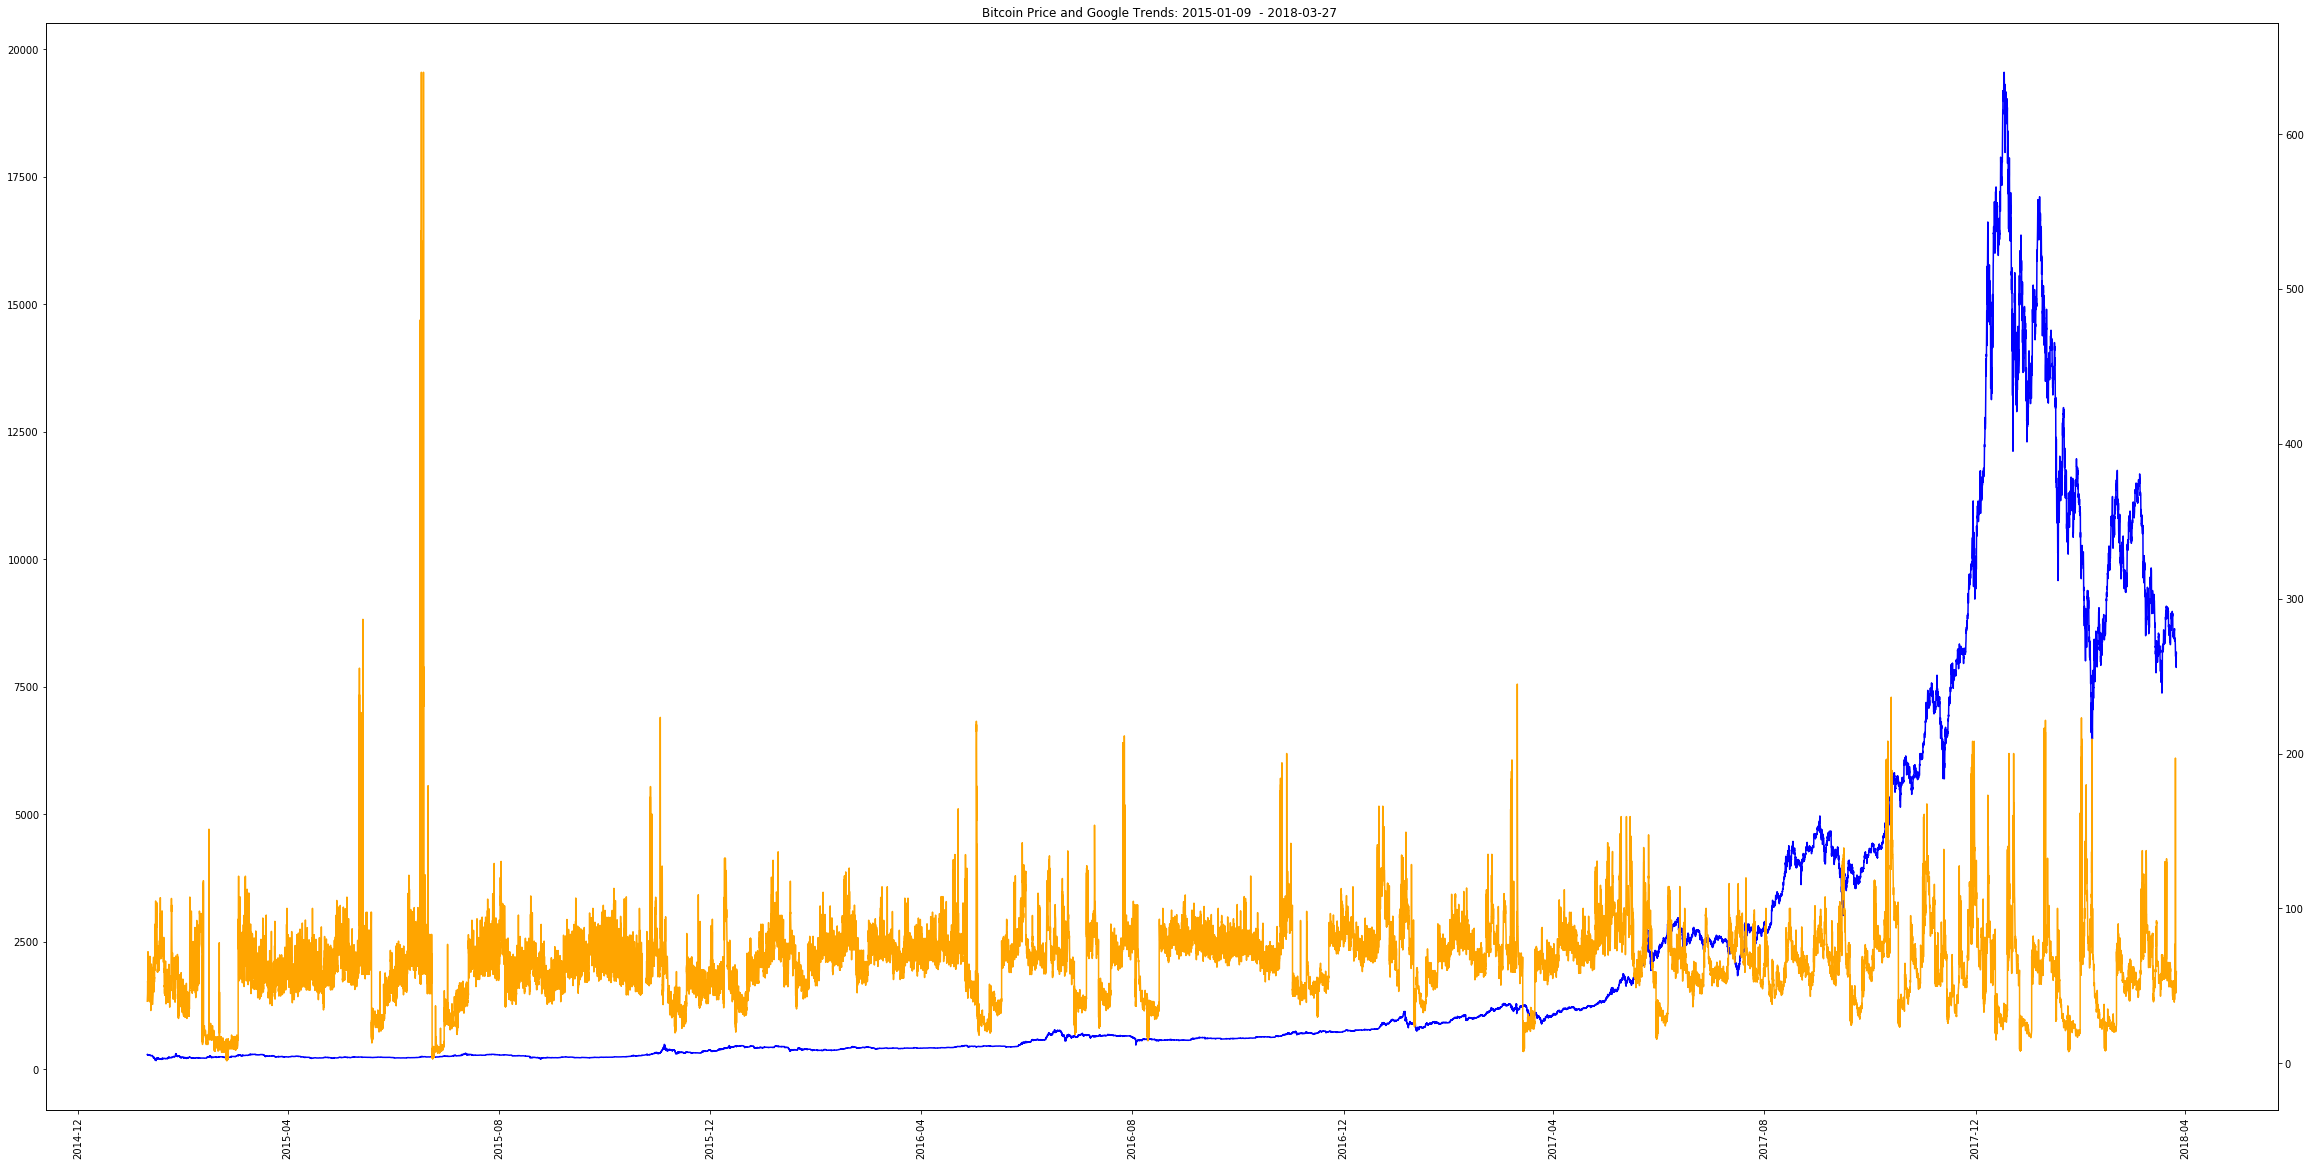

In [40]:
import matplotlib.pyplot as plt

#Graph overlap version - FIX NAMES BC SAME NAMES AS BELOW!
btc_and_trends_df_hourly_overlap = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_overlap_df, right_on="Timestamp")
display(btc_and_trends_df_hourly_overlap.head())

fig_bitcoin_overall, ax_bitcoin_overall = plt.subplots(figsize=(40,20)) 
ax_bitcoin_overall.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Close"], color='blue')
ax_bitcoin_overall_2 = ax_bitcoin_overall.twinx() 
ax_bitcoin_overall_2.plot(btc_and_trends_df_hourly_overlap["Date(UTC)"], btc_and_trends_df_hourly_overlap["Bitcoin (Adj.Overlap)"], color='orange' )
ax_bitcoin_overall.set_title('Bitcoin Price and Google Trends: ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly_overlap["Date(UTC)"].iloc[-1])[:-8] )
for tick in ax_bitcoin_overall.get_xticklabels():
    tick.set_rotation(90)
plt.show();



Timestamp    Open    High     Low   Close  Volume_(BTC)  \
0  1420840800  289.59  289.94  289.13  289.13     34.042422   
1  1420844400  293.61  293.61  292.15  292.15     36.628012   
2  1420848000  293.89  293.89  293.89  293.89      0.158015   
3  1420851600  289.20  289.20  289.10  289.10     30.985828   
4  1420855200  289.18  289.18  288.57  288.59      7.694195   

   Volume_(Currency)  Weighted_Price           Date(UTC)                date  \
0        9854.490388      289.476771 2015-01-09 22:00:00 2015-01-09 12:00:00   
1       10733.474257      293.040042 2015-01-09 23:00:00 2015-01-09 13:00:00   
2          46.439149      293.890000 2015-01-10 00:00:00 2015-01-09 14:00:00   
3        8960.344674      289.175573 2015-01-10 01:00:00 2015-01-09 15:00:00   
4        2224.105007      289.062740 2015-01-10 02:00:00 2015-01-09 16:00:00   

   Bitcoin  Ethereum  Bitstamp  Buy Bitcoin  Coinbase  isPartial  \
0       40         0         6            1         1      False   
1       41         0         6            1         1      False   
2       43         0         6            1         1      False   
3       43         0         6            1         1      False   
4       45         0         5            1         1      False   

             Date_UTC_trend  Bitcoin (Adj.)  
0 2015-01-09 17:00:00+00:00           100.0  
1 2015-01-09 18:00:00+00:00           102.5  
2 2015-01-09 19:00:00+00:00           107.5  
3 2015-01-09 20:00:00+00:00           107.5  
4 2015-01-09 21:00:00+00:00           112.5

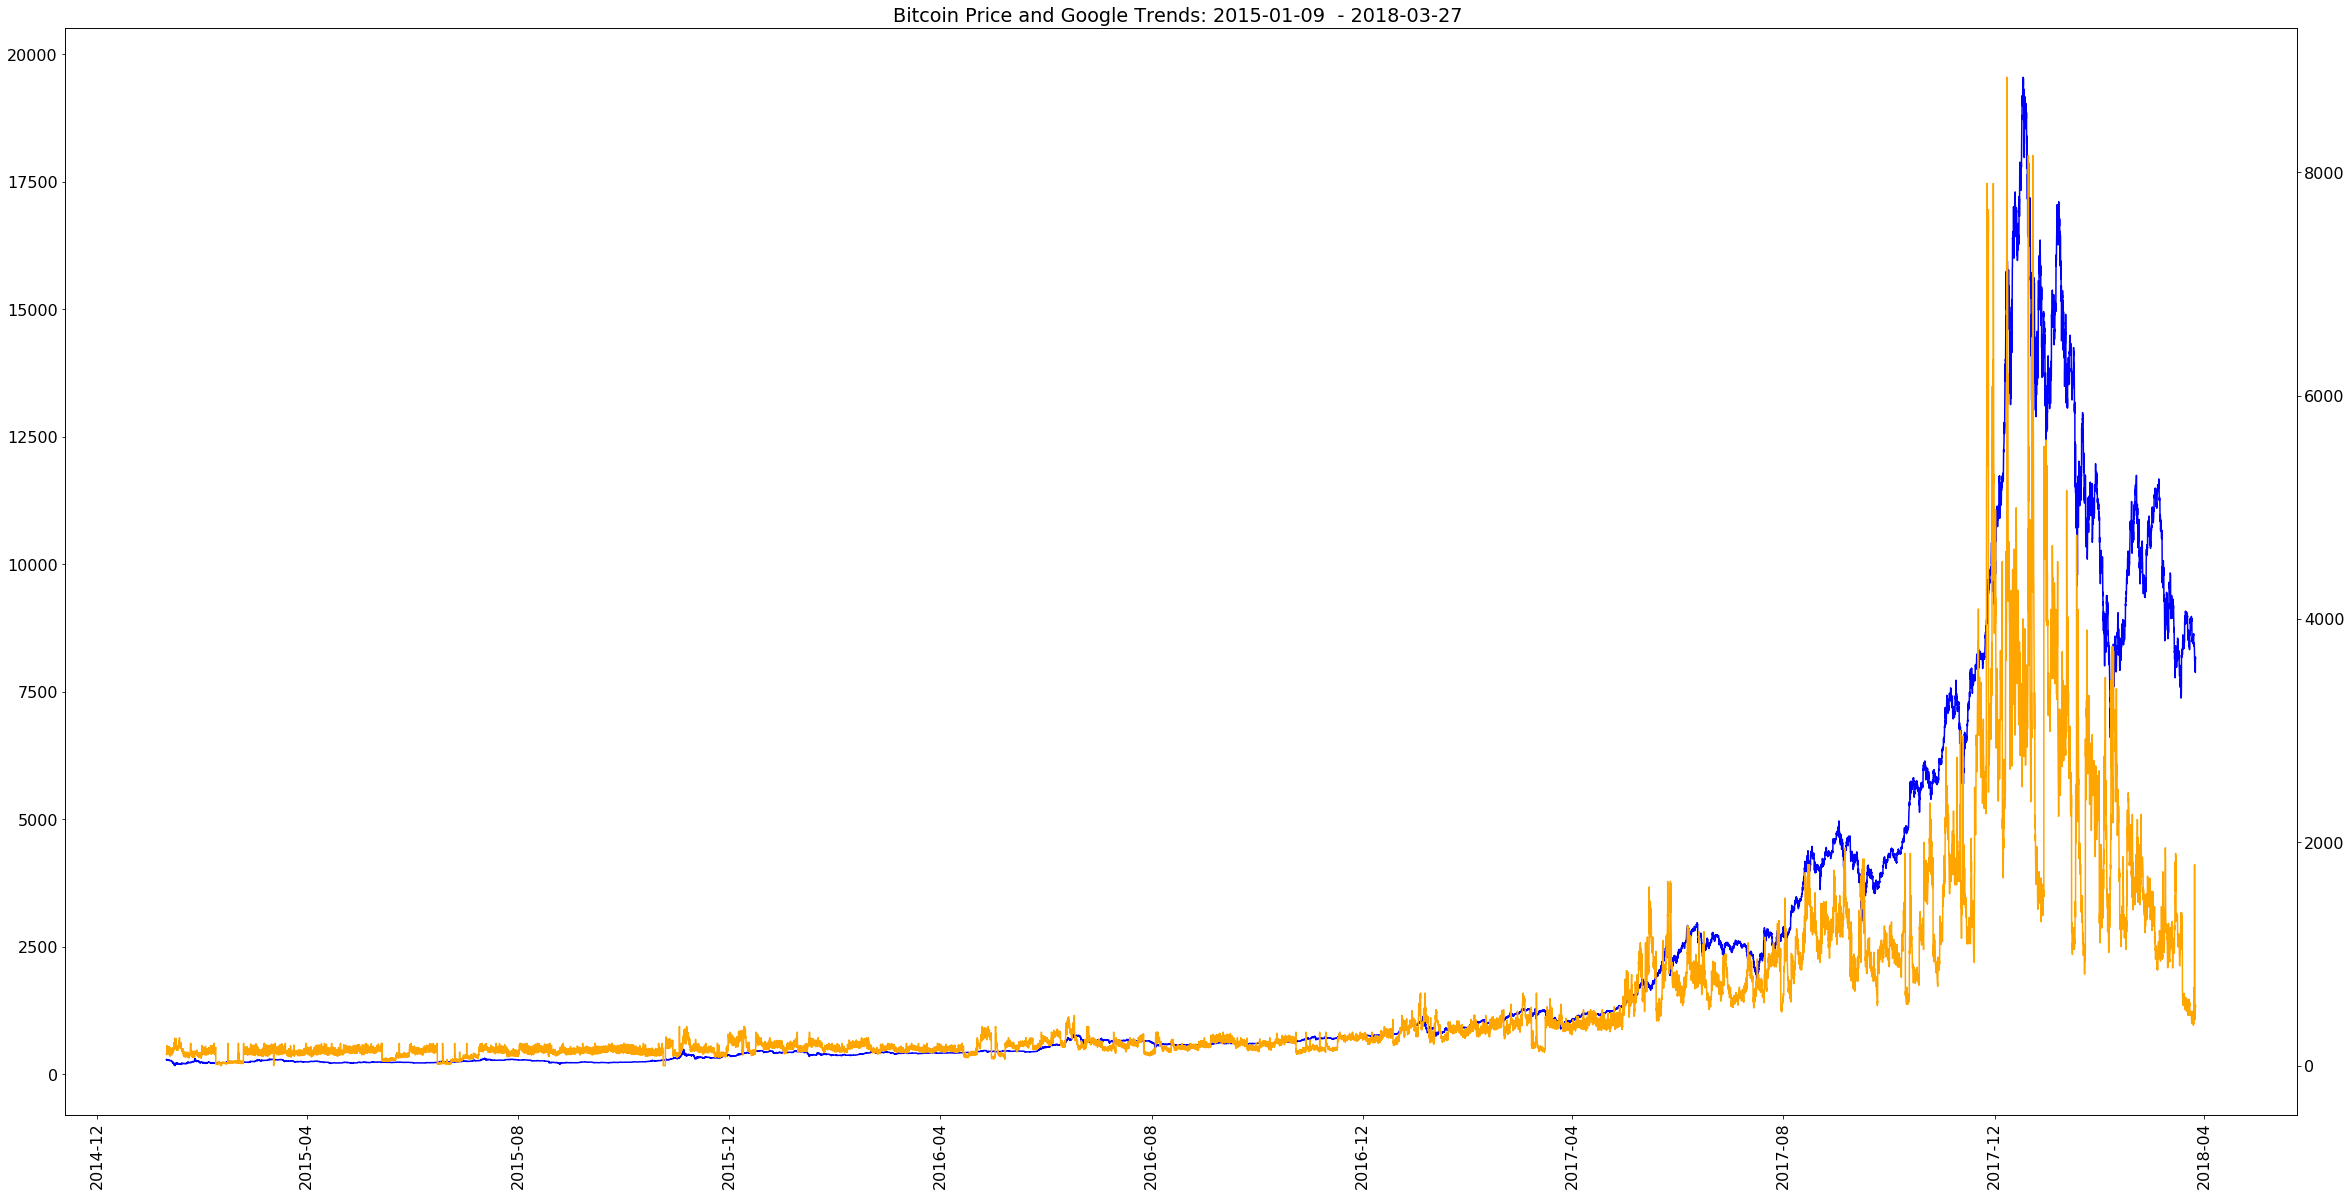

In [17]:
import matplotlib.pyplot as plt

# TODO: Investigate if this is merged correctly or not
btc_and_trends_df_hourly = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_df, right_on="Timestamp")
display(btc_and_trends_df_hourly.head())

fig_bitcoin_overall, ax_bitcoin_overall = plt.subplots(figsize=(40,20)) 
ax_bitcoin_overall.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Close"], color='blue')
ax_bitcoin_overall_2 = ax_bitcoin_overall.twinx() 
ax_bitcoin_overall_2.plot(btc_and_trends_df_hourly["Date(UTC)"], btc_and_trends_df_hourly["Bitcoin (Adj.)"], color='orange' )
ax_bitcoin_overall.set_title('Bitcoin Price and Google Trends: ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(btc_and_trends_df_hourly["Date(UTC)"].iloc[-1])[:-8] )
for tick in ax_bitcoin_overall.get_xticklabels():
    tick.set_rotation(90)
plt.show();


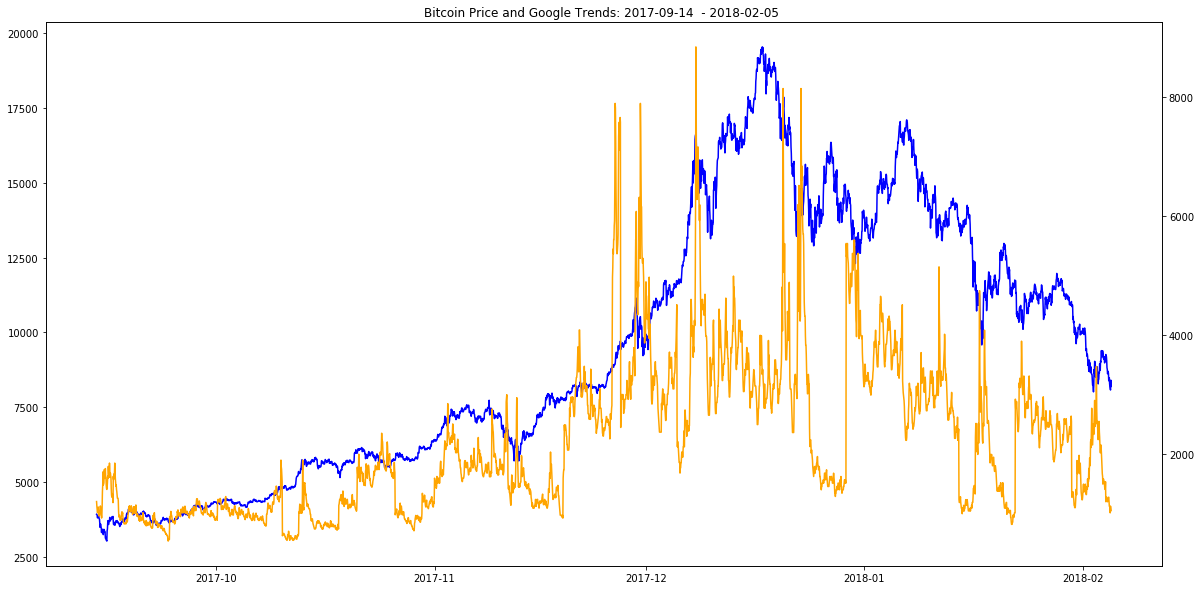

In [12]:
import matplotlib.pyplot as plt

# visualize Bitcoin's recent super spike starting Sep 2017 
sep_2017_to_feb_2018_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > 1505347200) & (btc_and_trends_df_hourly["Timestamp"] <=  1517788800) ]
#display(sep_2017_to_feb_2018_df)

fig_bitcoin_spike, ax_bitcoin_spike = plt.subplots(figsize=(20,10)) 
ax_bitcoin_spike.plot(sep_2017_to_feb_2018_df["Date(UTC)"], sep_2017_to_feb_2018_df["Close"], color='blue')
ax_bitcoin_spike_2 = ax_bitcoin_spike.twinx() 
ax_bitcoin_spike_2.plot(sep_2017_to_feb_2018_df["Date(UTC)"], sep_2017_to_feb_2018_df["Bitcoin (Adj.)"], color='orange' )
ax_bitcoin_spike.set_title('Bitcoin Price and Google Trends: ' + str(sep_2017_to_feb_2018_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(sep_2017_to_feb_2018_df["Date(UTC)"].iloc[-1])[:-8] )
for tick in ax_bitcoin_overall.get_xticklabels():
    tick.set_rotation(90)
plt.show();

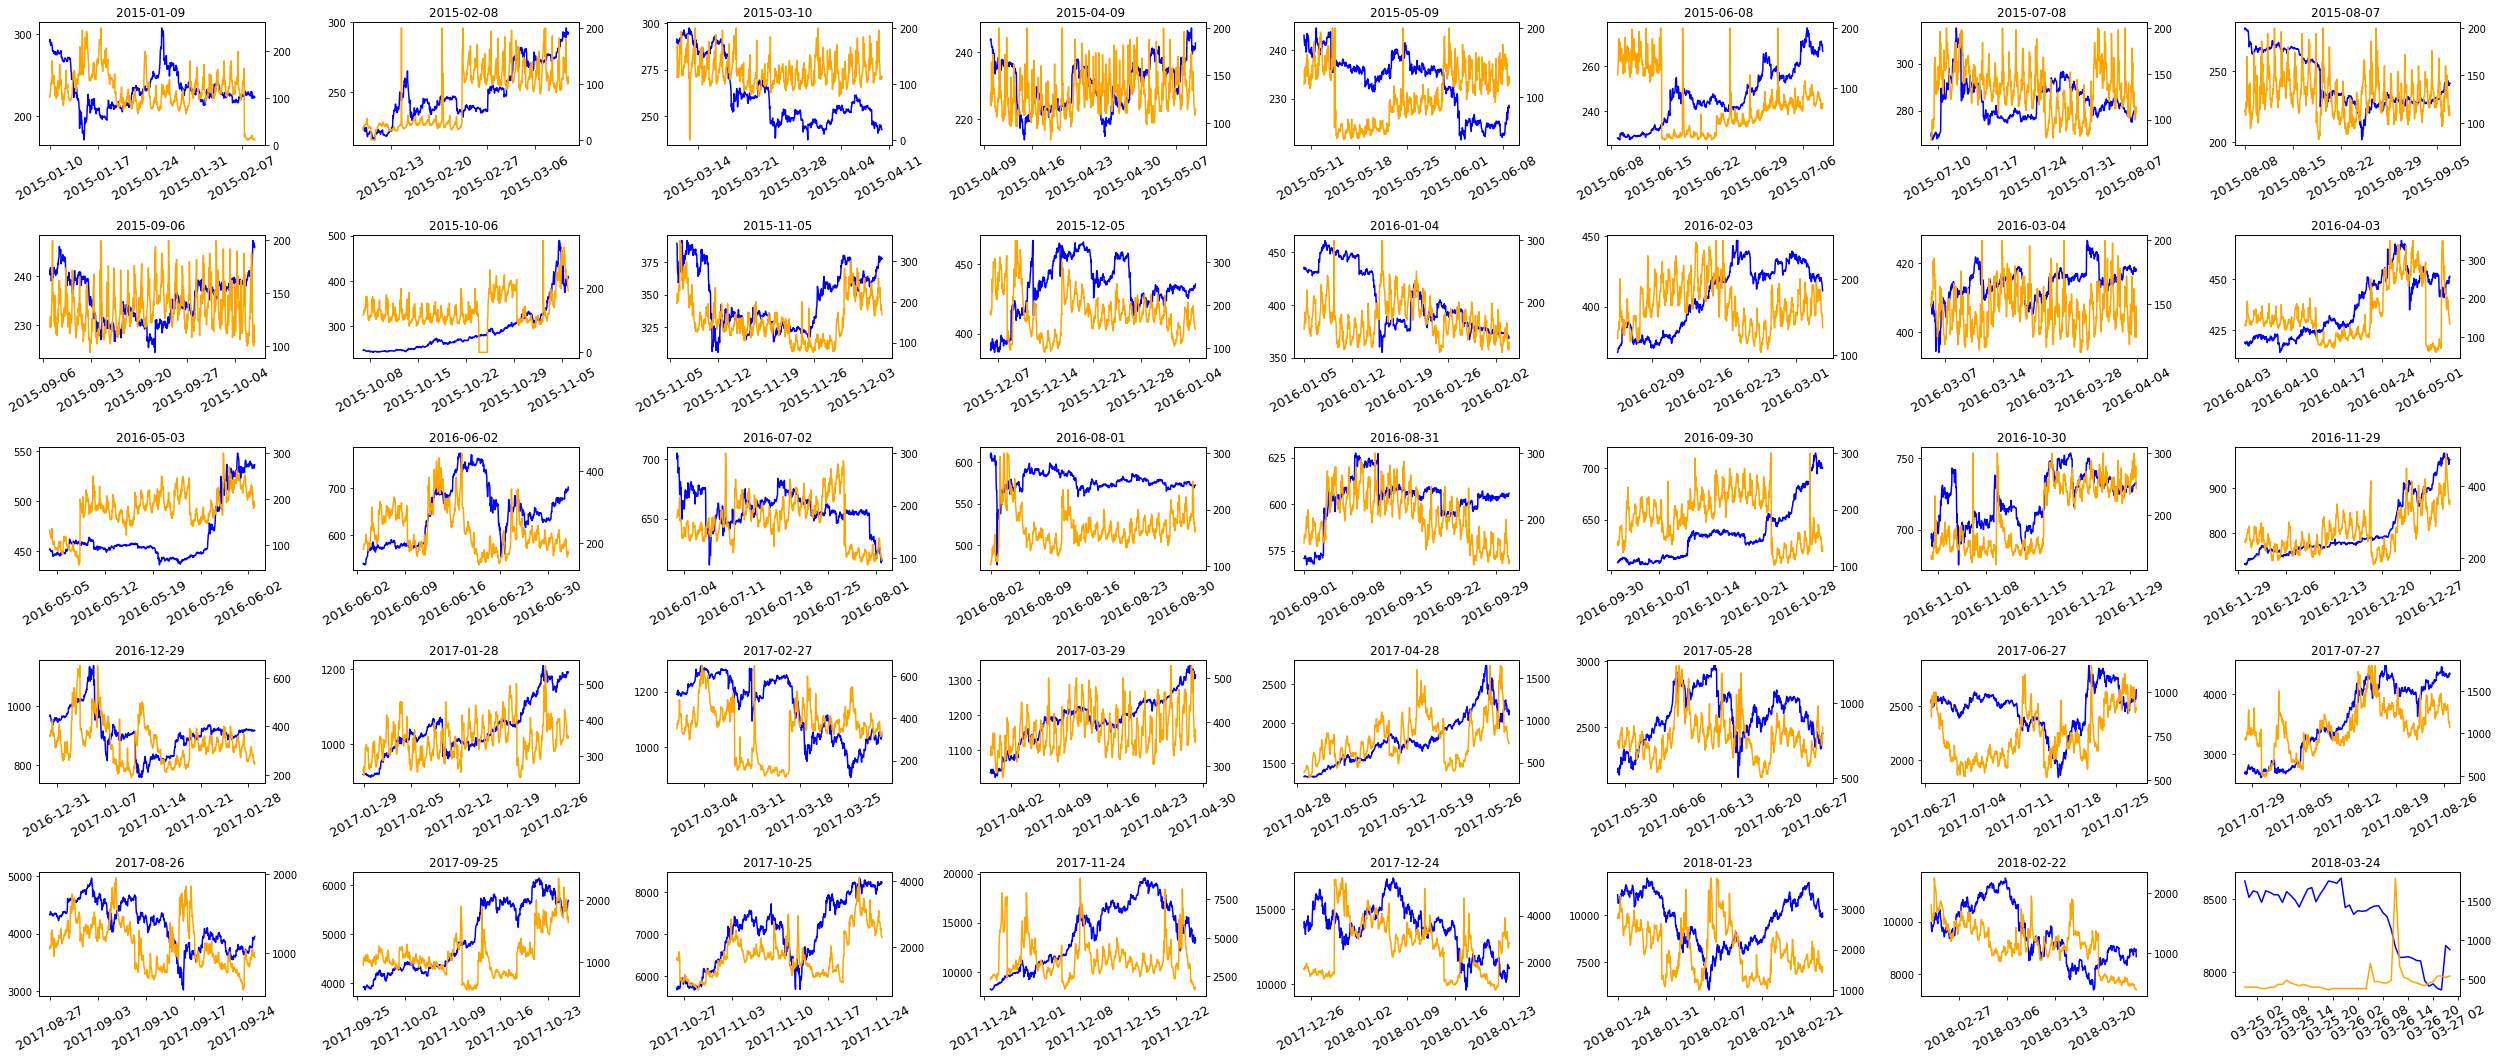

In [13]:
# from sklearn import preprocessing
# min_max_scaler=preprocessing.MinMaxScaler()

#change so that it just creates a new column

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = btc_and_trends_df_hourly[['Close','Bitcoin']]

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = min_max_scaler.fit_transform(btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']])
# btc_and_trends_df_hourly.head()

# fig, ax = plt.subplots()
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["close_normalized"])
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["bitcoin_normalized"])
# ax.set_title("Bitcoin Close Prices and Google Trends Normalized")
# ax.set(ylabel="price and trend, scaled to 0-1",xlabel="time")
# plt.show()

fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(35,15), sharex=False, sharey=False)

start_timestamp = btc_and_trends_df_hourly["Timestamp"][0] 
end_timestamp = btc_and_trends_df_hourly["Timestamp"].iloc[-1] 

for i, ax in enumerate(axes.flatten()):
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= start_timestamp+2592000) ]
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin (Adj.)"], color='orange' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8])
    start_timestamp += 2592000
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_fontsize(13)
        
#     labels = [item.get_text() for item in ax.get_xticklabels()]
#     labels_modified = [label[5:] for label in labels] 
#     ax.set_xticklabels(labels_modified)
        
#         tick_label = tick.get_text()
#         display(tick_label)
#         tick.set_text(tick_label[5:]) Doesnt work!
    
plt.rcParams.update({'font.size': 16})
fig.tight_layout()
plt.show();

# Orange is Google Trends Hourly Data for the keyword 'Bitcoin'
# Blue is Bitcoin Hourly Close Data 

In [14]:
from luminol.anomaly_detector import AnomalyDetector 
from luminol.correlator import Correlator

# Convert dataframe into dictionary to put into luminol
timestamp_close_df = btc_and_trends_df_hourly[['Timestamp', 'Close']]
timestamp_bitcoin_trend_df = btc_and_trends_df_hourly[['Timestamp', "Bitcoin (Adj.)"]]
display(timestamp_close_df.head())
display(timestamp_bitcoin_trend_df.head())

timestamp_close_dict = timestamp_close_df.set_index('Timestamp')['Close'].to_dict()
timestamp_bitcoin_trend_dict = timestamp_bitcoin_trend_df.set_index('Timestamp')["Bitcoin (Adj.)"].to_dict()

# anomaly detector 
anomaly_detector = AnomalyDetector(timestamp_close_dict)
score = anomaly_detector.get_all_scores()

for timestamp, value in score.iteritems():
    # print anomaly score if greater than 0 
    if (value > 0 ):
        readable_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H')
        print(readable_date,'->', value)
    
# correlate Close price and Google Trends
anomalies = anomaly_detector.get_anomalies()
for anomaly in anomalies:
    time_period = anomaly.get_time_window()
    
    # to do: tweek the parameters for correlator (like the shift allowed)
    correlator = Correlator(timestamp_close_dict, timestamp_bitcoin_trend_dict, time_period)
    if correlator.is_correlated(threshold=0.5):
        print("Trend data correlate with Price at time period (%d, %d)" % time_period)

print('There were '+ str(len(anomalies))+ ' anomalies')

Timestamp   Close
0  1420840800  289.13
1  1420844400  292.15
2  1420848000  293.89
3  1420851600  289.10
4  1420855200  288.59

Timestamp  Bitcoin (Adj.)
0  1420840800           100.0
1  1420844400           102.5
2  1420848000           107.5
3  1420851600           107.5
4  1420855200           112.5

2017-10-04 03 -> 86.0
2017-10-04 04 -> 114.0
2017-10-04 05 -> 146.0
2017-10-04 06 -> 182.0
2017-10-04 07 -> 222.0
2017-10-04 08 -> 266.0
2017-10-04 09 -> 314.0
2017-10-04 10 -> 366.0
2017-10-04 11 -> 422.0
2017-10-04 12 -> 482.0
2017-10-04 13 -> 546.0
2017-10-04 14 -> 614.0
2017-10-04 15 -> 686.0
2017-10-04 16 -> 762.0
2017-10-04 17 -> 842.0
2017-10-04 18 -> 926.0
2017-10-04 19 -> 1014.0
2017-10-04 20 -> 1106.0
2017-10-04 21 -> 1202.0
2017-10-04 22 -> 1302.0
2017-10-04 23 -> 1406.0
2017-10-05 00 -> 1514.0
2017-10-05 01 -> 1626.0
2017-10-05 02 -> 1742.0
2017-10-05 03 -> 1862.0
2017-10-05 04 -> 1986.0
2017-10-05 05 -> 2114.0
2017-10-05 06 -> 2246.0
2017-10-05 07 -> 2382.0
2017-10-05 08 -> 2522.0
2017-10-05 09 -> 2666.0
2017-10-05 10 -> 2814.0
2017-10-05 11 -> 2966.0
2017-10-05 12 -> 3122.0
2017-10-05 13 -> 3282.0
2017-10-05 14 -> 3446.0
2017-10-05 15 -> 3614.0
2017-10-05 16 -> 3786.0
2017-10-05 17 -> 3962.0
2017-10-05 18 -> 4142.0
2017-10-05 19 -> 4326.0
2017-10-05 20 -> 4514.0
2017-10-0

2017-10-19 02 -> 2246.0
2017-10-19 03 -> 2114.0
2017-10-19 04 -> 1986.0
2017-10-19 05 -> 1862.0
2017-10-19 06 -> 1742.0
2017-10-19 07 -> 1626.0
2017-10-19 08 -> 1514.0
2017-10-19 09 -> 1406.0
2017-10-19 10 -> 1302.0
2017-10-19 11 -> 1202.0
2017-10-19 12 -> 1106.0
2017-10-19 13 -> 1014.0
2017-10-19 14 -> 926.0
2017-10-19 15 -> 842.0
2017-10-19 16 -> 762.0
2017-10-19 17 -> 686.0
2017-10-19 18 -> 614.0
2017-10-19 19 -> 546.0
2017-10-19 20 -> 482.0
2017-10-19 21 -> 422.0
2017-10-19 22 -> 366.0
2017-10-19 23 -> 314.0
2017-10-20 00 -> 266.0
2017-10-20 01 -> 222.0
2017-10-20 02 -> 182.0
2017-10-20 03 -> 146.0
2017-10-20 04 -> 114.0
2017-10-20 05 -> 86.0
2017-11-20 06 -> 94.0
2017-11-20 07 -> 122.0
2017-11-20 08 -> 154.0
2017-11-20 09 -> 190.0
2017-11-20 10 -> 230.0
2017-11-20 11 -> 274.0
2017-11-20 12 -> 322.0
2017-11-20 13 -> 374.0
2017-11-20 14 -> 430.0
2017-11-20 15 -> 490.0
2017-11-20 16 -> 554.0
2017-11-20 17 -> 622.0
2017-11-20 18 -> 694.0
2017-11-20 19 -> 770.0
2017-11-20 20 -> 850.0
2

2017-12-11 15 -> 30674.0
2017-12-11 16 -> 30182.0
2017-12-11 17 -> 29694.0
2017-12-11 18 -> 29210.0
2017-12-11 19 -> 28730.0
2017-12-11 20 -> 28254.0
2017-12-11 21 -> 27782.0
2017-12-11 22 -> 27314.0
2017-12-11 23 -> 26850.0
2017-12-12 00 -> 26390.0
2017-12-12 01 -> 25934.0
2017-12-12 02 -> 25482.0
2017-12-12 03 -> 25034.0
2017-12-12 04 -> 24590.0
2017-12-12 05 -> 24150.0
2017-12-12 06 -> 23714.0
2017-12-12 07 -> 23282.0
2017-12-12 08 -> 22854.0
2017-12-12 09 -> 22430.0
2017-12-12 10 -> 22010.0
2017-12-12 11 -> 21594.0
2017-12-12 12 -> 21182.0
2017-12-12 13 -> 20774.0
2017-12-12 14 -> 20370.0
2017-12-12 15 -> 19970.0
2017-12-12 16 -> 19574.0
2017-12-12 17 -> 19182.0
2017-12-12 18 -> 18794.0
2017-12-12 19 -> 18410.0
2017-12-12 20 -> 18030.0
2017-12-12 21 -> 17654.0
2017-12-12 22 -> 17282.0
2017-12-12 23 -> 16914.0
2017-12-13 00 -> 16550.0
2017-12-13 01 -> 16190.0
2017-12-13 02 -> 15834.0
2017-12-13 03 -> 15482.0
2017-12-13 04 -> 15134.0
2017-12-13 05 -> 14790.0
2017-12-13 06 -> 14450.0


2018-01-09 03 -> 33546.0
2018-01-09 04 -> 34328.0
2018-01-09 05 -> 35120.0
2018-01-09 06 -> 35920.0
2018-01-09 07 -> 36200.0
2018-01-09 08 -> 36750.0
2018-01-09 09 -> 37574.0
2018-01-09 10 -> 38146.0
2018-01-09 11 -> 38730.0
2018-01-09 12 -> 39326.0
2018-01-09 13 -> 40194.0
2018-01-09 14 -> 41334.0
2018-01-09 15 -> 42490.0
2018-01-09 16 -> 43662.0
2018-01-09 17 -> 44574.0
2018-01-09 18 -> 44898.0
2018-01-09 19 -> 44898.0
2018-01-09 20 -> 44898.0
2018-01-09 21 -> 44898.0
2018-01-09 22 -> 44898.0
2018-01-09 23 -> 44898.0
2018-01-10 00 -> 44898.0
2018-01-10 01 -> 44898.0
2018-01-10 02 -> 44898.0
2018-01-10 03 -> 44898.0
2018-01-10 04 -> 44898.0
2018-01-10 05 -> 44898.0
2018-01-10 06 -> 44898.0
2018-01-10 07 -> 44898.0
2018-01-10 08 -> 44898.0
2018-01-10 09 -> 44898.0
2018-01-10 10 -> 44898.0
2018-01-10 11 -> 44898.0
2018-01-10 12 -> 44898.0
2018-01-10 13 -> 44898.0
2018-01-10 14 -> 44898.0
2018-01-10 15 -> 44898.0
2018-01-10 16 -> 44898.0
2018-01-10 17 -> 44898.0
2018-01-10 18 -> 44898.0


2018-02-10 17 -> 13662.0
2018-02-10 18 -> 13994.0
2018-02-10 19 -> 14330.0
2018-02-10 20 -> 14670.0
2018-02-10 21 -> 15014.0
2018-02-10 22 -> 15362.0
2018-02-10 23 -> 15714.0
2018-02-11 00 -> 16070.0
2018-02-11 01 -> 16430.0
2018-02-11 02 -> 16794.0
2018-02-11 03 -> 17162.0
2018-02-11 04 -> 17534.0
2018-02-11 05 -> 17910.0
2018-02-11 06 -> 18290.0
2018-02-11 07 -> 18674.0
2018-02-11 08 -> 19062.0
2018-02-11 09 -> 19454.0
2018-02-11 10 -> 19850.0
2018-02-11 11 -> 20250.0
2018-02-11 12 -> 20654.0
2018-02-11 13 -> 21062.0
2018-02-11 14 -> 21474.0
2018-02-11 15 -> 21890.0
2018-02-11 16 -> 22310.0
2018-02-11 17 -> 22734.0
2018-02-11 18 -> 23162.0
2018-02-11 19 -> 23594.0
2018-02-11 20 -> 24030.0
2018-02-11 21 -> 24470.0
2018-02-11 22 -> 24914.0
2018-02-11 23 -> 25362.0
2018-02-12 00 -> 25814.0
2018-02-12 01 -> 26270.0
2018-02-12 02 -> 26730.0
2018-02-12 03 -> 27194.0
2018-02-12 04 -> 27662.0
2018-02-12 05 -> 28134.0
2018-02-12 06 -> 28610.0
2018-02-12 07 -> 29090.0
2018-02-12 08 -> 29574.0


2018-03-04 18 -> 11618.0
2018-03-04 19 -> 12234.0
2018-03-04 20 -> 12866.0
2018-03-04 21 -> 13514.0
2018-03-04 22 -> 14178.0
2018-03-04 23 -> 14858.0
2018-03-05 00 -> 15554.0
2018-03-05 01 -> 16266.0
2018-03-05 02 -> 16994.0
2018-03-05 03 -> 17738.0
2018-03-05 04 -> 18498.0
2018-03-05 05 -> 19274.0
2018-03-05 06 -> 20066.0
2018-03-05 07 -> 20874.0
2018-03-05 08 -> 21698.0
2018-03-05 09 -> 22538.0
2018-03-05 10 -> 23394.0
2018-03-05 11 -> 24266.0
2018-03-05 12 -> 25154.0
2018-03-05 13 -> 26058.0
2018-03-05 14 -> 26978.0
2018-03-05 15 -> 27914.0
2018-03-05 16 -> 28866.0
2018-03-05 17 -> 29834.0
2018-03-05 18 -> 30818.0
2018-03-05 19 -> 31818.0
2018-03-05 20 -> 32834.0
2018-03-05 21 -> 33866.0
2018-03-05 22 -> 34914.0
2018-03-05 23 -> 35978.0
2018-03-06 00 -> 37058.0
2018-03-06 01 -> 38154.0
2018-03-06 02 -> 39266.0
2018-03-06 03 -> 40394.0
2018-03-06 04 -> 41538.0
2018-03-06 05 -> 42698.0
2018-03-06 06 -> 43874.0
2018-03-06 07 -> 45066.0
2018-03-06 08 -> 46274.0
2018-03-06 09 -> 47498.0


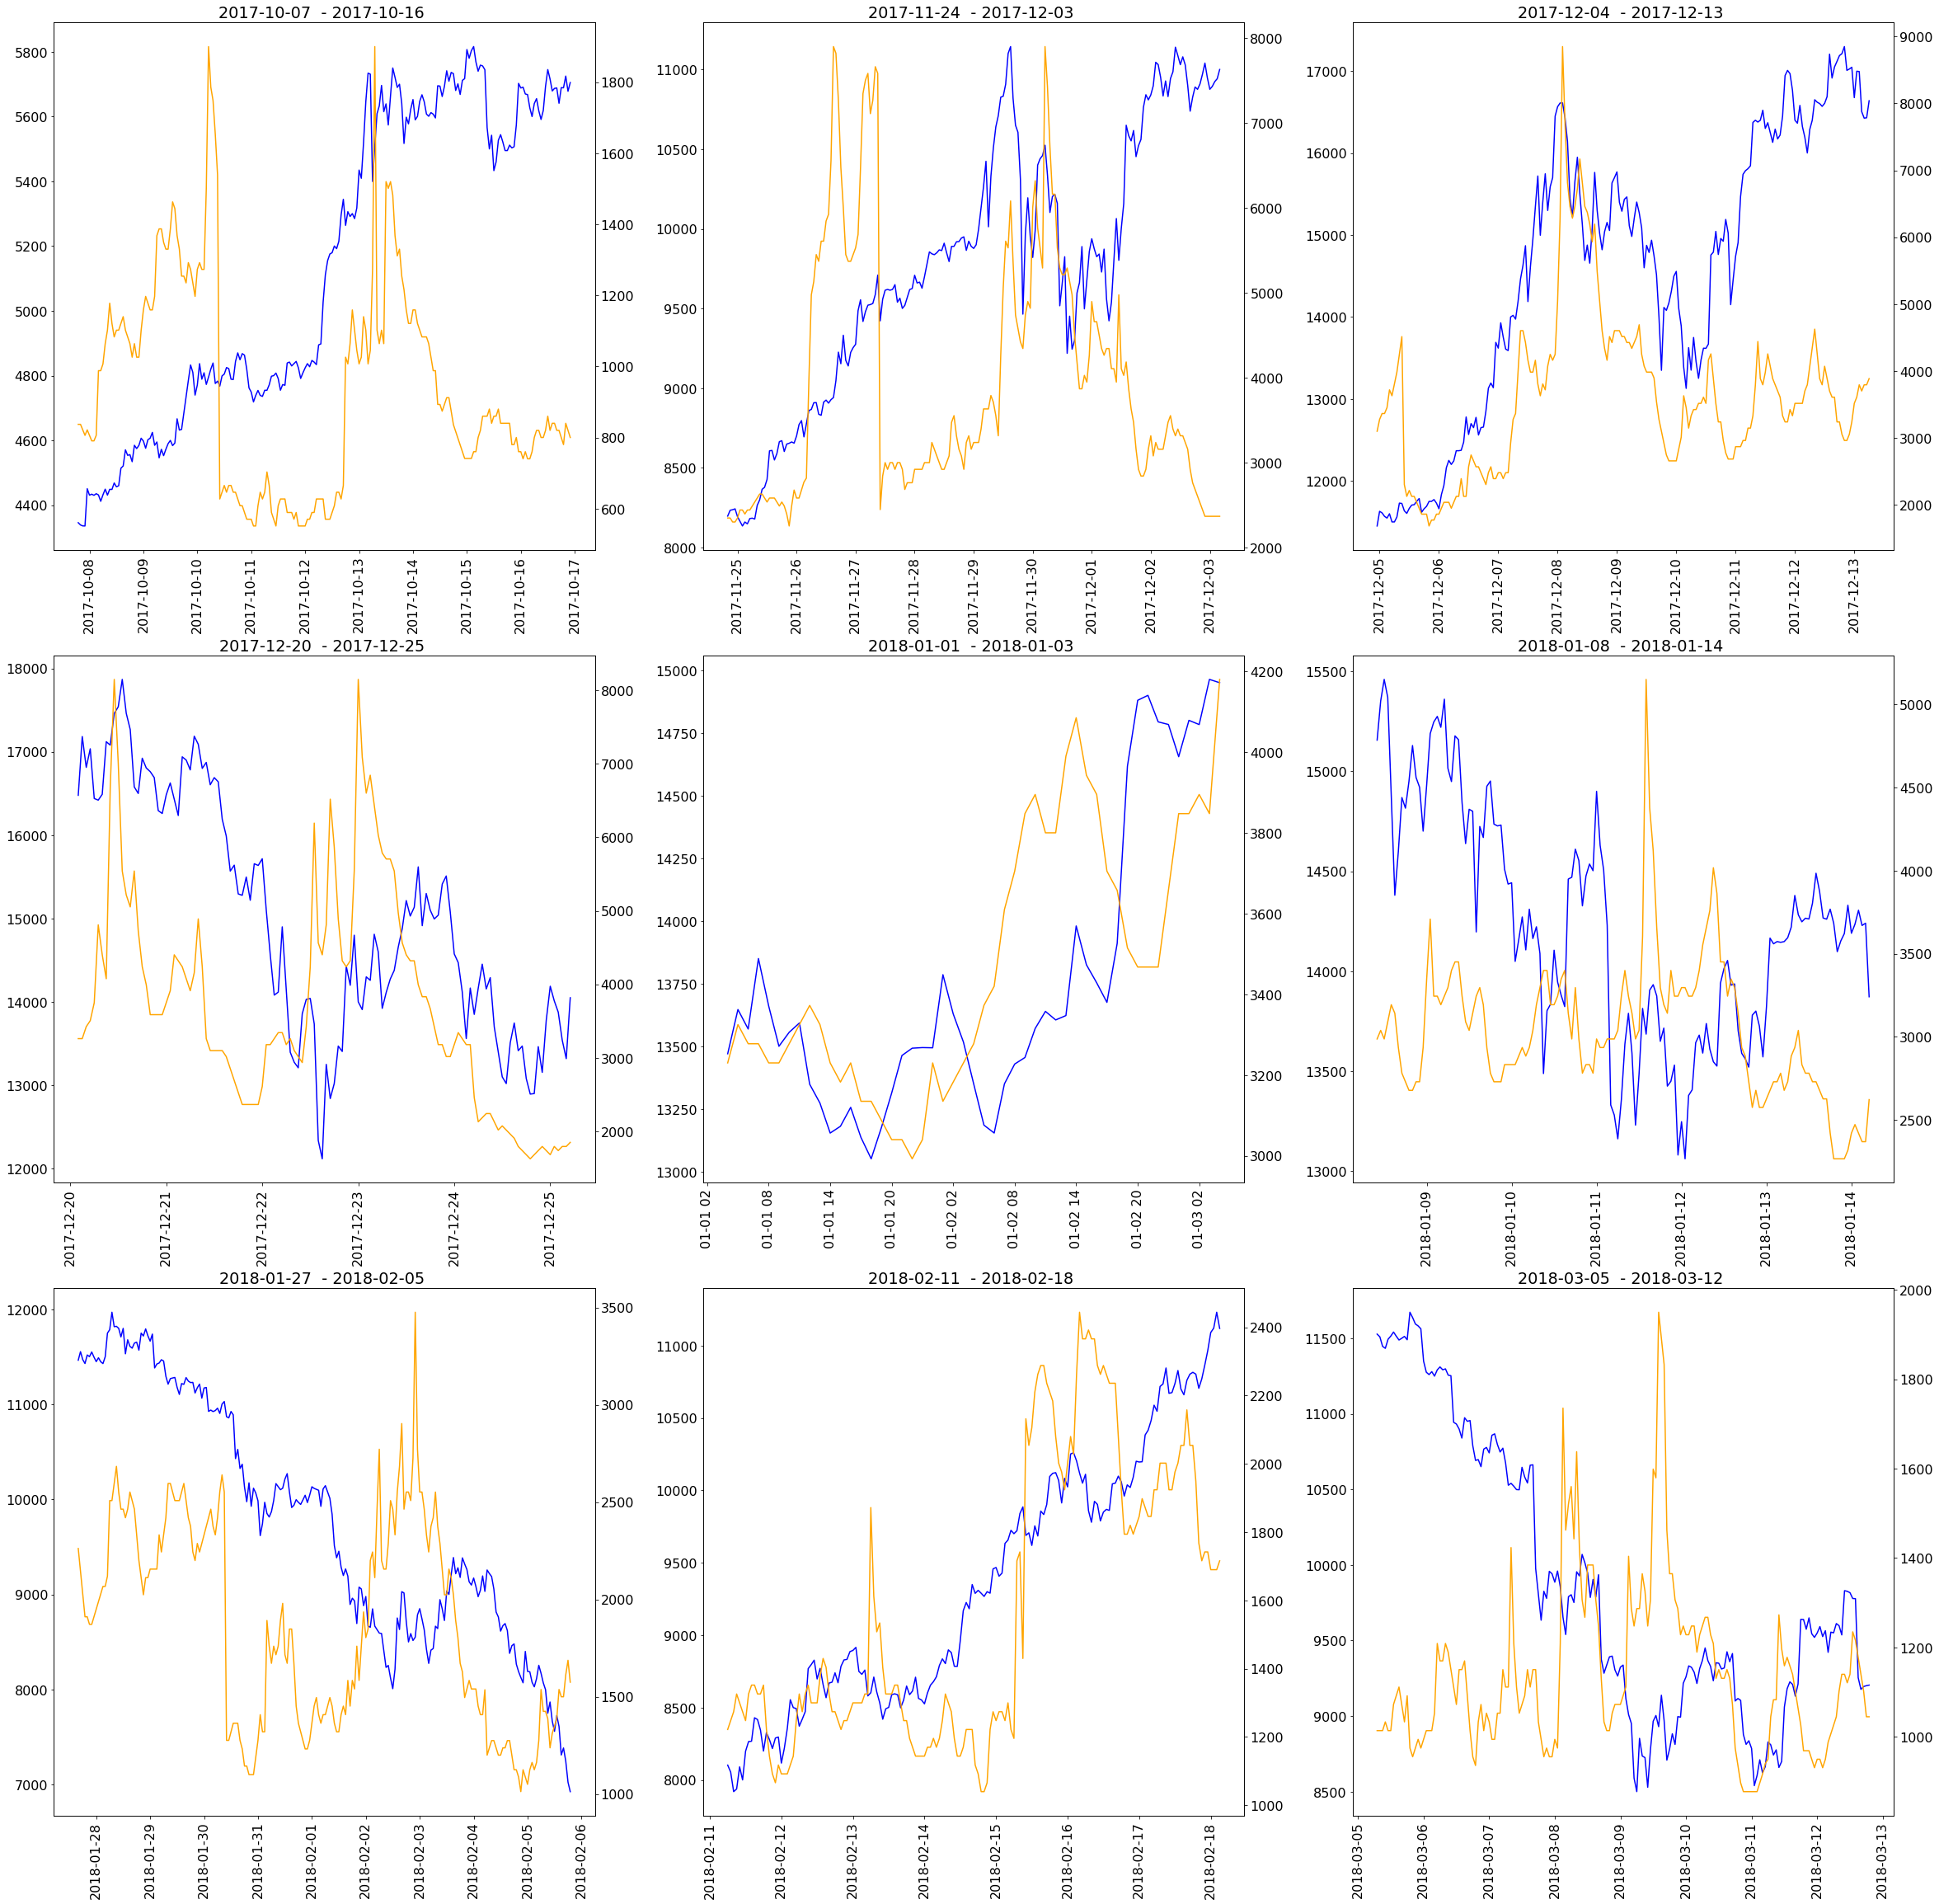

In [15]:
# plots all the anomalies

fig2, axes2 = plt.subplots(nrows=3, ncols=3, figsize=(40,40), sharex=False, sharey=False)

#for i, anomaly in enumerate(anomalies):
for i, ax in enumerate(axes2.flatten()):    
    time_period = anomalies[i].get_time_window()
    start_timestamp = time_period[0]
    end_timestamp = time_period[1] 
        
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= end_timestamp) ]
    #display(in_range_df)
    ax.plot(in_range_df["Date(UTC)"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date(UTC)"], in_range_df["Bitcoin (Adj.)"], color='orange' )
    ax.set_title(str(in_range_df["Date(UTC)"].iloc[0])[:-8] + ' - ' + str(in_range_df["Date(UTC)"].iloc[-1])[:-8] )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
fig.tight_layout()
fig.subplots_adjust(hspace=2)
plt.show();

# Blue is Price, Orange is Trend. 

In [ ]:
# to do: find out when google trend data had anomalies 